In [1]:
##################### Python 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
import numpy as np
import os
import datetime
import dcor
import math
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
import warnings
from scipy import stats
from PIL import Image
warnings.filterwarnings('ignore')
from scipy.stats import chi2
import os
os.chdir('/Users/sss/Desktop/Data')
os.getcwd()
from IPython.core.display import display, HTML
#display(HTML("<style>.container { width: 60% !important; }</style>"))
plt.rcParams['font.family'] = 'AppleGothic'
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import pickle


## Data loading

In [25]:
df = pd.read_csv("garments_worker_productivity.csv")

In [26]:
df

date   quarter  department        day  team  targeted_productivity  \
0      1/1/2015  Quarter1      sweing   Thursday     8                   0.80   
1      1/1/2015  Quarter1  finishing    Thursday     1                   0.75   
2      1/1/2015  Quarter1      sweing   Thursday    11                   0.80   
3      1/1/2015  Quarter1      sweing   Thursday    12                   0.80   
4      1/1/2015  Quarter1      sweing   Thursday     6                   0.80   
...         ...       ...         ...        ...   ...                    ...   
1192  3/11/2015  Quarter2   finishing  Wednesday    10                   0.75   
1193  3/11/2015  Quarter2   finishing  Wednesday     8                   0.70   
1194  3/11/2015  Quarter2   finishing  Wednesday     7                   0.65   
1195  3/11/2015  Quarter2   finishing  Wednesday     9                   0.75   
1196  3/11/2015  Quarter2   finishing  Wednesday     6                   0.70   

        smv     wip  over_time  incentive  idle_time  idle_men  \
0     26.16  1108.0       7080         98        0.0         0   
1      3.94     NaN        960          0        0.0         0   
2     11.41   968.0       3660         50        0.0         0   
3     11.41   968.0       3660         50        0.0         0   
4     25.90  1170.0       1920         50        0.0         0   
...     ...     ...        ...        ...        ...       ...   
1192   2.90     NaN        960          0        0.0         0   
1193   3.90     NaN        960          0        0.0         0   
1194   3.90     NaN        960          0        0.0         0   
1195   2.90     NaN       1800          0        0.0         0   
1196   2.90     NaN        720          0        0.0         0   

      no_of_style_change  no_of_workers  actual_productivity  
0                      0           59.0             0.940725  
1                      0            8.0             0.886500  
2                      0           30.5             0.800570  
3                      0           30.5             0.800570  
4                      0           56.0             0.800382  
...                  ...            ...                  ...  
1192                   0            8.0             0.628333  
1193                   0            8.0             0.625625  
1194                   0            8.0             0.625625  
1195                   0           15.0             0.505889  
1196                   0            6.0             0.394722  

[1197 rows x 15 columns]

In [27]:
df.duplicated().sum()

0

In [28]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

<Axes: >

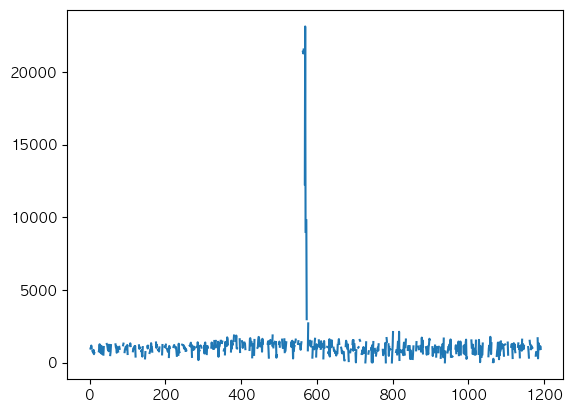

In [29]:
df['wip'].plot()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [31]:
df.describe()

team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.000000     0.000000   
50%     3960.000000     0.000000     0.000000     0.000000   
75%     6960.000000    50.000000     0.000000     0.000000   
max    25920.000000  3600.000000   300.000000    45.000000   

       no_of_style_change  no_of_workers  actual_productivity  
count         1197.000000    1197.000000          1197.000000  
mean             0.150376      34.609858             0.735091  
std              0.427848      22.197687             0.174488  
min              0.000000       2.000000             0.233705  
25%              0.000000       9.000000             0.650307  
50%              0.000000      34.000000             0.773333  
75%              0.000000      57.000000             0.850253  
max              2.000000      89.000000             1.120437

<Axes: >

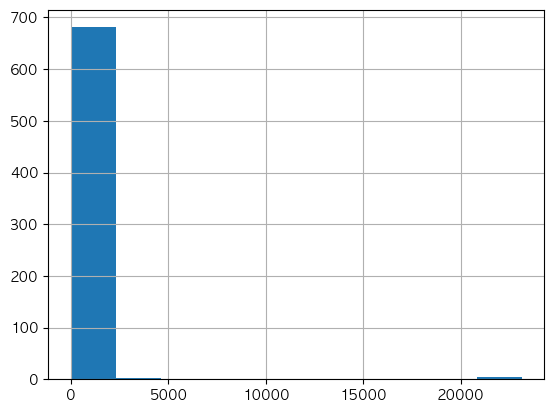

In [32]:
df['wip'].hist()

<Axes: xlabel='None', ylabel='wip'>

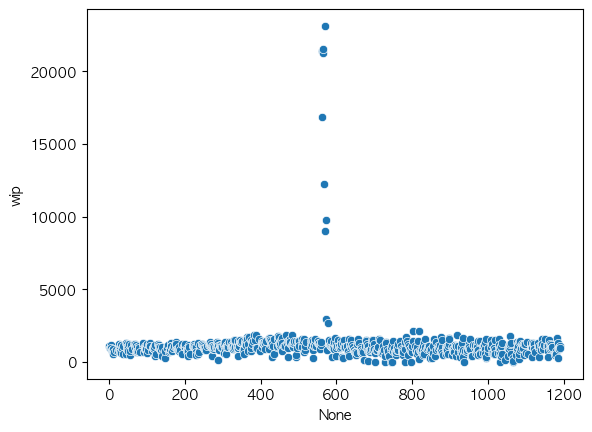

In [33]:
sns.scatterplot(data=df, x=df.index, y='wip')

In [34]:
df

date   quarter  department        day  team  targeted_productivity  \
0      1/1/2015  Quarter1      sweing   Thursday     8                   0.80   
1      1/1/2015  Quarter1  finishing    Thursday     1                   0.75   
2      1/1/2015  Quarter1      sweing   Thursday    11                   0.80   
3      1/1/2015  Quarter1      sweing   Thursday    12                   0.80   
4      1/1/2015  Quarter1      sweing   Thursday     6                   0.80   
...         ...       ...         ...        ...   ...                    ...   
1192  3/11/2015  Quarter2   finishing  Wednesday    10                   0.75   
1193  3/11/2015  Quarter2   finishing  Wednesday     8                   0.70   
1194  3/11/2015  Quarter2   finishing  Wednesday     7                   0.65   
1195  3/11/2015  Quarter2   finishing  Wednesday     9                   0.75   
1196  3/11/2015  Quarter2   finishing  Wednesday     6                   0.70   

        smv     wip  over_time  incentive  idle_time  idle_men  \
0     26.16  1108.0       7080         98        0.0         0   
1      3.94     NaN        960          0        0.0         0   
2     11.41   968.0       3660         50        0.0         0   
3     11.41   968.0       3660         50        0.0         0   
4     25.90  1170.0       1920         50        0.0         0   
...     ...     ...        ...        ...        ...       ...   
1192   2.90     NaN        960          0        0.0         0   
1193   3.90     NaN        960          0        0.0         0   
1194   3.90     NaN        960          0        0.0         0   
1195   2.90     NaN       1800          0        0.0         0   
1196   2.90     NaN        720          0        0.0         0   

      no_of_style_change  no_of_workers  actual_productivity  
0                      0           59.0             0.940725  
1                      0            8.0             0.886500  
2                      0           30.5             0.800570  
3                      0           30.5             0.800570  
4                      0           56.0             0.800382  
...                  ...            ...                  ...  
1192                   0            8.0             0.628333  
1193                   0            8.0             0.625625  
1194                   0            8.0             0.625625  
1195                   0           15.0             0.505889  
1196                   0            6.0             0.394722  

[1197 rows x 15 columns]

In [35]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [36]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek

In [37]:
df

date   quarter  department  day  team  targeted_productivity  \
0    2015-01-01  Quarter1      sweing    1     8                   0.80   
1    2015-01-01  Quarter1  finishing     1     1                   0.75   
2    2015-01-01  Quarter1      sweing    1    11                   0.80   
3    2015-01-01  Quarter1      sweing    1    12                   0.80   
4    2015-01-01  Quarter1      sweing    1     6                   0.80   
...         ...       ...         ...  ...   ...                    ...   
1192 2015-03-11  Quarter2   finishing   11    10                   0.75   
1193 2015-03-11  Quarter2   finishing   11     8                   0.70   
1194 2015-03-11  Quarter2   finishing   11     7                   0.65   
1195 2015-03-11  Quarter2   finishing   11     9                   0.75   
1196 2015-03-11  Quarter2   finishing   11     6                   0.70   

        smv     wip  over_time  incentive  idle_time  idle_men  \
0     26.16  1108.0       7080         98        0.0         0   
1      3.94     NaN        960          0        0.0         0   
2     11.41   968.0       3660         50        0.0         0   
3     11.41   968.0       3660         50        0.0         0   
4     25.90  1170.0       1920         50        0.0         0   
...     ...     ...        ...        ...        ...       ...   
1192   2.90     NaN        960          0        0.0         0   
1193   3.90     NaN        960          0        0.0         0   
1194   3.90     NaN        960          0        0.0         0   
1195   2.90     NaN       1800          0        0.0         0   
1196   2.90     NaN        720          0        0.0         0   

      no_of_style_change  no_of_workers  actual_productivity  month  year  \
0                      0           59.0             0.940725      1  2015   
1                      0            8.0             0.886500      1  2015   
2                      0           30.5             0.800570      1  2015   
3                      0           30.5             0.800570      1  2015   
4                      0           56.0             0.800382      1  2015   
...                  ...            ...                  ...    ...   ...   
1192                   0            8.0             0.628333      3  2015   
1193                   0            8.0             0.625625      3  2015   
1194                   0            8.0             0.625625      3  2015   
1195                   0           15.0             0.505889      3  2015   
1196                   0            6.0             0.394722      3  2015   

      dayofweek  
0             3  
1             3  
2             3  
3             3  
4             3  
...         ...  
1192          2  
1193          2  
1194          2  
1195          2  
1196          2  

[1197 rows x 18 columns]

In [38]:
df['yearmonth'] = df['year'].astype(str) + '-' + df['month'].astype(str)

In [39]:
df

date   quarter  department  day  team  targeted_productivity  \
0    2015-01-01  Quarter1      sweing    1     8                   0.80   
1    2015-01-01  Quarter1  finishing     1     1                   0.75   
2    2015-01-01  Quarter1      sweing    1    11                   0.80   
3    2015-01-01  Quarter1      sweing    1    12                   0.80   
4    2015-01-01  Quarter1      sweing    1     6                   0.80   
...         ...       ...         ...  ...   ...                    ...   
1192 2015-03-11  Quarter2   finishing   11    10                   0.75   
1193 2015-03-11  Quarter2   finishing   11     8                   0.70   
1194 2015-03-11  Quarter2   finishing   11     7                   0.65   
1195 2015-03-11  Quarter2   finishing   11     9                   0.75   
1196 2015-03-11  Quarter2   finishing   11     6                   0.70   

        smv     wip  over_time  incentive  idle_time  idle_men  \
0     26.16  1108.0       7080         98        0.0         0   
1      3.94     NaN        960          0        0.0         0   
2     11.41   968.0       3660         50        0.0         0   
3     11.41   968.0       3660         50        0.0         0   
4     25.90  1170.0       1920         50        0.0         0   
...     ...     ...        ...        ...        ...       ...   
1192   2.90     NaN        960          0        0.0         0   
1193   3.90     NaN        960          0        0.0         0   
1194   3.90     NaN        960          0        0.0         0   
1195   2.90     NaN       1800          0        0.0         0   
1196   2.90     NaN        720          0        0.0         0   

      no_of_style_change  no_of_workers  actual_productivity  month  year  \
0                      0           59.0             0.940725      1  2015   
1                      0            8.0             0.886500      1  2015   
2                      0           30.5             0.800570      1  2015   
3                      0           30.5             0.800570      1  2015   
4                      0           56.0             0.800382      1  2015   
...                  ...            ...                  ...    ...   ...   
1192                   0            8.0             0.628333      3  2015   
1193                   0            8.0             0.625625      3  2015   
1194                   0            8.0             0.625625      3  2015   
1195                   0           15.0             0.505889      3  2015   
1196                   0            6.0             0.394722      3  2015   

      dayofweek yearmonth  
0             3    2015-1  
1             3    2015-1  
2             3    2015-1  
3             3    2015-1  
4             3    2015-1  
...         ...       ...  
1192          2    2015-3  
1193          2    2015-3  
1194          2    2015-3  
1195          2    2015-3  
1196          2    2015-3  

[1197 rows x 19 columns]

In [40]:
df_original  = df.copy()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   int32         
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

In [42]:
df['date'].min(), df['date'].max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2015-03-11 00:00:00'))

In [43]:
df['date'].value_counts()

date
2015-03-11    24
2015-01-31    24
2015-01-11    23
2015-03-10    23
2015-01-12    23
              ..
2015-02-05    18
2015-02-09    18
2015-02-16    18
2015-02-14    17
2015-01-20    15
Name: count, Length: 59, dtype: int64

In [44]:
categorical_list = []
numerical_list = []


for i in df.columns:
    if df[i].dtypes == 'O':
        categorical_list.append(i)
    else:
        numerical_list.append(i)


In [45]:
categorical_list

['quarter', 'department', 'yearmonth']

In [46]:
numerical_list

['date',
 'day',
 'team',
 'targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'actual_productivity',
 'month',
 'year',
 'dayofweek']

## Data Cleaning


In [98]:
df_categorical = df[categorical_list]
df_numerical  =  df[numerical_list]

In [99]:
df_categorical['date'] = df['date']

In [100]:
df_categorical['actual_productivity'] = df['actual_productivity']

In [101]:
df_categorical

quarter  department yearmonth       date  actual_productivity
0     Quarter1      sweing    2015-1 2015-01-01             0.940725
1     Quarter1  finishing     2015-1 2015-01-01             0.886500
2     Quarter1      sweing    2015-1 2015-01-01             0.800570
3     Quarter1      sweing    2015-1 2015-01-01             0.800570
4     Quarter1      sweing    2015-1 2015-01-01             0.800382
...        ...         ...       ...        ...                  ...
1192  Quarter2   finishing    2015-3 2015-03-11             0.628333
1193  Quarter2   finishing    2015-3 2015-03-11             0.625625
1194  Quarter2   finishing    2015-3 2015-03-11             0.625625
1195  Quarter2   finishing    2015-3 2015-03-11             0.505889
1196  Quarter2   finishing    2015-3 2015-03-11             0.394722

[1197 rows x 5 columns]

In [102]:
df_numerical

date  day  team  targeted_productivity    smv     wip  over_time  \
0    2015-01-01    1     8                   0.80  26.16  1108.0       7080   
1    2015-01-01    1     1                   0.75   3.94     NaN        960   
2    2015-01-01    1    11                   0.80  11.41   968.0       3660   
3    2015-01-01    1    12                   0.80  11.41   968.0       3660   
4    2015-01-01    1     6                   0.80  25.90  1170.0       1920   
...         ...  ...   ...                    ...    ...     ...        ...   
1192 2015-03-11   11    10                   0.75   2.90     NaN        960   
1193 2015-03-11   11     8                   0.70   3.90     NaN        960   
1194 2015-03-11   11     7                   0.65   3.90     NaN        960   
1195 2015-03-11   11     9                   0.75   2.90     NaN       1800   
1196 2015-03-11   11     6                   0.70   2.90     NaN        720   

      incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0            98        0.0         0                   0           59.0   
1             0        0.0         0                   0            8.0   
2            50        0.0         0                   0           30.5   
3            50        0.0         0                   0           30.5   
4            50        0.0         0                   0           56.0   
...         ...        ...       ...                 ...            ...   
1192          0        0.0         0                   0            8.0   
1193          0        0.0         0                   0            8.0   
1194          0        0.0         0                   0            8.0   
1195          0        0.0         0                   0           15.0   
1196          0        0.0         0                   0            6.0   

      actual_productivity  month  year  dayofweek  
0                0.940725      1  2015          3  
1                0.886500      1  2015          3  
2                0.800570      1  2015          3  
3                0.800570      1  2015          3  
4                0.800382      1  2015          3  
...                   ...    ...   ...        ...  
1192             0.628333      3  2015          2  
1193             0.625625      3  2015          2  
1194             0.625625      3  2015          2  
1195             0.505889      3  2015          2  
1196             0.394722      3  2015          2  

[1197 rows x 16 columns]

categorical_analysis

In [103]:
df_categorical

quarter  department yearmonth       date  actual_productivity
0     Quarter1      sweing    2015-1 2015-01-01             0.940725
1     Quarter1  finishing     2015-1 2015-01-01             0.886500
2     Quarter1      sweing    2015-1 2015-01-01             0.800570
3     Quarter1      sweing    2015-1 2015-01-01             0.800570
4     Quarter1      sweing    2015-1 2015-01-01             0.800382
...        ...         ...       ...        ...                  ...
1192  Quarter2   finishing    2015-3 2015-03-11             0.628333
1193  Quarter2   finishing    2015-3 2015-03-11             0.625625
1194  Quarter2   finishing    2015-3 2015-03-11             0.625625
1195  Quarter2   finishing    2015-3 2015-03-11             0.505889
1196  Quarter2   finishing    2015-3 2015-03-11             0.394722

[1197 rows x 5 columns]

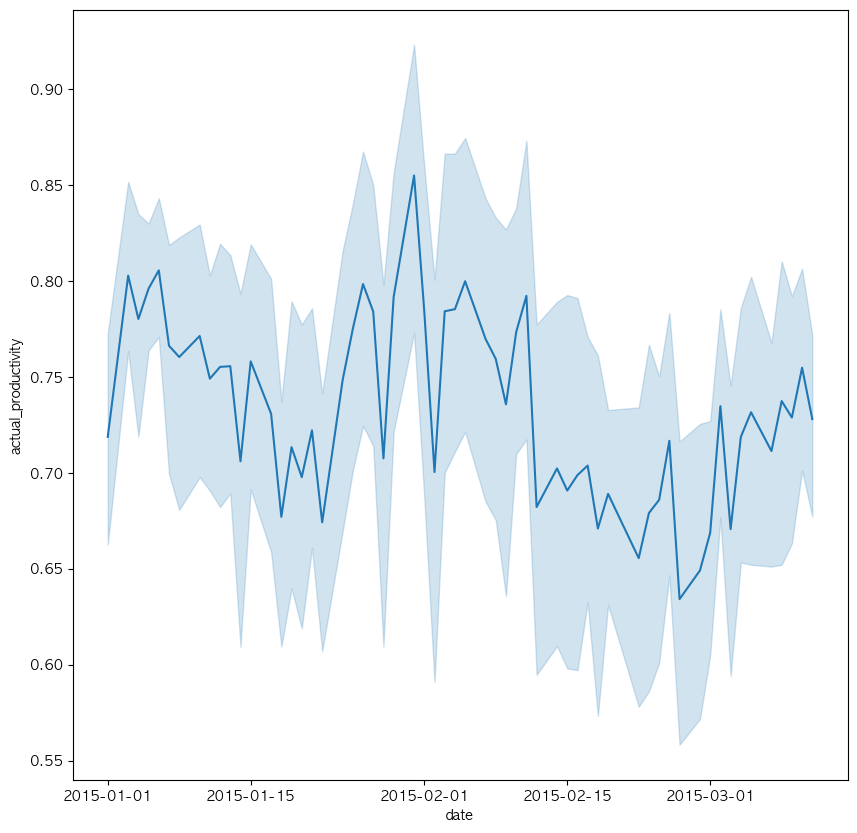

In [104]:
sns.lineplot(x=df_categorical['date'], y=df_categorical['actual_productivity'])


plt.gcf().set_size_inches(10,10)

In [105]:
df

date   quarter  department  day  team  targeted_productivity  \
0    2015-01-01  Quarter1      sweing    1     8                   0.80   
1    2015-01-01  Quarter1  finishing     1     1                   0.75   
2    2015-01-01  Quarter1      sweing    1    11                   0.80   
3    2015-01-01  Quarter1      sweing    1    12                   0.80   
4    2015-01-01  Quarter1      sweing    1     6                   0.80   
...         ...       ...         ...  ...   ...                    ...   
1192 2015-03-11  Quarter2   finishing   11    10                   0.75   
1193 2015-03-11  Quarter2   finishing   11     8                   0.70   
1194 2015-03-11  Quarter2   finishing   11     7                   0.65   
1195 2015-03-11  Quarter2   finishing   11     9                   0.75   
1196 2015-03-11  Quarter2   finishing   11     6                   0.70   

        smv     wip  over_time  incentive  idle_time  idle_men  \
0     26.16  1108.0       7080         98        0.0         0   
1      3.94     NaN        960          0        0.0         0   
2     11.41   968.0       3660         50        0.0         0   
3     11.41   968.0       3660         50        0.0         0   
4     25.90  1170.0       1920         50        0.0         0   
...     ...     ...        ...        ...        ...       ...   
1192   2.90     NaN        960          0        0.0         0   
1193   3.90     NaN        960          0        0.0         0   
1194   3.90     NaN        960          0        0.0         0   
1195   2.90     NaN       1800          0        0.0         0   
1196   2.90     NaN        720          0        0.0         0   

      no_of_style_change  no_of_workers  actual_productivity  month  year  \
0                      0           59.0             0.940725      1  2015   
1                      0            8.0             0.886500      1  2015   
2                      0           30.5             0.800570      1  2015   
3                      0           30.5             0.800570      1  2015   
4                      0           56.0             0.800382      1  2015   
...                  ...            ...                  ...    ...   ...   
1192                   0            8.0             0.628333      3  2015   
1193                   0            8.0             0.625625      3  2015   
1194                   0            8.0             0.625625      3  2015   
1195                   0           15.0             0.505889      3  2015   
1196                   0            6.0             0.394722      3  2015   

      dayofweek yearmonth  success  
0             3    2015-1        0  
1             3    2015-1        0  
2             3    2015-1        0  
3             3    2015-1        0  
4             3    2015-1        0  
...         ...       ...      ...  
1192          2    2015-3        1  
1193          2    2015-3        1  
1194          2    2015-3        1  
1195          2    2015-3        1  
1196          2    2015-3        1  

[1197 rows x 20 columns]

In [106]:
df['success'] = np.where(df['targeted_productivity'] >= df['actual_productivity'],1,0)

In [107]:
df_numerical['success'] = df['success']

In [108]:
for i in df.columns:
    print('===========')
    print(i)
    print(df[i].value_counts())

date
date
2015-03-11    24
2015-01-31    24
2015-01-11    23
2015-03-10    23
2015-01-12    23
              ..
2015-02-05    18
2015-02-09    18
2015-02-16    18
2015-02-14    17
2015-01-20    15
Name: count, Length: 59, dtype: int64
quarter
quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64
department
department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64
day
day
11    66
10    64
8     63
3     62
4     61
7     60
5     59
1     58
28    42
25    42
12    42
22    42
24    42
17    41
26    40
18    40
9     40
2     39
19    39
15    38
14    38
31    24
13    22
27    21
6     21
29    20
21    19
23    19
16    18
20    15
Name: count, dtype: int64
team
team
8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: count, dtype: int64
targeted_productivity
targeted_productivity
0.80    540
0.70    242
0.75    216
0

In [109]:
df_categorical['success'] = df['success']

In [110]:
df_numerical

date  day  team  targeted_productivity    smv     wip  over_time  \
0    2015-01-01    1     8                   0.80  26.16  1108.0       7080   
1    2015-01-01    1     1                   0.75   3.94     NaN        960   
2    2015-01-01    1    11                   0.80  11.41   968.0       3660   
3    2015-01-01    1    12                   0.80  11.41   968.0       3660   
4    2015-01-01    1     6                   0.80  25.90  1170.0       1920   
...         ...  ...   ...                    ...    ...     ...        ...   
1192 2015-03-11   11    10                   0.75   2.90     NaN        960   
1193 2015-03-11   11     8                   0.70   3.90     NaN        960   
1194 2015-03-11   11     7                   0.65   3.90     NaN        960   
1195 2015-03-11   11     9                   0.75   2.90     NaN       1800   
1196 2015-03-11   11     6                   0.70   2.90     NaN        720   

      incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0            98        0.0         0                   0           59.0   
1             0        0.0         0                   0            8.0   
2            50        0.0         0                   0           30.5   
3            50        0.0         0                   0           30.5   
4            50        0.0         0                   0           56.0   
...         ...        ...       ...                 ...            ...   
1192          0        0.0         0                   0            8.0   
1193          0        0.0         0                   0            8.0   
1194          0        0.0         0                   0            8.0   
1195          0        0.0         0                   0           15.0   
1196          0        0.0         0                   0            6.0   

      actual_productivity  month  year  dayofweek  success  
0                0.940725      1  2015          3        0  
1                0.886500      1  2015          3        0  
2                0.800570      1  2015          3        0  
3                0.800570      1  2015          3        0  
4                0.800382      1  2015          3        0  
...                   ...    ...   ...        ...      ...  
1192             0.628333      3  2015          2        1  
1193             0.625625      3  2015          2        1  
1194             0.625625      3  2015          2        1  
1195             0.505889      3  2015          2        1  
1196             0.394722      3  2015          2        1  

[1197 rows x 17 columns]

In [111]:
df_categorical.groupby(['quarter'])['actual_productivity'].mean()

quarter
Quarter1    0.751560
Quarter2    0.743710
Quarter3    0.704759
Quarter4    0.709067
Quarter5    0.826177
Name: actual_productivity, dtype: float64

<Axes: xlabel='quarter', ylabel='actual_productivity'>

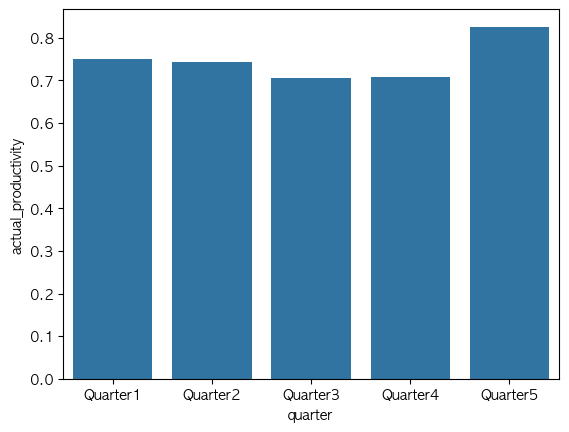

In [112]:
sns.barplot(x=df_categorical.groupby(['quarter'])['actual_productivity'].mean().index, y=df_categorical.groupby(['quarter'])['actual_productivity'].mean())

In [113]:
df_categorical['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [114]:
df_categorical['department'] = df_categorical['department'].astype(str).str.replace(' ', '')

In [115]:
df_categorical

quarter department yearmonth       date  actual_productivity  success
0     Quarter1     sweing    2015-1 2015-01-01             0.940725        0
1     Quarter1  finishing    2015-1 2015-01-01             0.886500        0
2     Quarter1     sweing    2015-1 2015-01-01             0.800570        0
3     Quarter1     sweing    2015-1 2015-01-01             0.800570        0
4     Quarter1     sweing    2015-1 2015-01-01             0.800382        0
...        ...        ...       ...        ...                  ...      ...
1192  Quarter2  finishing    2015-3 2015-03-11             0.628333        1
1193  Quarter2  finishing    2015-3 2015-03-11             0.625625        1
1194  Quarter2  finishing    2015-3 2015-03-11             0.625625        1
1195  Quarter2  finishing    2015-3 2015-03-11             0.505889        1
1196  Quarter2  finishing    2015-3 2015-03-11             0.394722        1

[1197 rows x 6 columns]

==================== ====================
quarter
Quarter1    0.751560
Quarter2    0.743710
Quarter3    0.704759
Quarter4    0.709067
Quarter5    0.826177
Name: actual_productivity, dtype: float64


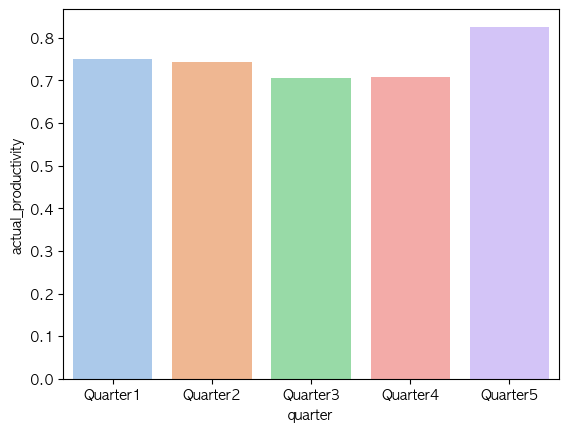

==================== ====================
department
finishing    0.752951
sweing       0.722013
Name: actual_productivity, dtype: float64


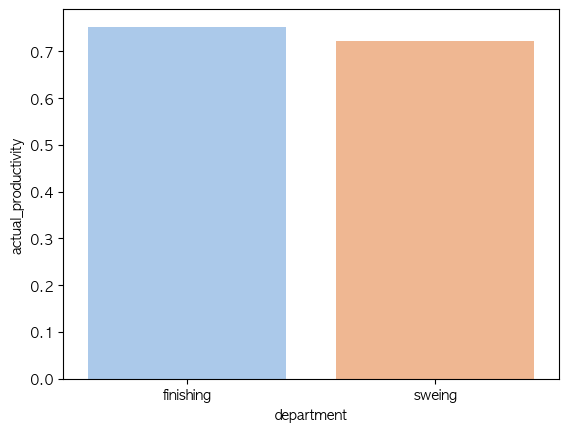

==================== ====================
yearmonth
2015-1    0.755415
2015-2    0.717948
2015-3    0.718953
Name: actual_productivity, dtype: float64


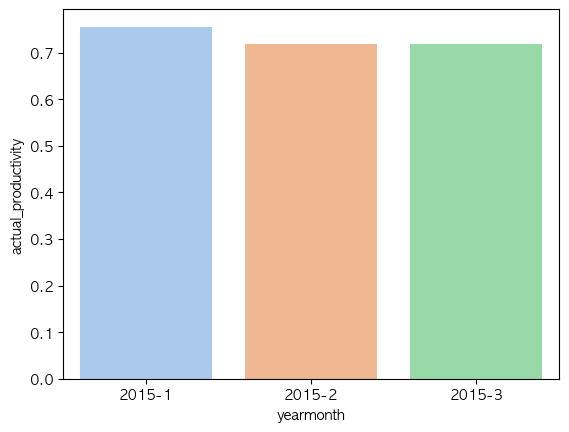

==================== ====================
date
2015-01-01    0.718711
2015-01-03    0.802773
2015-01-04    0.780174
2015-01-05    0.796027
2015-01-06    0.805508
                ...   
2015-03-07    0.711334
2015-03-08    0.737380
2015-03-09    0.728803
2015-03-10    0.754781
2015-03-11    0.727973
Name: actual_productivity, Length: 59, dtype: float64


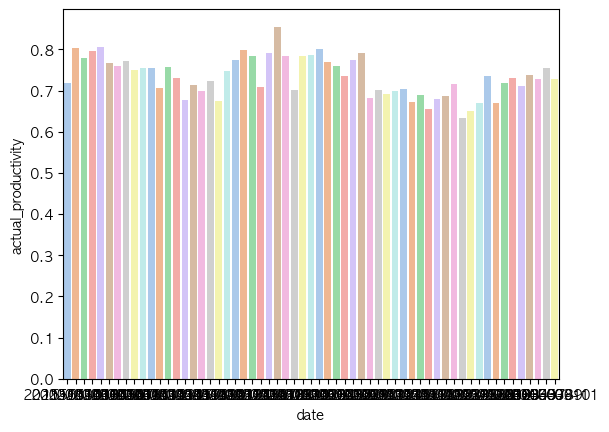

==================== ====================
actual_productivity
0.233705    0.233705
0.235795    0.235795
0.238042    0.238042
0.246250    0.246250
0.247316    0.247316
              ...   
1.059621    1.059621
1.096633    1.096633
1.100484    1.100484
1.108125    1.108125
1.120437    1.120437
Name: actual_productivity, Length: 879, dtype: float64


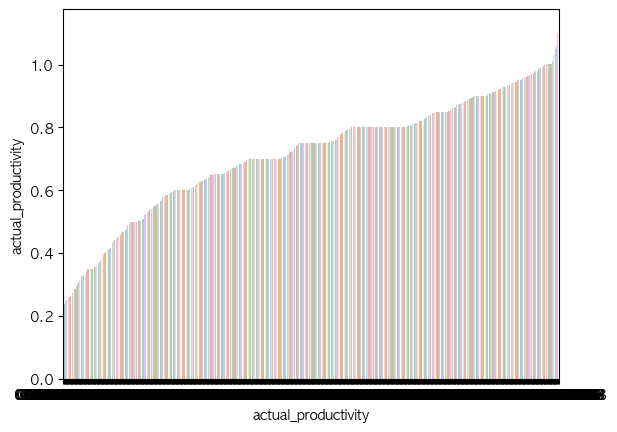

==================== ====================
success
0    0.804980
1    0.549929
Name: actual_productivity, dtype: float64


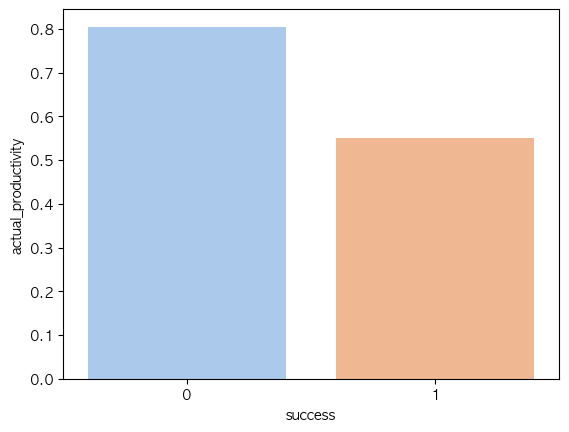

In [116]:
for i in df_categorical:
    print('====================', '====================')
    print(df_categorical.groupby([i])['actual_productivity'].mean())
    sns.barplot(x=df_categorical.groupby([i])['actual_productivity'].mean().index, y=df_categorical.groupby([i])['actual_productivity'].mean(), palette='pastel')
    plt.show()

          count  sum      ratio
quarter                        
Quarter3    210   72  34.285714
Quarter4    248   70  28.225806
Quarter2    335   88  26.268657
Quarter1    360   91  25.277778
Quarter5     44    7  15.909091


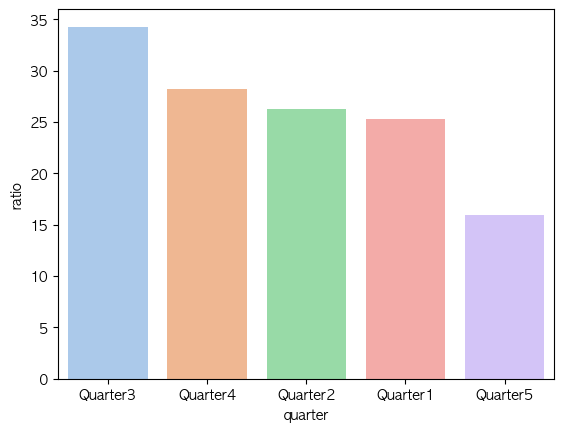

In [117]:
df_check = df_categorical.groupby(['quarter'])['success'].agg(['count', 'sum'])
df_check['ratio'] = (df_check['sum'] / df_check['count'])*100
df_check  = df_check.sort_values(by='ratio', ascending=False)
print(df_check)


sns.barplot(data=df_check, x=df_check.index, y='ratio', palette='pastel')
plt.show()

          count  sum      ratio
quarter                        
Quarter3    210   72  34.285714
Quarter4    248   70  28.225806
Quarter2    335   88  26.268657
Quarter1    360   91  25.277778
Quarter5     44    7  15.909091


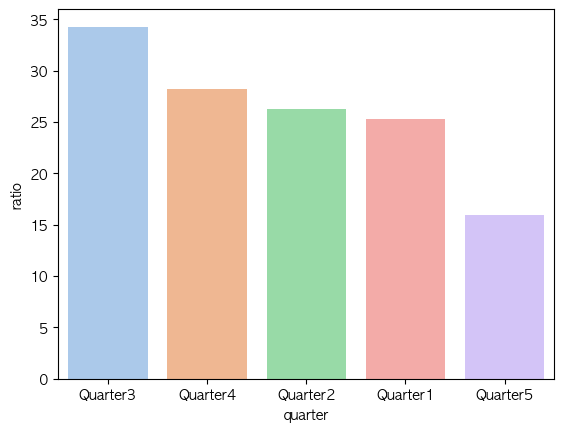

            count  sum      ratio
department                       
finishing     506  204  40.316206
sweing        691  124  17.945007


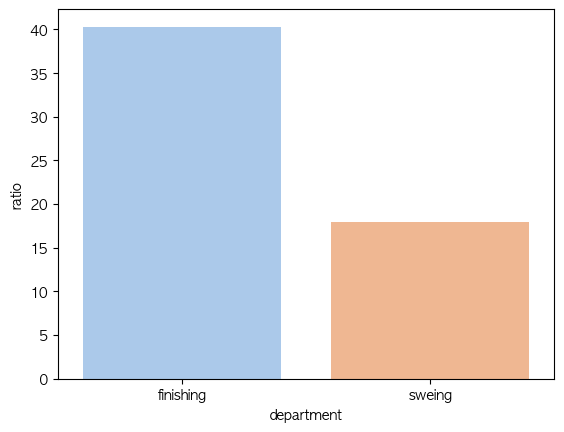

           count  sum      ratio
yearmonth                       
2015-2       443  151  34.085779
2015-3       212   53  25.000000
2015-1       542  124  22.878229


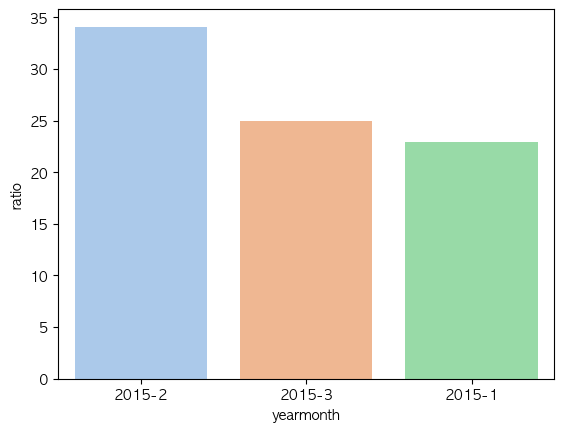

            count  sum      ratio
date                             
2015-02-19     20   13  65.000000
2015-02-22     20   11  55.000000
2015-02-12     19   10  52.631579
2015-02-15     19    9  47.368421
2015-02-16     18    8  44.444444
...           ...  ...        ...
2015-01-27     21    3  14.285714
2015-03-10     23    3  13.043478
2015-01-31     24    3  12.500000
2015-01-05     22    2   9.090909
2015-01-26     19    1   5.263158

[59 rows x 3 columns]


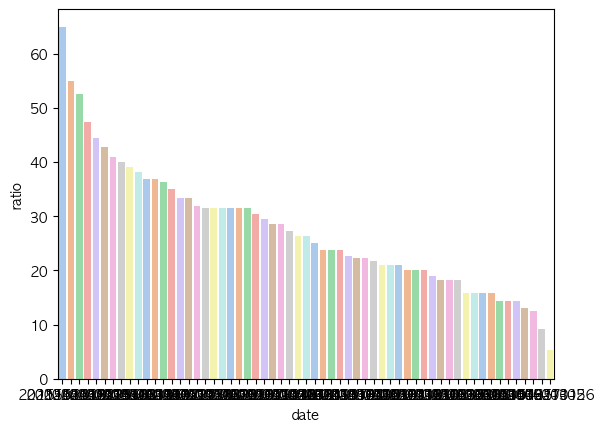

                     count  sum  ratio
actual_productivity                   
0.233705                 1    1  100.0
0.612517                 1    1  100.0
0.625313                 1    1  100.0
0.622828                 1    1  100.0
0.622500                 1    1  100.0
...                    ...  ...    ...
0.750727                 1    0    0.0
0.750750                 1    0    0.0
0.750770                 2    0    0.0
0.750797                 2    0    0.0
1.120437                 1    0    0.0

[879 rows x 3 columns]


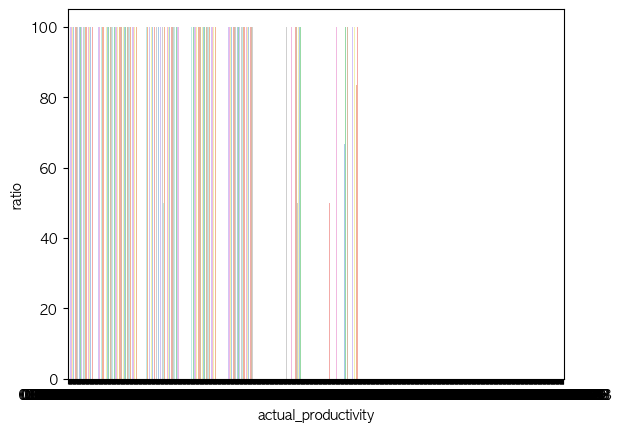

         count  sum  ratio
success                   
1          328  328  100.0
0          869    0    0.0


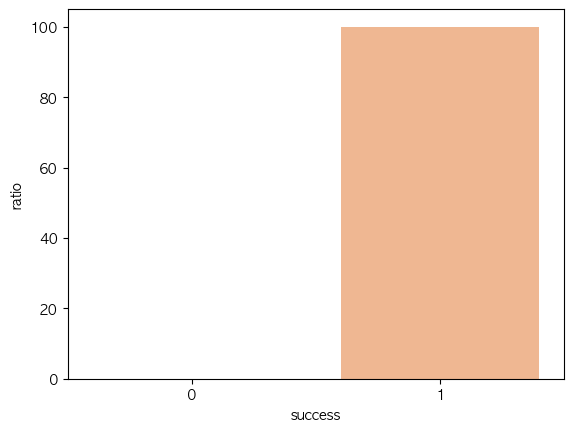

In [118]:
for i in df_categorical.columns:
    df_check = df_categorical.groupby([i])['success'].agg(['count', 'sum'])
    df_check['ratio'] = (df_check['sum'] / df_check['count'])*100
    df_check  = df_check.sort_values(by='ratio', ascending=False)
    print(df_check)


    sns.barplot(data=df_check, x=df_check.index, y='ratio', palette='pastel')
    plt.show()

            count  sum      ratio
date                             
2015-01-01     19    7  36.842105
2015-01-03     21    4  19.047619
2015-01-04     21    6  28.571429
2015-01-05     22    2   9.090909
2015-01-06     21    3  14.285714
...           ...  ...        ...
2015-03-07     19    7  36.842105
2015-03-08     22    4  18.181818
2015-03-09     22    4  18.181818
2015-03-10     23    3  13.043478
2015-03-11     24    6  25.000000

[59 rows x 3 columns]


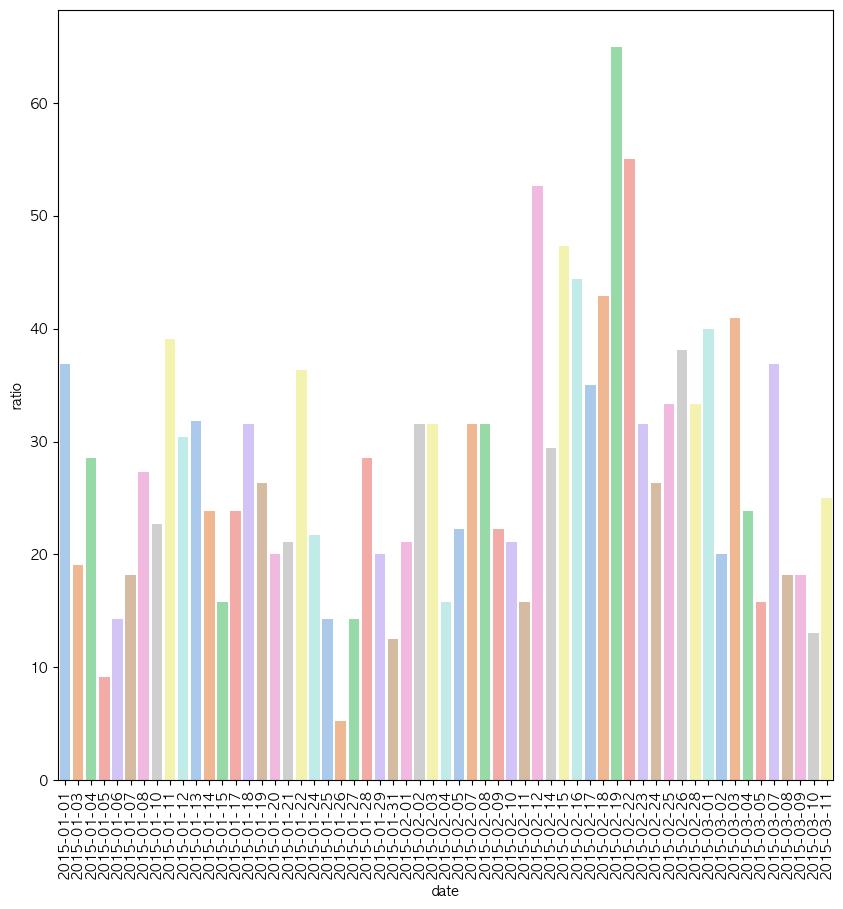

In [119]:
df_check = df_categorical.groupby(['date'])['success'].agg(['count', 'sum'])
df_check['ratio'] = (df_check['sum'] / df_check['count'])*100
# df_check  = df_check.sort_values(by='ratio', ascending=False)
print(df_check)


sns.barplot(data=df_check, x=df_check.index, y='ratio', palette='pastel')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,10)
plt.show()

In [120]:
df_categorical

quarter department yearmonth       date  actual_productivity  success
0     Quarter1     sweing    2015-1 2015-01-01             0.940725        0
1     Quarter1  finishing    2015-1 2015-01-01             0.886500        0
2     Quarter1     sweing    2015-1 2015-01-01             0.800570        0
3     Quarter1     sweing    2015-1 2015-01-01             0.800570        0
4     Quarter1     sweing    2015-1 2015-01-01             0.800382        0
...        ...        ...       ...        ...                  ...      ...
1192  Quarter2  finishing    2015-3 2015-03-11             0.628333        1
1193  Quarter2  finishing    2015-3 2015-03-11             0.625625        1
1194  Quarter2  finishing    2015-3 2015-03-11             0.625625        1
1195  Quarter2  finishing    2015-3 2015-03-11             0.505889        1
1196  Quarter2  finishing    2015-3 2015-03-11             0.394722        1

[1197 rows x 6 columns]

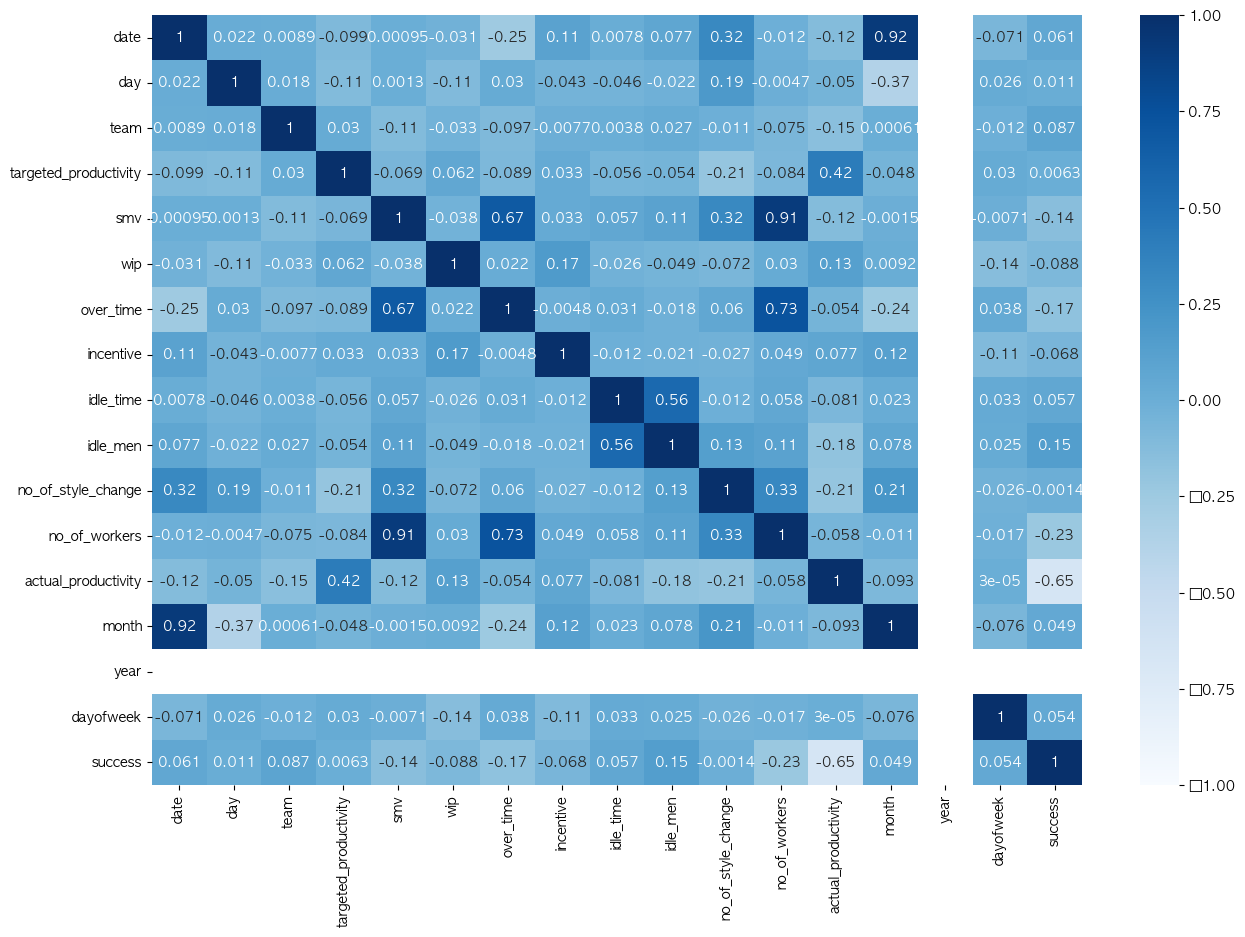

In [121]:
sns.heatmap(df_numerical.corr(), annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.gcf().set_size_inches(15,10)
plt.show()

In [122]:
df_categorical['team'] = df['team']


In [123]:
# df_numerical.drop('team', axis=1, inplace=True)

In [124]:
 df_numerical['gp']= np.where(df_numerical['targeted_productivity'] < df_numerical['targeted_productivity'].describe()[4],1,
         np.where(df_numerical['targeted_productivity'] < df_numerical['targeted_productivity'].describe()[5],2,
         np.where(df_numerical['targeted_productivity'] < df_numerical['targeted_productivity'].describe()[6],3,4
         )))

df_numerical.groupby('gp')['actual_productivity'].mean()

gp
1    0.599857
2    0.676520
3    0.762733
4    0.800119
Name: actual_productivity, dtype: float64

In [125]:
for i in df_numerical.columns:
     if i not in ['wip']:
          df_numerical['gp']= np.where(df_numerical[i] < df_numerical[i].describe()[4],1,
          np.where(df_numerical[i] < df_numerical[i].describe()[5],2,
          np.where(df_numerical[i] < df_numerical[i].describe()[6],3,4
          )))
     df_check = df_numerical.groupby('gp')['actual_productivity'].mean()
     print(df_check)

gp
1    0.754553
2    0.729979
3    0.702001
4    0.727973
Name: actual_productivity, dtype: float64
gp
1    0.747842
2    0.755857
3    0.709886
4    0.726432
Name: actual_productivity, dtype: float64
gp
1    0.795486
2    0.758138
3    0.675709
4    0.730176
Name: actual_productivity, dtype: float64
gp
1    0.599857
2    0.676520
3    0.762733
4    0.800119
Name: actual_productivity, dtype: float64
gp
1    0.640568
2    0.780542
3    0.739987
4    0.700551
Name: actual_productivity, dtype: float64
gp
1    0.640568
2    0.780542
3    0.739987
4    0.700551
Name: actual_productivity, dtype: float64
gp
1    0.729442
2    0.759818
3    0.727290
4    0.721139
Name: actual_productivity, dtype: float64
gp
3    0.699030
4    0.824511
Name: actual_productivity, dtype: float64
gp
4    0.735091
Name: actual_productivity, dtype: float64
gp
4    0.735091
Name: actual_productivity, dtype: float64
gp
4    0.735091
Name: actual_productivity, dtype: float64
gp
1    0.686145
2    0.814928
3    0.69191

date
gp
1    0.754553
2    0.729979
3    0.702001
4    0.727973
Name: actual_productivity, dtype: float64


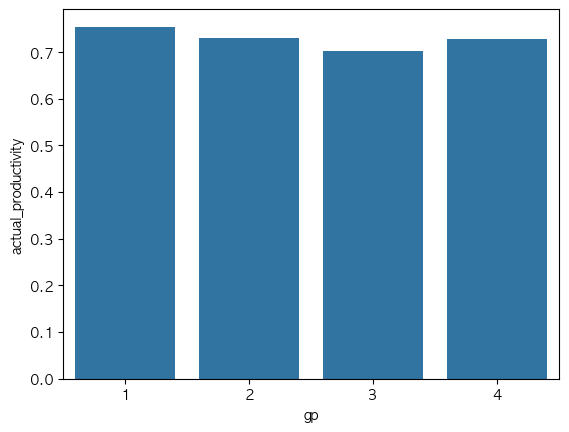

day
gp
1    0.747842
2    0.755857
3    0.709886
4    0.726432
Name: actual_productivity, dtype: float64


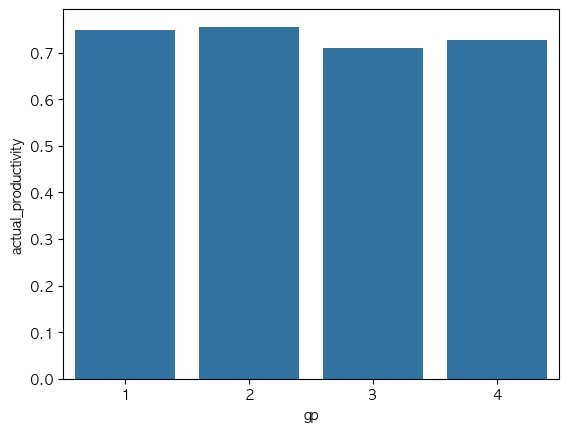

team
gp
1    0.795486
2    0.758138
3    0.675709
4    0.730176
Name: actual_productivity, dtype: float64


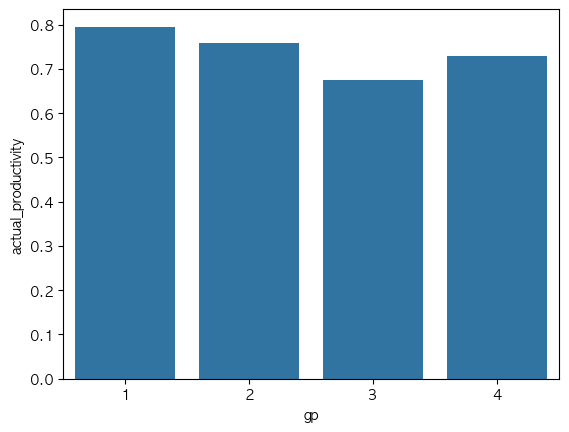

targeted_productivity
gp
1    0.599857
2    0.676520
3    0.762733
4    0.800119
Name: actual_productivity, dtype: float64


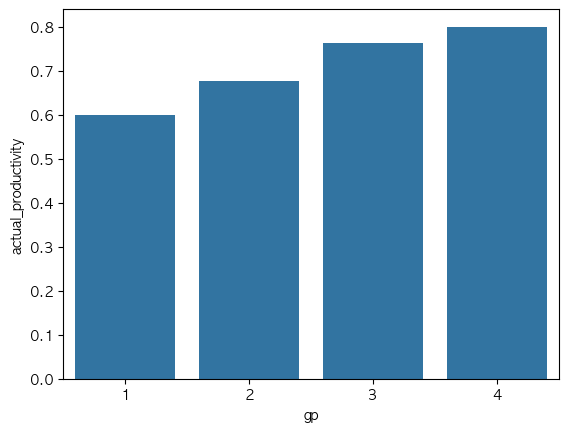

smv
gp
1    0.640568
2    0.780542
3    0.739987
4    0.700551
Name: actual_productivity, dtype: float64


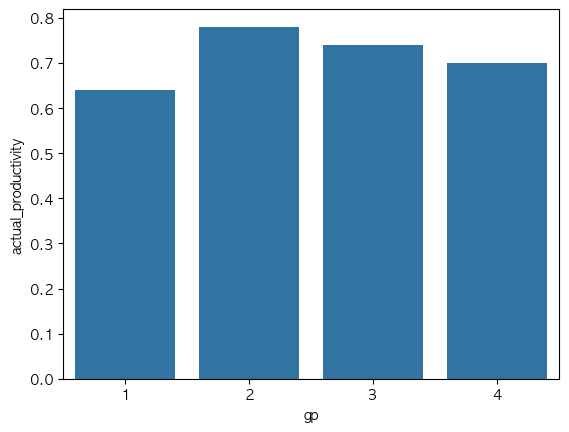

wip
gp
1    0.640568
2    0.780542
3    0.739987
4    0.700551
Name: actual_productivity, dtype: float64


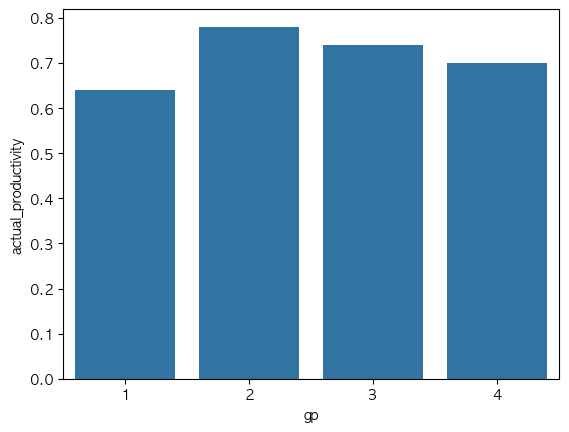

over_time
gp
1    0.729442
2    0.759818
3    0.727290
4    0.721139
Name: actual_productivity, dtype: float64


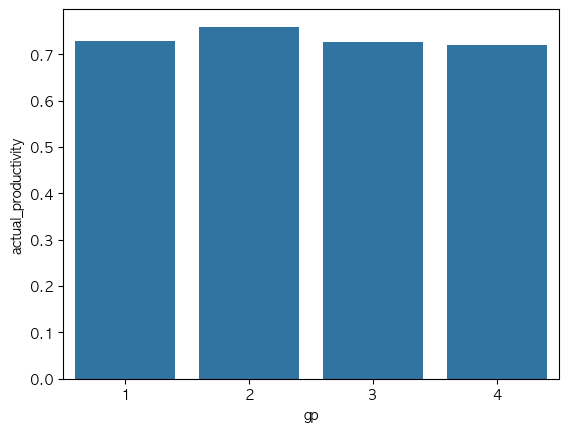

incentive
gp
3    0.699030
4    0.824511
Name: actual_productivity, dtype: float64


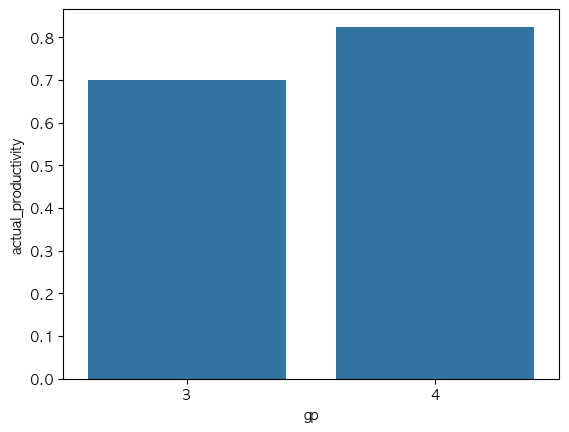

idle_time
gp
4    0.735091
Name: actual_productivity, dtype: float64


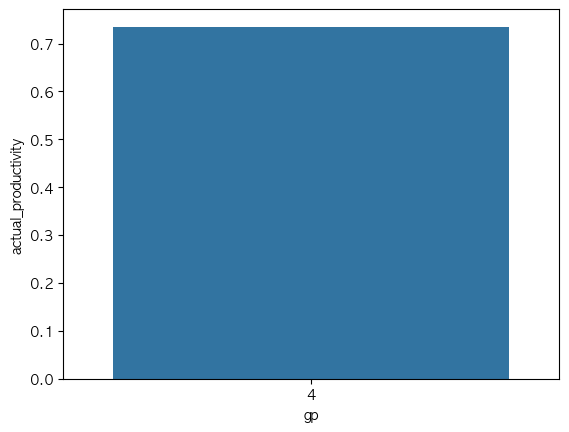

idle_men
gp
4    0.735091
Name: actual_productivity, dtype: float64


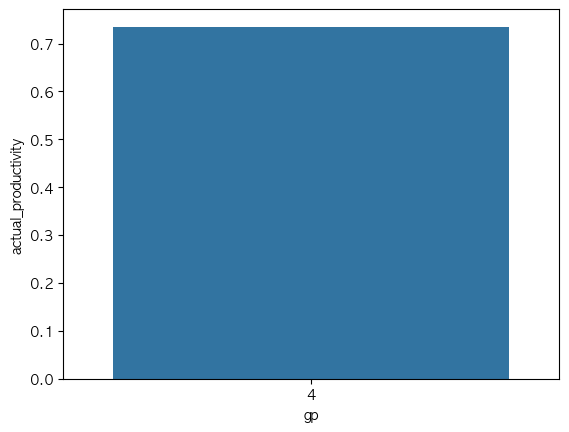

no_of_style_change
gp
4    0.735091
Name: actual_productivity, dtype: float64


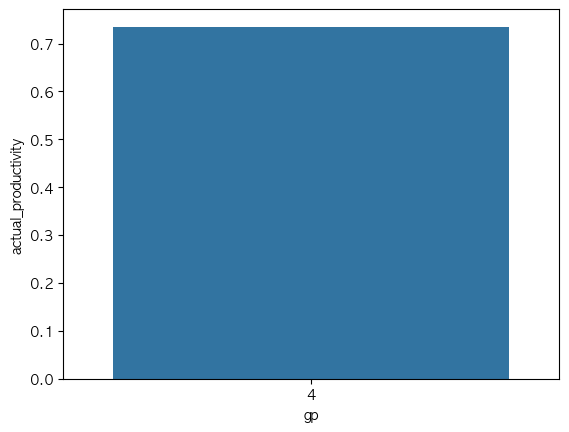

no_of_workers
gp
1    0.686145
2    0.814928
3    0.691919
4    0.739146
Name: actual_productivity, dtype: float64


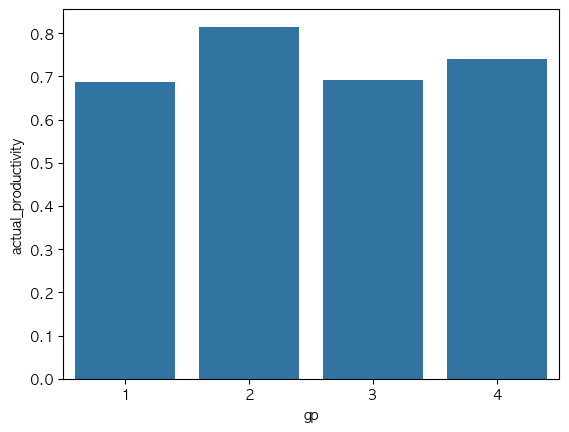

actual_productivity
gp
1    0.489459
2    0.716682
3    0.807039
4    0.926544
Name: actual_productivity, dtype: float64


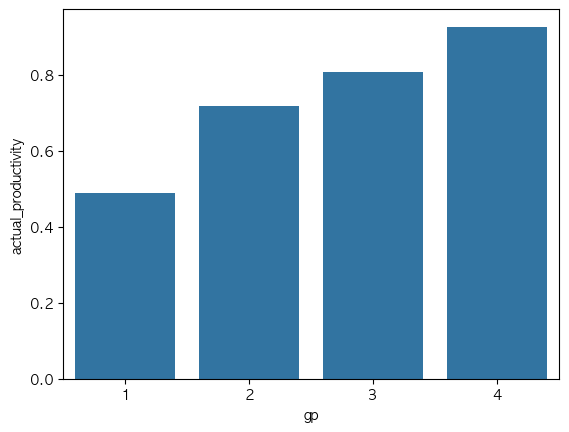

month
gp
2    0.755415
4    0.718273
Name: actual_productivity, dtype: float64


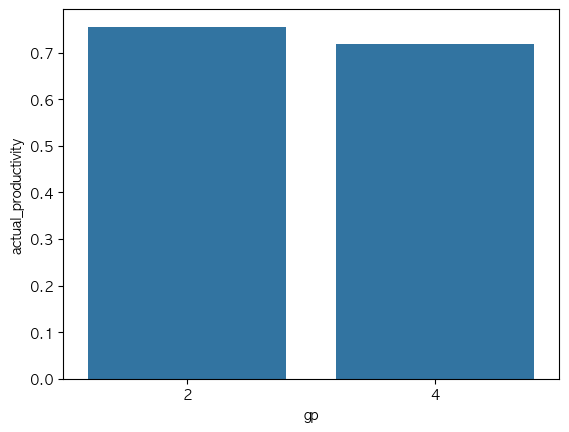

year
gp
4    0.735091
Name: actual_productivity, dtype: float64


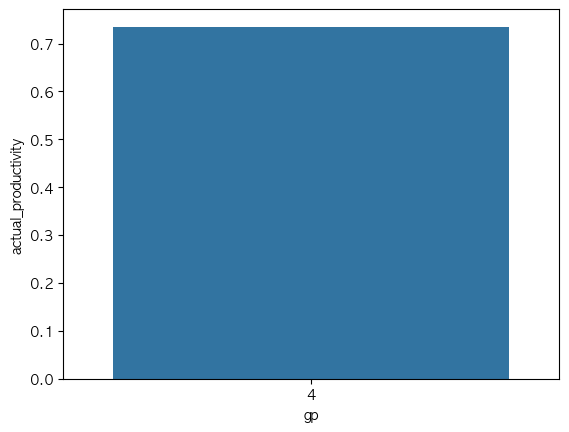

dayofweek
gp
1    0.735488
2    0.742701
3    0.726638
4    0.739788
Name: actual_productivity, dtype: float64


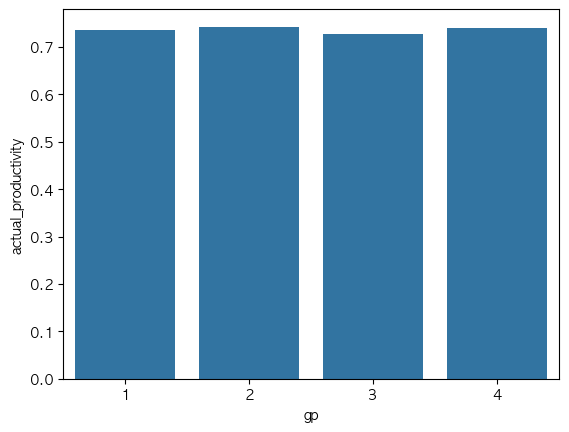

success
gp
3    0.804980
4    0.549929
Name: actual_productivity, dtype: float64


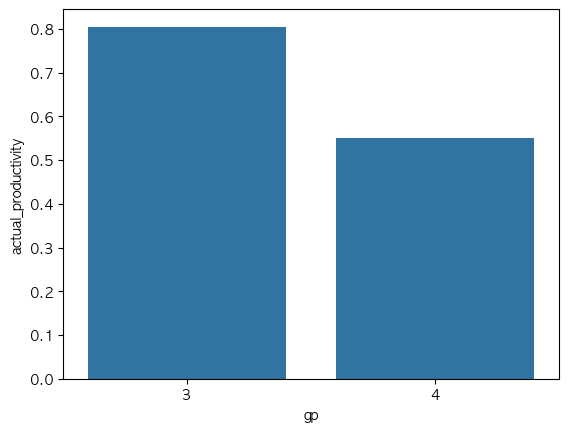

gp
gp
3    0.804980
4    0.549929
Name: actual_productivity, dtype: float64


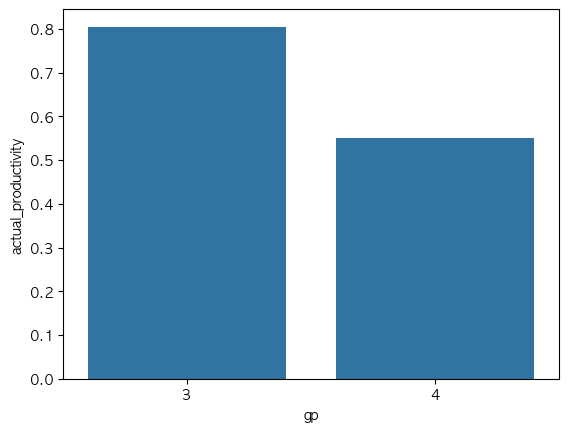

In [126]:
import numpy as np

for i in df_numerical.columns:
    if i not in ['wip']:
        df_numerical['gp'] = np.where(df_numerical[i] < df_numerical[i].describe()[4], 1,
                                      np.where(df_numerical[i] < df_numerical[i].describe()[5], 2,
                                               np.where(df_numerical[i] < df_numerical[i].describe()[6], 3, 4)))
    print(i)
    mean_productivity_by_group = df_numerical.groupby('gp')['actual_productivity'].mean()
    print(mean_productivity_by_group)
    sns.barplot(x=mean_productivity_by_group.index, y=mean_productivity_by_group)
    plt.show()


In [127]:
df_numerical.describe()

date          day         team  \
count                           1197  1197.000000  1197.000000   
mean   2015-02-04 10:56:50.526315776    13.533835     6.426901   
min              2015-01-01 00:00:00     1.000000     1.000000   
25%              2015-01-18 00:00:00     6.000000     3.000000   
50%              2015-02-03 00:00:00    12.000000     6.000000   
75%              2015-02-23 00:00:00    21.000000     9.000000   
max              2015-03-11 00:00:00    31.000000    12.000000   
std                              NaN     8.623967     3.463963   

       targeted_productivity          smv           wip     over_time  \
count            1197.000000  1197.000000    691.000000   1197.000000   
mean                0.729632    15.062172   1190.465991   4567.460317   
min                 0.070000     2.900000      7.000000      0.000000   
25%                 0.700000     3.940000    774.500000   1440.000000   
50%                 0.750000    15.260000   1039.000000   3960.000000   
75%                 0.800000    24.260000   1252.500000   6960.000000   
max                 0.800000    54.560000  23122.000000  25920.000000   
std                 0.097891    10.943219   1837.455001   3348.823563   

         incentive    idle_time     idle_men  no_of_style_change  \
count  1197.000000  1197.000000  1197.000000         1197.000000   
mean     38.210526     0.730159     0.369256            0.150376   
min       0.000000     0.000000     0.000000            0.000000   
25%       0.000000     0.000000     0.000000            0.000000   
50%       0.000000     0.000000     0.000000            0.000000   
75%      50.000000     0.000000     0.000000            0.000000   
max    3600.000000   300.000000    45.000000            2.000000   
std     160.182643    12.709757     3.268987            0.427848   

       no_of_workers  actual_productivity        month    year    dayofweek  \
count    1197.000000          1197.000000  1197.000000  1197.0  1197.000000   
mean       34.609858             0.735091     1.724311  2015.0     2.812865   
min         2.000000             0.233705     1.000000  2015.0     0.000000   
25%         9.000000             0.650307     1.000000  2015.0     1.000000   
50%        34.000000             0.773333     2.000000  2015.0     2.000000   
75%        57.000000             0.850253     2.000000  2015.0     5.000000   
max        89.000000             1.120437     3.000000  2015.0     6.000000   
std        22.197687             0.174488     0.744558     0.0     2.112252   

           success           gp  
count  1197.000000  1197.000000  
mean      0.274018     3.274018  
min       0.000000     3.000000  
25%       0.000000     3.000000  
50%       0.000000     3.000000  
75%       1.000000     4.000000  
max       1.000000     4.000000  
std       0.446205     0.446205

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'team'}>,
        <Axes: title={'center': 'targeted_productivity'}>],
       [<Axes: title={'center': 'smv'}>, <Axes: title={'center': 'wip'}>,
        <Axes: title={'center': 'over_time'}>,
        <Axes: title={'center': 'incentive'}>],
       [<Axes: title={'center': 'idle_time'}>,
        <Axes: title={'center': 'idle_men'}>,
        <Axes: title={'center': 'no_of_style_change'}>,
        <Axes: title={'center': 'no_of_workers'}>],
       [<Axes: title={'center': 'actual_productivity'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'dayofweek'}>],
       [<Axes: title={'center': 'success'}>,
        <Axes: title={'center': 'gp'}>, <Axes: >, <Axes: >]], dtype=object)

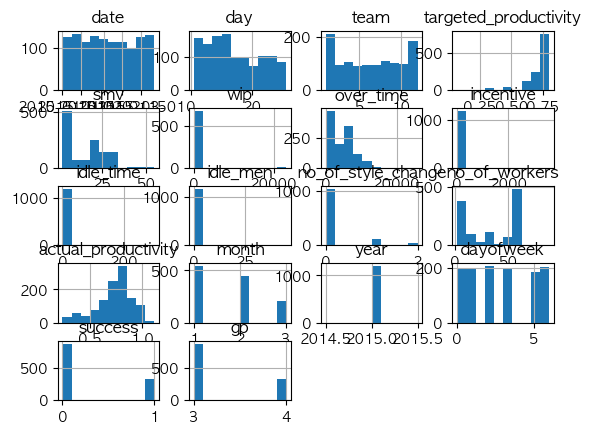

In [128]:
df_numerical.hist()

<Axes: >

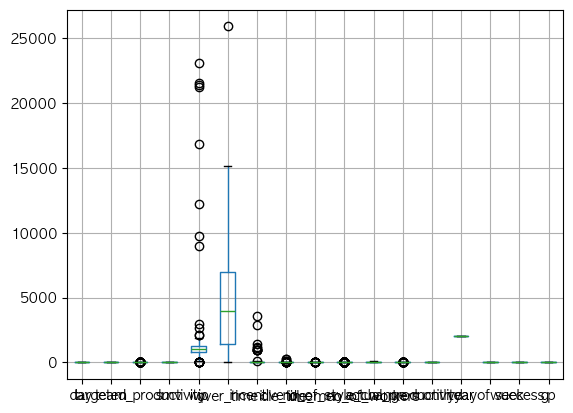

In [129]:
df_numerical.boxplot()

In [130]:
df_numerical

date  day  team  targeted_productivity    smv     wip  over_time  \
0    2015-01-01    1     8                   0.80  26.16  1108.0       7080   
1    2015-01-01    1     1                   0.75   3.94     NaN        960   
2    2015-01-01    1    11                   0.80  11.41   968.0       3660   
3    2015-01-01    1    12                   0.80  11.41   968.0       3660   
4    2015-01-01    1     6                   0.80  25.90  1170.0       1920   
...         ...  ...   ...                    ...    ...     ...        ...   
1192 2015-03-11   11    10                   0.75   2.90     NaN        960   
1193 2015-03-11   11     8                   0.70   3.90     NaN        960   
1194 2015-03-11   11     7                   0.65   3.90     NaN        960   
1195 2015-03-11   11     9                   0.75   2.90     NaN       1800   
1196 2015-03-11   11     6                   0.70   2.90     NaN        720   

      incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0            98        0.0         0                   0           59.0   
1             0        0.0         0                   0            8.0   
2            50        0.0         0                   0           30.5   
3            50        0.0         0                   0           30.5   
4            50        0.0         0                   0           56.0   
...         ...        ...       ...                 ...            ...   
1192          0        0.0         0                   0            8.0   
1193          0        0.0         0                   0            8.0   
1194          0        0.0         0                   0            8.0   
1195          0        0.0         0                   0           15.0   
1196          0        0.0         0                   0            6.0   

      actual_productivity  month  year  dayofweek  success  gp  
0                0.940725      1  2015          3        0   3  
1                0.886500      1  2015          3        0   3  
2                0.800570      1  2015          3        0   3  
3                0.800570      1  2015          3        0   3  
4                0.800382      1  2015          3        0   3  
...                   ...    ...   ...        ...      ...  ..  
1192             0.628333      3  2015          2        1   4  
1193             0.625625      3  2015          2        1   4  
1194             0.625625      3  2015          2        1   4  
1195             0.505889      3  2015          2        1   4  
1196             0.394722      3  2015          2        1   4  

[1197 rows x 18 columns]

In [131]:
df_numerical['wip'].mean()

1190.4659913169319

In [132]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
month                      0
year                       0
dayofweek                  0
yearmonth                  0
success                    0
dtype: int64

In [133]:
df_numerical

date  day  team  targeted_productivity    smv     wip  over_time  \
0    2015-01-01    1     8                   0.80  26.16  1108.0       7080   
1    2015-01-01    1     1                   0.75   3.94     NaN        960   
2    2015-01-01    1    11                   0.80  11.41   968.0       3660   
3    2015-01-01    1    12                   0.80  11.41   968.0       3660   
4    2015-01-01    1     6                   0.80  25.90  1170.0       1920   
...         ...  ...   ...                    ...    ...     ...        ...   
1192 2015-03-11   11    10                   0.75   2.90     NaN        960   
1193 2015-03-11   11     8                   0.70   3.90     NaN        960   
1194 2015-03-11   11     7                   0.65   3.90     NaN        960   
1195 2015-03-11   11     9                   0.75   2.90     NaN       1800   
1196 2015-03-11   11     6                   0.70   2.90     NaN        720   

      incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0            98        0.0         0                   0           59.0   
1             0        0.0         0                   0            8.0   
2            50        0.0         0                   0           30.5   
3            50        0.0         0                   0           30.5   
4            50        0.0         0                   0           56.0   
...         ...        ...       ...                 ...            ...   
1192          0        0.0         0                   0            8.0   
1193          0        0.0         0                   0            8.0   
1194          0        0.0         0                   0            8.0   
1195          0        0.0         0                   0           15.0   
1196          0        0.0         0                   0            6.0   

      actual_productivity  month  year  dayofweek  success  gp  
0                0.940725      1  2015          3        0   3  
1                0.886500      1  2015          3        0   3  
2                0.800570      1  2015          3        0   3  
3                0.800570      1  2015          3        0   3  
4                0.800382      1  2015          3        0   3  
...                   ...    ...   ...        ...      ...  ..  
1192             0.628333      3  2015          2        1   4  
1193             0.625625      3  2015          2        1   4  
1194             0.625625      3  2015          2        1   4  
1195             0.505889      3  2015          2        1   4  
1196             0.394722      3  2015          2        1   4  

[1197 rows x 18 columns]

In [134]:
df_numerical.shape

(1197, 18)

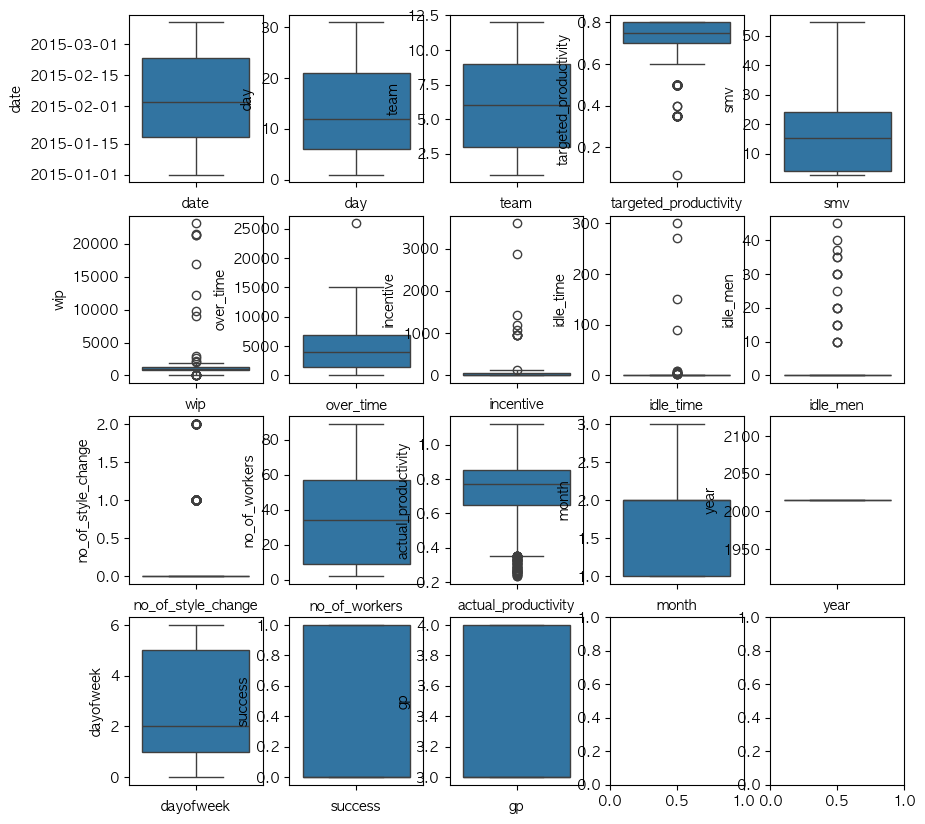

In [135]:

plt.subplots(4,5, figsize=(10,10))

for i, col in enumerate(df_numerical.columns):
    plt.subplot(4,5,i+1)
    sns.boxplot(data=df_numerical, y=col)
    plt.xlabel(col)


In [136]:
df_numerical.drop(['gp'], axis=1, inplace=True)

In [137]:
df_numerical

date  day  team  targeted_productivity    smv     wip  over_time  \
0    2015-01-01    1     8                   0.80  26.16  1108.0       7080   
1    2015-01-01    1     1                   0.75   3.94     NaN        960   
2    2015-01-01    1    11                   0.80  11.41   968.0       3660   
3    2015-01-01    1    12                   0.80  11.41   968.0       3660   
4    2015-01-01    1     6                   0.80  25.90  1170.0       1920   
...         ...  ...   ...                    ...    ...     ...        ...   
1192 2015-03-11   11    10                   0.75   2.90     NaN        960   
1193 2015-03-11   11     8                   0.70   3.90     NaN        960   
1194 2015-03-11   11     7                   0.65   3.90     NaN        960   
1195 2015-03-11   11     9                   0.75   2.90     NaN       1800   
1196 2015-03-11   11     6                   0.70   2.90     NaN        720   

      incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0            98        0.0         0                   0           59.0   
1             0        0.0         0                   0            8.0   
2            50        0.0         0                   0           30.5   
3            50        0.0         0                   0           30.5   
4            50        0.0         0                   0           56.0   
...         ...        ...       ...                 ...            ...   
1192          0        0.0         0                   0            8.0   
1193          0        0.0         0                   0            8.0   
1194          0        0.0         0                   0            8.0   
1195          0        0.0         0                   0           15.0   
1196          0        0.0         0                   0            6.0   

      actual_productivity  month  year  dayofweek  success  
0                0.940725      1  2015          3        0  
1                0.886500      1  2015          3        0  
2                0.800570      1  2015          3        0  
3                0.800570      1  2015          3        0  
4                0.800382      1  2015          3        0  
...                   ...    ...   ...        ...      ...  
1192             0.628333      3  2015          2        1  
1193             0.625625      3  2015          2        1  
1194             0.625625      3  2015          2        1  
1195             0.505889      3  2015          2        1  
1196             0.394722      3  2015          2        1  

[1197 rows x 17 columns]

In [138]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   day                    1197 non-null   int32         
 2   team                   1197 non-null   int64         
 3   targeted_productivity  1197 non-null   float64       
 4   smv                    1197 non-null   float64       
 5   wip                    691 non-null    float64       
 6   over_time              1197 non-null   int64         
 7   incentive              1197 non-null   int64         
 8   idle_time              1197 non-null   float64       
 9   idle_men               1197 non-null   int64         
 10  no_of_style_change     1197 non-null   int64         
 11  no_of_workers          1197 non-null   float64       
 12  actual_productivity    1197 non-null   float64       
 13  mon

In [139]:


for i in df_numerical:
    if i not in ['date']:
        iqr = df_numerical[i].describe()[6] - df_numerical[i].describe()[4]
        df_check = df_numerical[(df_numerical[i] < df_numerical[i].describe()[4] - iqr*1.5) | (df_numerical[i] > df_numerical[i].describe()[6] + iqr+1.5)]
        print(i)
        print(df_check.shape[0] / df_numerical.shape[0])

day
0.0
team
0.0
targeted_productivity
0.06599832915622389
smv
0.00835421888053467
wip
0.025898078529657476
over_time
0.005847953216374269
incentive
0.028404344193817876
idle_time
0.015037593984962405
idle_men
0.015037593984962405
no_of_style_change
0.02756892230576441
no_of_workers
0.0
actual_productivity
0.045112781954887216
month
0.0
year
0.0
dayofweek
0.0
success
0.0


In [140]:
df_numerical

date  day  team  targeted_productivity    smv     wip  over_time  \
0    2015-01-01    1     8                   0.80  26.16  1108.0       7080   
1    2015-01-01    1     1                   0.75   3.94     NaN        960   
2    2015-01-01    1    11                   0.80  11.41   968.0       3660   
3    2015-01-01    1    12                   0.80  11.41   968.0       3660   
4    2015-01-01    1     6                   0.80  25.90  1170.0       1920   
...         ...  ...   ...                    ...    ...     ...        ...   
1192 2015-03-11   11    10                   0.75   2.90     NaN        960   
1193 2015-03-11   11     8                   0.70   3.90     NaN        960   
1194 2015-03-11   11     7                   0.65   3.90     NaN        960   
1195 2015-03-11   11     9                   0.75   2.90     NaN       1800   
1196 2015-03-11   11     6                   0.70   2.90     NaN        720   

      incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0            98        0.0         0                   0           59.0   
1             0        0.0         0                   0            8.0   
2            50        0.0         0                   0           30.5   
3            50        0.0         0                   0           30.5   
4            50        0.0         0                   0           56.0   
...         ...        ...       ...                 ...            ...   
1192          0        0.0         0                   0            8.0   
1193          0        0.0         0                   0            8.0   
1194          0        0.0         0                   0            8.0   
1195          0        0.0         0                   0           15.0   
1196          0        0.0         0                   0            6.0   

      actual_productivity  month  year  dayofweek  success  
0                0.940725      1  2015          3        0  
1                0.886500      1  2015          3        0  
2                0.800570      1  2015          3        0  
3                0.800570      1  2015          3        0  
4                0.800382      1  2015          3        0  
...                   ...    ...   ...        ...      ...  
1192             0.628333      3  2015          2        1  
1193             0.625625      3  2015          2        1  
1194             0.625625      3  2015          2        1  
1195             0.505889      3  2015          2        1  
1196             0.394722      3  2015          2        1  

[1197 rows x 17 columns]

In [141]:
df

date   quarter  department  day  team  targeted_productivity  \
0    2015-01-01  Quarter1      sweing    1     8                   0.80   
1    2015-01-01  Quarter1  finishing     1     1                   0.75   
2    2015-01-01  Quarter1      sweing    1    11                   0.80   
3    2015-01-01  Quarter1      sweing    1    12                   0.80   
4    2015-01-01  Quarter1      sweing    1     6                   0.80   
...         ...       ...         ...  ...   ...                    ...   
1192 2015-03-11  Quarter2   finishing   11    10                   0.75   
1193 2015-03-11  Quarter2   finishing   11     8                   0.70   
1194 2015-03-11  Quarter2   finishing   11     7                   0.65   
1195 2015-03-11  Quarter2   finishing   11     9                   0.75   
1196 2015-03-11  Quarter2   finishing   11     6                   0.70   

        smv     wip  over_time  incentive  idle_time  idle_men  \
0     26.16  1108.0       7080         98        0.0         0   
1      3.94     NaN        960          0        0.0         0   
2     11.41   968.0       3660         50        0.0         0   
3     11.41   968.0       3660         50        0.0         0   
4     25.90  1170.0       1920         50        0.0         0   
...     ...     ...        ...        ...        ...       ...   
1192   2.90     NaN        960          0        0.0         0   
1193   3.90     NaN        960          0        0.0         0   
1194   3.90     NaN        960          0        0.0         0   
1195   2.90     NaN       1800          0        0.0         0   
1196   2.90     NaN        720          0        0.0         0   

      no_of_style_change  no_of_workers  actual_productivity  month  year  \
0                      0           59.0             0.940725      1  2015   
1                      0            8.0             0.886500      1  2015   
2                      0           30.5             0.800570      1  2015   
3                      0           30.5             0.800570      1  2015   
4                      0           56.0             0.800382      1  2015   
...                  ...            ...                  ...    ...   ...   
1192                   0            8.0             0.628333      3  2015   
1193                   0            8.0             0.625625      3  2015   
1194                   0            8.0             0.625625      3  2015   
1195                   0           15.0             0.505889      3  2015   
1196                   0            6.0             0.394722      3  2015   

      dayofweek yearmonth  success  
0             3    2015-1        0  
1             3    2015-1        0  
2             3    2015-1        0  
3             3    2015-1        0  
4             3    2015-1        0  
...         ...       ...      ...  
1192          2    2015-3        1  
1193          2    2015-3        1  
1194          2    2015-3        1  
1195          2    2015-3        1  
1196          2    2015-3        1  

[1197 rows x 20 columns]

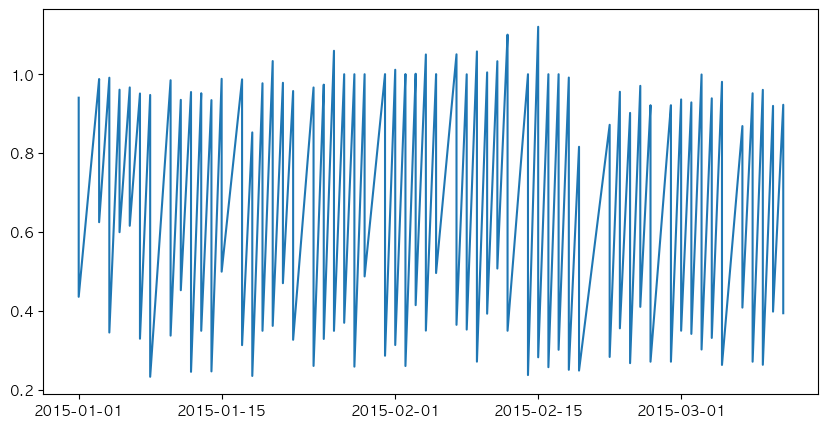

In [142]:
plt.plot( df['date'] , df['actual_productivity'])

plt.gcf().set_size_inches(10,5)
plt.show()

In [143]:
df.shape

(1197, 20)

# Data Modeling_Regressor

In [97]:
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVR, SVC
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score, recall_score, precision_recall_curve, precision_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import tensorflow as tf
import torch 





2024-06-09 17:12:33.822057: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
import tensorflow as tf
import torch
import torch.nn as nn

import shap

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
df

date   quarter  department  day  team  targeted_productivity  \
0    2015-01-01  Quarter1      sweing    1     8                   0.80   
1    2015-01-01  Quarter1  finishing     1     1                   0.75   
2    2015-01-01  Quarter1      sweing    1    11                   0.80   
3    2015-01-01  Quarter1      sweing    1    12                   0.80   
4    2015-01-01  Quarter1      sweing    1     6                   0.80   
...         ...       ...         ...  ...   ...                    ...   
1192 2015-03-11  Quarter2   finishing   11    10                   0.75   
1193 2015-03-11  Quarter2   finishing   11     8                   0.70   
1194 2015-03-11  Quarter2   finishing   11     7                   0.65   
1195 2015-03-11  Quarter2   finishing   11     9                   0.75   
1196 2015-03-11  Quarter2   finishing   11     6                   0.70   

        smv     wip  over_time  incentive  idle_time  idle_men  \
0     26.16  1108.0       7080         98        0.0         0   
1      3.94     NaN        960          0        0.0         0   
2     11.41   968.0       3660         50        0.0         0   
3     11.41   968.0       3660         50        0.0         0   
4     25.90  1170.0       1920         50        0.0         0   
...     ...     ...        ...        ...        ...       ...   
1192   2.90     NaN        960          0        0.0         0   
1193   3.90     NaN        960          0        0.0         0   
1194   3.90     NaN        960          0        0.0         0   
1195   2.90     NaN       1800          0        0.0         0   
1196   2.90     NaN        720          0        0.0         0   

      no_of_style_change  no_of_workers  actual_productivity  month  year  \
0                      0           59.0             0.940725      1  2015   
1                      0            8.0             0.886500      1  2015   
2                      0           30.5             0.800570      1  2015   
3                      0           30.5             0.800570      1  2015   
4                      0           56.0             0.800382      1  2015   
...                  ...            ...                  ...    ...   ...   
1192                   0            8.0             0.628333      3  2015   
1193                   0            8.0             0.625625      3  2015   
1194                   0            8.0             0.625625      3  2015   
1195                   0           15.0             0.505889      3  2015   
1196                   0            6.0             0.394722      3  2015   

      dayofweek yearmonth  success  
0             3    2015-1        0  
1             3    2015-1        0  
2             3    2015-1        0  
3             3    2015-1        0  
4             3    2015-1        0  
...         ...       ...      ...  
1192          2    2015-3        1  
1193          2    2015-3        1  
1194          2    2015-3        1  
1195          2    2015-3        1  
1196          2    2015-3        1  

[1197 rows x 20 columns]

In [ ]:
X = df.drop(['date', 'actual_productivity', 'success', 'year'], axis=1)
Y= df['actual_productivity']

In [ ]:
X['wip'] = X['wip'].fillna(X['wip'].mean())

In [ ]:
X['yearmonth'] = X['yearmonth'].astype(str).str.replace('-', '')

In [ ]:
X['yearmonth']  = X['yearmonth'].astype(float)

In [ ]:
X

quarter  department  day  team  targeted_productivity    smv  \
0     Quarter1      sweing    1     8                   0.80  26.16   
1     Quarter1  finishing     1     1                   0.75   3.94   
2     Quarter1      sweing    1    11                   0.80  11.41   
3     Quarter1      sweing    1    12                   0.80  11.41   
4     Quarter1      sweing    1     6                   0.80  25.90   
...        ...         ...  ...   ...                    ...    ...   
1192  Quarter2   finishing   11    10                   0.75   2.90   
1193  Quarter2   finishing   11     8                   0.70   3.90   
1194  Quarter2   finishing   11     7                   0.65   3.90   
1195  Quarter2   finishing   11     9                   0.75   2.90   
1196  Quarter2   finishing   11     6                   0.70   2.90   

              wip  over_time  incentive  idle_time  idle_men  \
0     1108.000000       7080         98        0.0         0   
1     1190.465991        960          0        0.0         0   
2      968.000000       3660         50        0.0         0   
3      968.000000       3660         50        0.0         0   
4     1170.000000       1920         50        0.0         0   
...           ...        ...        ...        ...       ...   
1192  1190.465991        960          0        0.0         0   
1193  1190.465991        960          0        0.0         0   
1194  1190.465991        960          0        0.0         0   
1195  1190.465991       1800          0        0.0         0   
1196  1190.465991        720          0        0.0         0   

      no_of_style_change  no_of_workers  month  dayofweek  yearmonth  
0                      0           59.0      1          3    20151.0  
1                      0            8.0      1          3    20151.0  
2                      0           30.5      1          3    20151.0  
3                      0           30.5      1          3    20151.0  
4                      0           56.0      1          3    20151.0  
...                  ...            ...    ...        ...        ...  
1192                   0            8.0      3          2    20153.0  
1193                   0            8.0      3          2    20153.0  
1194                   0            8.0      3          2    20153.0  
1195                   0           15.0      3          2    20153.0  
1196                   0            6.0      3          2    20153.0  

[1197 rows x 16 columns]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   int32  
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  month                  1197 non-null   int32  
 14  dayofweek              1197 non-null   int32  
 15  year

In [ ]:
Y

0       0.940725
1       0.886500
2       0.800570
3       0.800570
4       0.800382
          ...   
1192    0.628333
1193    0.625625
1194    0.625625
1195    0.505889
1196    0.394722
Name: actual_productivity, Length: 1197, dtype: float64

In [ ]:
categorical_list = []
numerical_list = []

for i in X.columns:
    if X[i].dtypes == 'O':
        categorical_list.append(i)
    else:
        numerical_list.append(i)

In [ ]:
categorical_list

['quarter', 'department']

In [ ]:
X['quarter'].value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

In [ ]:
pd.DataFrame(oh.fit_transform(X[['quarter']]).toarray(), columns=oh.get_feature_names_out(['quarter']))

NameError: name 'oh' is not defined

In [ ]:
pd.DataFrame(oh.fit_transform(X[['department']]).toarray(), columns=oh.get_feature_names_out(['department']))

department_finishing  department_finishing   department_sweing
0                      0.0                    0.0                1.0
1                      0.0                    1.0                0.0
2                      0.0                    0.0                1.0
3                      0.0                    0.0                1.0
4                      0.0                    0.0                1.0
...                    ...                    ...                ...
1192                   1.0                    0.0                0.0
1193                   1.0                    0.0                0.0
1194                   1.0                    0.0                0.0
1195                   1.0                    0.0                0.0
1196                   1.0                    0.0                0.0

[1197 rows x 3 columns]

In [ ]:
X.reset_index()

index   quarter  department  day  team  targeted_productivity    smv  \
0         0  Quarter1      sweing    1     8                   0.80  26.16   
1         1  Quarter1  finishing     1     1                   0.75   3.94   
2         2  Quarter1      sweing    1    11                   0.80  11.41   
3         3  Quarter1      sweing    1    12                   0.80  11.41   
4         4  Quarter1      sweing    1     6                   0.80  25.90   
...     ...       ...         ...  ...   ...                    ...    ...   
1192   1192  Quarter2   finishing   11    10                   0.75   2.90   
1193   1193  Quarter2   finishing   11     8                   0.70   3.90   
1194   1194  Quarter2   finishing   11     7                   0.65   3.90   
1195   1195  Quarter2   finishing   11     9                   0.75   2.90   
1196   1196  Quarter2   finishing   11     6                   0.70   2.90   

              wip  over_time  incentive  idle_time  idle_men  \
0     1108.000000       7080         98        0.0         0   
1     1190.465991        960          0        0.0         0   
2      968.000000       3660         50        0.0         0   
3      968.000000       3660         50        0.0         0   
4     1170.000000       1920         50        0.0         0   
...           ...        ...        ...        ...       ...   
1192  1190.465991        960          0        0.0         0   
1193  1190.465991        960          0        0.0         0   
1194  1190.465991        960          0        0.0         0   
1195  1190.465991       1800          0        0.0         0   
1196  1190.465991        720          0        0.0         0   

      no_of_style_change  no_of_workers  month  dayofweek  yearmonth  
0                      0           59.0      1          3    20151.0  
1                      0            8.0      1          3    20151.0  
2                      0           30.5      1          3    20151.0  
3                      0           30.5      1          3    20151.0  
4                      0           56.0      1          3    20151.0  
...                  ...            ...    ...        ...        ...  
1192                   0            8.0      3          2    20153.0  
1193                   0            8.0      3          2    20153.0  
1194                   0            8.0      3          2    20153.0  
1195                   0           15.0      3          2    20153.0  
1196                   0            6.0      3          2    20153.0  

[1197 rows x 17 columns]

In [ ]:
pd.concat([X.reset_index(drop=True), pd.DataFrame(oh.fit_transform(X[['department']]).toarray(), columns=oh.get_feature_names_out(['department'])).reset_index(drop=True)], axis=1)

quarter  department  day  team  targeted_productivity    smv  \
0     Quarter1      sweing    1     8                   0.80  26.16   
1     Quarter1  finishing     1     1                   0.75   3.94   
2     Quarter1      sweing    1    11                   0.80  11.41   
3     Quarter1      sweing    1    12                   0.80  11.41   
4     Quarter1      sweing    1     6                   0.80  25.90   
...        ...         ...  ...   ...                    ...    ...   
1192  Quarter2   finishing   11    10                   0.75   2.90   
1193  Quarter2   finishing   11     8                   0.70   3.90   
1194  Quarter2   finishing   11     7                   0.65   3.90   
1195  Quarter2   finishing   11     9                   0.75   2.90   
1196  Quarter2   finishing   11     6                   0.70   2.90   

              wip  over_time  incentive  idle_time  idle_men  \
0     1108.000000       7080         98        0.0         0   
1     1190.465991        960          0        0.0         0   
2      968.000000       3660         50        0.0         0   
3      968.000000       3660         50        0.0         0   
4     1170.000000       1920         50        0.0         0   
...           ...        ...        ...        ...       ...   
1192  1190.465991        960          0        0.0         0   
1193  1190.465991        960          0        0.0         0   
1194  1190.465991        960          0        0.0         0   
1195  1190.465991       1800          0        0.0         0   
1196  1190.465991        720          0        0.0         0   

      no_of_style_change  no_of_workers  month  dayofweek  yearmonth  \
0                      0           59.0      1          3    20151.0   
1                      0            8.0      1          3    20151.0   
2                      0           30.5      1          3    20151.0   
3                      0           30.5      1          3    20151.0   
4                      0           56.0      1          3    20151.0   
...                  ...            ...    ...        ...        ...   
1192                   0            8.0      3          2    20153.0   
1193                   0            8.0      3          2    20153.0   
1194                   0            8.0      3          2    20153.0   
1195                   0           15.0      3          2    20153.0   
1196                   0            6.0      3          2    20153.0   

      department_finishing  department_finishing   department_sweing  
0                      0.0                    0.0                1.0  
1                      0.0                    1.0                0.0  
2                      0.0                    0.0                1.0  
3                      0.0                    0.0                1.0  
4                      0.0                    0.0                1.0  
...                    ...                    ...                ...  
1192                   1.0                    0.0                0.0  
1193                   1.0                    0.0                0.0  
1194                   1.0                    0.0                0.0  
1195                   1.0                    0.0                0.0  
1196                   1.0                    0.0                0.0  

[1197 rows x 19 columns]

In [ ]:
oh = OneHotEncoder()
X_onehot = X.copy()


for i in X[categorical_list].columns:
    X_onehot = pd.concat([X_onehot.reset_index(drop=True), pd.DataFrame(oh.fit_transform(X_onehot[[i]]).toarray(), columns=oh.get_feature_names_out([i])).reset_index(drop=True)], axis=1)
    X_onehot.drop([i], axis=1, inplace=True)

In [ ]:
X

quarter  department  day  team  targeted_productivity    smv  \
0     Quarter1      sweing    1     8                   0.80  26.16   
1     Quarter1  finishing     1     1                   0.75   3.94   
2     Quarter1      sweing    1    11                   0.80  11.41   
3     Quarter1      sweing    1    12                   0.80  11.41   
4     Quarter1      sweing    1     6                   0.80  25.90   
...        ...         ...  ...   ...                    ...    ...   
1192  Quarter2   finishing   11    10                   0.75   2.90   
1193  Quarter2   finishing   11     8                   0.70   3.90   
1194  Quarter2   finishing   11     7                   0.65   3.90   
1195  Quarter2   finishing   11     9                   0.75   2.90   
1196  Quarter2   finishing   11     6                   0.70   2.90   

              wip  over_time  incentive  idle_time  idle_men  \
0     1108.000000       7080         98        0.0         0   
1     1190.465991        960          0        0.0         0   
2      968.000000       3660         50        0.0         0   
3      968.000000       3660         50        0.0         0   
4     1170.000000       1920         50        0.0         0   
...           ...        ...        ...        ...       ...   
1192  1190.465991        960          0        0.0         0   
1193  1190.465991        960          0        0.0         0   
1194  1190.465991        960          0        0.0         0   
1195  1190.465991       1800          0        0.0         0   
1196  1190.465991        720          0        0.0         0   

      no_of_style_change  no_of_workers  month  dayofweek  yearmonth  
0                      0           59.0      1          3    20151.0  
1                      0            8.0      1          3    20151.0  
2                      0           30.5      1          3    20151.0  
3                      0           30.5      1          3    20151.0  
4                      0           56.0      1          3    20151.0  
...                  ...            ...    ...        ...        ...  
1192                   0            8.0      3          2    20153.0  
1193                   0            8.0      3          2    20153.0  
1194                   0            8.0      3          2    20153.0  
1195                   0           15.0      3          2    20153.0  
1196                   0            6.0      3          2    20153.0  

[1197 rows x 16 columns]

In [ ]:
X_onehot

day  team  targeted_productivity    smv          wip  over_time  \
0       1     8                   0.80  26.16  1108.000000       7080   
1       1     1                   0.75   3.94  1190.465991        960   
2       1    11                   0.80  11.41   968.000000       3660   
3       1    12                   0.80  11.41   968.000000       3660   
4       1     6                   0.80  25.90  1170.000000       1920   
...   ...   ...                    ...    ...          ...        ...   
1192   11    10                   0.75   2.90  1190.465991        960   
1193   11     8                   0.70   3.90  1190.465991        960   
1194   11     7                   0.65   3.90  1190.465991        960   
1195   11     9                   0.75   2.90  1190.465991       1800   
1196   11     6                   0.70   2.90  1190.465991        720   

      incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0            98        0.0         0                   0           59.0   
1             0        0.0         0                   0            8.0   
2            50        0.0         0                   0           30.5   
3            50        0.0         0                   0           30.5   
4            50        0.0         0                   0           56.0   
...         ...        ...       ...                 ...            ...   
1192          0        0.0         0                   0            8.0   
1193          0        0.0         0                   0            8.0   
1194          0        0.0         0                   0            8.0   
1195          0        0.0         0                   0           15.0   
1196          0        0.0         0                   0            6.0   

      month  dayofweek  yearmonth  quarter_Quarter1  quarter_Quarter2  \
0         1          3    20151.0               1.0               0.0   
1         1          3    20151.0               1.0               0.0   
2         1          3    20151.0               1.0               0.0   
3         1          3    20151.0               1.0               0.0   
4         1          3    20151.0               1.0               0.0   
...     ...        ...        ...               ...               ...   
1192      3          2    20153.0               0.0               1.0   
1193      3          2    20153.0               0.0               1.0   
1194      3          2    20153.0               0.0               1.0   
1195      3          2    20153.0               0.0               1.0   
1196      3          2    20153.0               0.0               1.0   

      quarter_Quarter3  quarter_Quarter4  quarter_Quarter5  \
0                  0.0               0.0               0.0   
1                  0.0               0.0               0.0   
2                  0.0               0.0               0.0   
3                  0.0               0.0               0.0   
4                  0.0               0.0               0.0   
...                ...               ...               ...   
1192               0.0               0.0               0.0   
1193               0.0               0.0               0.0   
1194               0.0               0.0               0.0   
1195               0.0               0.0               0.0   
1196               0.0               0.0               0.0   

      department_finishing  department_finishing   department_sweing  
0                      0.0                    0.0                1.0  
1                      0.0                    1.0                0.0  
2                      0.0                    0.0                1.0  
3                      0.0                    0.0                1.0  
4                      0.0                    0.0                1.0  
...                    ...                    ...                ...  
1192                   1.0                    0.0                0.0  
1193                   1.0            

In [ ]:
X_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   day                    1197 non-null   int32  
 1   team                   1197 non-null   int64  
 2   targeted_productivity  1197 non-null   float64
 3   smv                    1197 non-null   float64
 4   wip                    1197 non-null   float64
 5   over_time              1197 non-null   int64  
 6   incentive              1197 non-null   int64  
 7   idle_time              1197 non-null   float64
 8   idle_men               1197 non-null   int64  
 9   no_of_style_change     1197 non-null   int64  
 10  no_of_workers          1197 non-null   float64
 11  month                  1197 non-null   int32  
 12  dayofweek              1197 non-null   int32  
 13  yearmonth              1197 non-null   float64
 14  quarter_Quarter1       1197 non-null   float64
 15  quar

In [ ]:
X_onehot_ols  =  sm.add_constant(X_onehot)



In [ ]:
X_onehot_ols

const  day  team  targeted_productivity    smv          wip  over_time  \
0       1.0    1     8                   0.80  26.16  1108.000000       7080   
1       1.0    1     1                   0.75   3.94  1190.465991        960   
2       1.0    1    11                   0.80  11.41   968.000000       3660   
3       1.0    1    12                   0.80  11.41   968.000000       3660   
4       1.0    1     6                   0.80  25.90  1170.000000       1920   
...     ...  ...   ...                    ...    ...          ...        ...   
1192    1.0   11    10                   0.75   2.90  1190.465991        960   
1193    1.0   11     8                   0.70   3.90  1190.465991        960   
1194    1.0   11     7                   0.65   3.90  1190.465991        960   
1195    1.0   11     9                   0.75   2.90  1190.465991       1800   
1196    1.0   11     6                   0.70   2.90  1190.465991        720   

      incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0            98        0.0         0                   0           59.0   
1             0        0.0         0                   0            8.0   
2            50        0.0         0                   0           30.5   
3            50        0.0         0                   0           30.5   
4            50        0.0         0                   0           56.0   
...         ...        ...       ...                 ...            ...   
1192          0        0.0         0                   0            8.0   
1193          0        0.0         0                   0            8.0   
1194          0        0.0         0                   0            8.0   
1195          0        0.0         0                   0           15.0   
1196          0        0.0         0                   0            6.0   

      month  dayofweek  yearmonth  quarter_Quarter1  quarter_Quarter2  \
0         1          3    20151.0               1.0               0.0   
1         1          3    20151.0               1.0               0.0   
2         1          3    20151.0               1.0               0.0   
3         1          3    20151.0               1.0               0.0   
4         1          3    20151.0               1.0               0.0   
...     ...        ...        ...               ...               ...   
1192      3          2    20153.0               0.0               1.0   
1193      3          2    20153.0               0.0               1.0   
1194      3          2    20153.0               0.0               1.0   
1195      3          2    20153.0               0.0               1.0   
1196      3          2    20153.0               0.0               1.0   

      quarter_Quarter3  quarter_Quarter4  quarter_Quarter5  \
0                  0.0               0.0               0.0   
1                  0.0               0.0               0.0   
2                  0.0               0.0               0.0   
3                  0.0               0.0               0.0   
4                  0.0               0.0               0.0   
...                ...               ...               ...   
1192               0.0               0.0               0.0   
1193               0.0               0.0               0.0   
1194               0.0               0.0               0.0   
1195               0.0               0.0               0.0   
1196               0.0               0.0               0.0   

      department_finishing  department_finishing   department_sweing  
0                      0.0                    0.0                1.0  
1                      0.0                    1.0                0.0  
2                      0.0                    0.0                1.0  
3                      0.0                    0.0                1.0  
4                      0.0                    0.0                1.0  
...                    ...                    ...                ...  
1192                   1.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_onehot, Y, test_size=0.4)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(718, 22)
(479, 22)
(718,)
(479,)


In [ ]:
model = sm.OLS(Y,X_onehot_ols)
result = model.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     actual_productivity   R-squared:                       0.303
Model:                             OLS   Adj. R-squared:                  0.292
Method:                  Least Squares   F-statistic:                     26.91
Date:                 Sat, 01 Jun 2024   Prob (F-statistic):           7.92e-79
Time:                         16:53:12   Log-Likelihood:                 607.78
No. Observations:                 1197   AIC:                            -1176.
Df Residuals:                     1177   BIC:                            -1074.
Df Model:                           19                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.378e-08   4.44e-07     -0.099      0.921   -9.15e-07    8.27e-07
day                       0.0022      0.002      0.940      0.348      -0.002       0.007
team                     -0.0081      0.001     -6.168      0.000      -0.011      -0.005
targeted_productivity     0.7036      0.045     15.613      0.000       0.615       0.792
smv                      -0.0068      0.001     -7.027      0.000      -0.009      -0.005
wip                    4.774e-06   3.11e-06      1.534      0.125   -1.33e-06    1.09e-05
over_time             -4.042e-06   2.14e-06     -1.889      0.059   -8.24e-06    1.56e-07
incentive              6.037e-05   2.73e-05      2.214      0.027    6.87e-06       0.000
idle_time                 0.0004      0.000      0.962      0.336      -0.000       0.001
idle_men                 -0.0084      0.002     -5.191      0.000      -0.012      -0.005
no_of_style_change       -0.0416      0.012     -3.371      0.001      -0.066      -0.017
no_of_workers             0.0046      0.001      6.356      0.000       0.003       0.006
month                     0.0009      0.009      0.100      0.920      -0.017       0.018
dayofweek                -0.0004      0.002     -0.202      0.840      -0.005       0.004
yearmonth              1.093e-05   3.17e-06      3.447      0.001    4.71e-06    1.72e-05
quarter_Quarter1          0.0169      0.032      0.523      0.601      -0.047       0.080
quarter_Quarter2          0.0070      0.018      0.389      0.697      -0.028       0.042
quarter_Quarter3         -0.0262      0.010     -2.638      0.008      -0.046      -0.007
quarter_Quarter4         -0.0376      0.020     -1.889      0.059      -0.077       0.001
quarter_Quarter5          0.0399      0.035      1.152      0.250      -0.028       0.108
department_finishing     -0.0081      0.012     -0.667      0.505      -0.032       0.016
department_finishing      0.0408      0.012      3.280      0.001       0.016       0.065
department_sweing        -0.0327      0.018     -1.839      0.066      -0.068       0.002
==============================================================================
Omnibus:                      135.923   Durbin-Watson:                   1.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.649
Skew:                          -0.750   Prob(JB):                     6.75e-52
Kurtosis:                       4.574   Cond. No.                     8.94e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.42e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
result.params, result.pvalues

(const                   -4.378422e-08
 day                      2.218850e-03
 team                    -8.065288e-03
 targeted_productivity    7.035687e-01
 smv                     -6.818999e-03
 wip                      4.773883e-06
 over_time               -4.042045e-06
 incentive                6.037085e-05
 idle_time                3.933052e-04
 idle_men                -8.393656e-03
 no_of_style_change      -4.164659e-02
 no_of_workers            4.648680e-03
 month                    8.931819e-04
 dayofweek               -4.224707e-04
 yearmonth                1.092990e-05
 quarter_Quarter1         1.692232e-02
 quarter_Quarter2         7.005866e-03
 quarter_Quarter3        -2.622160e-02
 quarter_Quarter4        -3.764322e-02
 quarter_Quarter5         3.993659e-02
 department_finishing    -8.121857e-03
 department_finishing     4.084822e-02
 department_sweing       -3.272641e-02
 dtype: float64,
 const                    9.214313e-01
 day                      3.475999e-01
 team   

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
x_train

day  team  targeted_productivity    smv          wip  over_time  \
1015    2     6                   0.75  18.79   947.000000       2880   
1119    8     9                   0.75  18.79  1239.000000       5640   
220    13     9                   0.80   3.94  1190.465991       1440   
666     8     6                   0.75  18.79   670.000000       3960   
372    22    10                   0.75   3.94  1190.465991       8400   
...   ...   ...                    ...    ...          ...        ...   
58      4     7                   0.80   2.90  1190.465991        960   
195    12     3                   0.80   4.15  1190.465991       1800   
366    21     8                   0.80   2.90  1190.465991       2400   
21      3     9                   0.80   4.15  1190.465991        960   
545     1     1                   0.75   3.94  1190.465991       2280   

      incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
1015         34        0.0         0                   0           33.0   
1119         45        0.0         0                   0           52.0   
220           0        0.0         0                   0            8.0   
666          34        0.0         0                   0           33.0   
372           0        0.0         0                   0           14.0   
...         ...        ...       ...                 ...            ...   
58            0        0.0         0                   0            8.0   
195           0        0.0         0                   0           10.0   
366           0        0.0         0                   0            8.0   
21            0        0.0         0                   0            8.0   
545           0        0.0         0                   0           19.0   

      month  dayofweek  yearmonth  quarter_Quarter1  quarter_Quarter2  \
1015      3          0    20153.0               1.0               0.0   
1119      3          6    20153.0               0.0               1.0   
220       1          1    20151.0               0.0               1.0   
666       2          6    20152.0               0.0               1.0   
372       1          3    20151.0               0.0               0.0   
...     ...        ...        ...               ...               ...   
58        1          6    20151.0               1.0               0.0   
195       1          0    20151.0               0.0               1.0   
366       1          2    20151.0               0.0               0.0   
21        1          5    20151.0               1.0               0.0   
545       2          6    20152.0               1.0               0.0   

      quarter_Quarter3  quarter_Quarter4  quarter_Quarter5  \
1015               0.0               0.0               0.0   
1119               0.0               0.0               0.0   
220                0.0               0.0               0.0   
666                0.0               0.0               0.0   
372                0.0               1.0               0.0   
...                ...               ...               ...   
58                 0.0               0.0               0.0   
195                0.0               0.0               0.0   
366                1.0               0.0               0.0   
21                 0.0               0.0               0.0   
545                0.0               0.0               0.0   

      department_finishing  department_finishing   department_sweing  
1015                   0.0                    0.0                1.0  
1119                   0.0                    0.0                1.0  
220                    0.0                    1.0                0.0  
666                    0.0                    0.0                1.0  
372                    0.0                    1.0                0.0  
...                    ...                    ...                ...  
58                     0.0                    1.0                0.0  
195                    0.0            

r2_score
0.9295257362025082
0.4293348817869107
mae
0.028211935308732585
0.08548156837386221
mse
0.002205688186660393
0.01660862151869236
rmse
0.04696475472799142
0.12887444090545014
mape
0.051345558870748154
0.14546547991396291
mae
-1.6133008458410647
-3.3607589715599384


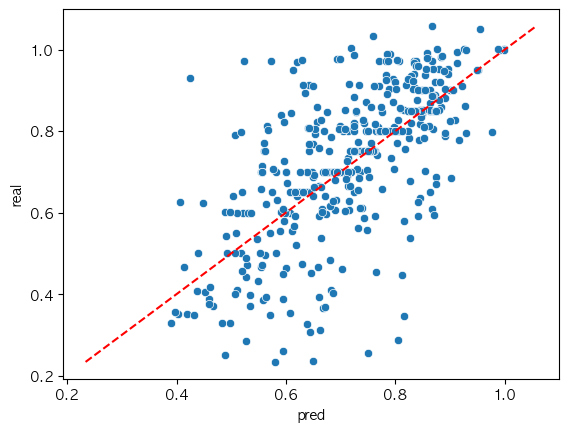

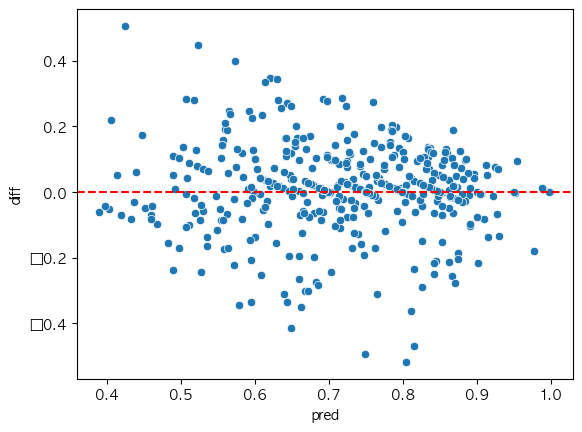

targeted_productivity    0.269342
incentive                0.110754
day                      0.101199
smv                      0.095984
no_of_workers            0.084427
over_time                0.075235
team                     0.073259
dayofweek                0.053245
wip                      0.035002
department_finishing     0.018901
quarter_Quarter3         0.011657
quarter_Quarter2         0.011302
department_finishing     0.009960
quarter_Quarter4         0.009180
month                    0.008546
yearmonth                0.007593
department_sweing        0.006871
quarter_Quarter5         0.004646
quarter_Quarter1         0.004561
idle_men                 0.004292
no_of_style_change       0.002163
idle_time                0.001880
dtype: float64


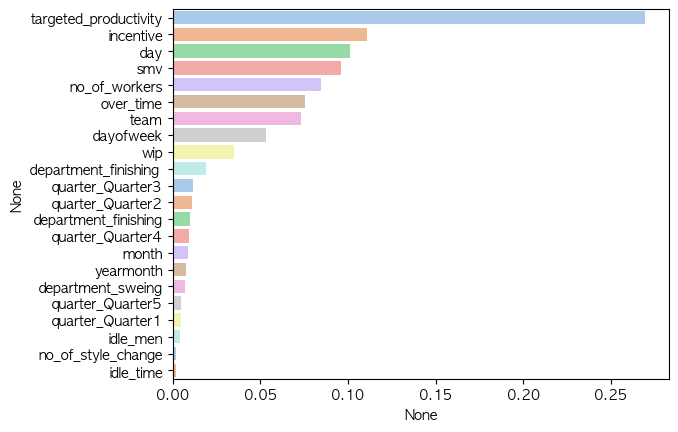

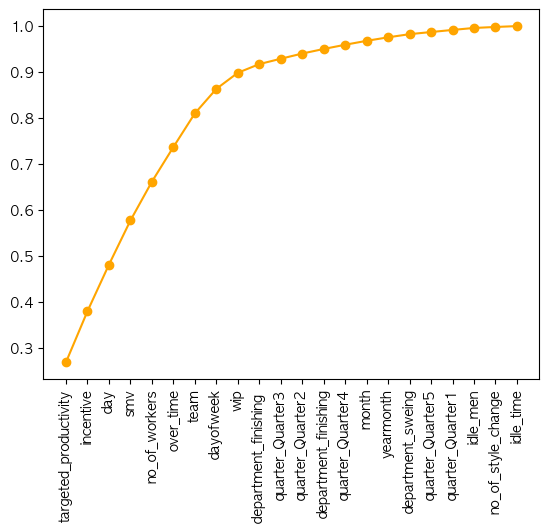

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

y_pred_train =  rfr.predict(x_train)
y_pred_test =  rfr.predict(x_test)

print('r2_score')
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

print('mae')
print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))

print('mse')
print(mean_squared_error(y_train, y_pred_train))
print(mean_squared_error(y_test, y_pred_test))

print('rmse')
print(np.sqrt(mean_squared_error(y_train, y_pred_train)))
print(np.sqrt(mean_squared_error(y_test, y_pred_test)))


print('mape')
print(mean_absolute_percentage_error(y_train, y_pred_train))
print(mean_absolute_percentage_error(y_test, y_pred_test))

# MPE 계산 함수 정의
def mean_percentage_error(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true) * 100

print('mae')
print(mean_percentage_error(y_train, y_pred_train))
print(mean_percentage_error(y_test, y_pred_test))


result = pd.DataFrame({'real': y_test, 'pred' : y_pred_test})
result['diff'] = result['real'] - result['pred']

sns.scatterplot(data=result, x='pred', y='real')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

sns.scatterplot(data=result, x='pred', y='diff')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


top20 = pd.Series(rfr.feature_importances_, index=x_train.columns)
top20 = top20.sort_values(ascending=False)
print(top20)

sns.barplot(y=top20.index, x=top20, palette = 'pastel')
plt.show()


plt.plot(top20.index, top20.cumsum(), marker='o', color='orange')
plt.xticks(rotation=90)
plt.show()

In [ ]:
        # MPE 계산 함수 정의
def mean_percentage_error(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true) * 100

In [ ]:


def model_check(model, X, Y):
    try:
        x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)
        model.fit(x_train, y_train)

        y_pred_train =  model.predict(x_train)
        y_pred_test =  model.predict(x_test)

        print('r2_score')
        print(r2_score(y_train, y_pred_train))
        print(r2_score(y_test, y_pred_test))

        print('mae')
        print(mean_absolute_error(y_train, y_pred_train))
        print(mean_absolute_error(y_test, y_pred_test))

        print('mse')
        print(mean_squared_error(y_train, y_pred_train))
        print(mean_squared_error(y_test, y_pred_test))

        print('rmse')
        print(np.sqrt(mean_squared_error(y_train, y_pred_train)))
        print(np.sqrt(mean_squared_error(y_test, y_pred_test)))


        print('mape')
        print(mean_absolute_percentage_error(y_train, y_pred_train))
        print(mean_absolute_percentage_error(y_test, y_pred_test))


        print('mpe')
        print(mean_percentage_error(y_train, y_pred_train))
        print(mean_percentage_error(y_test, y_pred_test))


        result = pd.DataFrame({'real': y_test, 'pred' : y_pred_test})
        result['diff'] = result['real'] - result['pred']

        sns.scatterplot(data=result, x='pred', y='real')
        plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color='red', linestyle='--')
        plt.show()

        sns.scatterplot(data=result, x='pred', y='diff')
        plt.axhline(y=0, color='red', linestyle='--')
        plt.show()


        top20 = pd.Series(model.feature_importances_, index=x_train.columns)
        top20 = top20.sort_values(ascending=False)
        print(top20)

        sns.barplot(y=top20.index, x=top20, palette = 'pastel')
        plt.show()


        plt.plot(top20.index, top20.cumsum(), marker='o', color='orange')
        plt.xticks(rotation=90)
        plt.show()      
    except Exception as e:
        print(e)
        pass

r2_score
0.9190718853054572
0.4914680698080991
mae
0.030323972251075706
0.07953776704245365
mse
0.0024643746653597734
0.01691505273097846
rmse
0.04964246836489674
0.13005788223317516
mape
0.055102260012835226
0.15635501250731512
mpe
-1.7766607791366715
-7.004261555834253


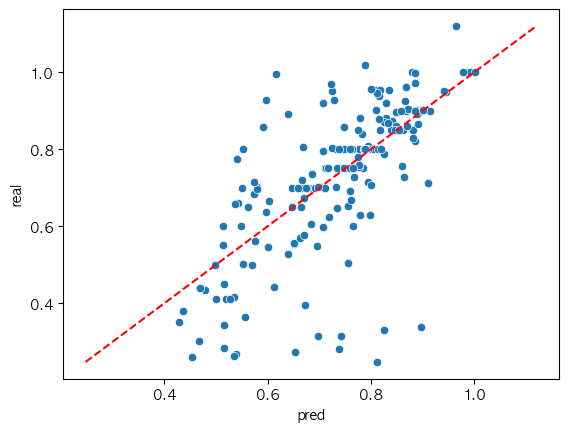

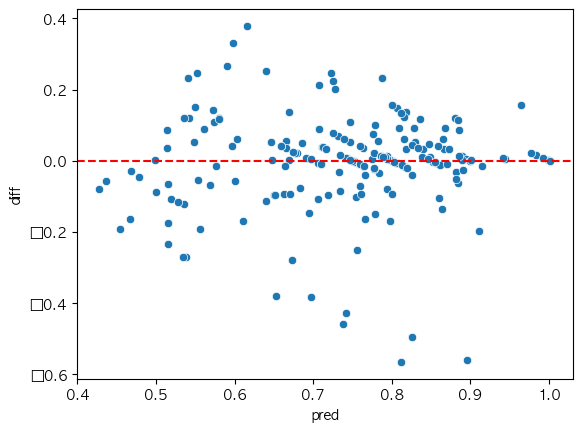

targeted_productivity    0.233712
incentive                0.105765
smv                      0.101511
day                      0.092851
team                     0.088188
no_of_workers            0.087555
over_time                0.078717
dayofweek                0.052905
wip                      0.043866
department_finishing     0.028427
quarter_Quarter2         0.014641
quarter_Quarter4         0.013201
quarter_Quarter3         0.011883
month                    0.009387
department_finishing     0.008473
yearmonth                0.007767
department_sweing        0.005436
quarter_Quarter5         0.003732
idle_time                0.003365
no_of_style_change       0.002985
quarter_Quarter1         0.002933
idle_men                 0.002699
dtype: float64


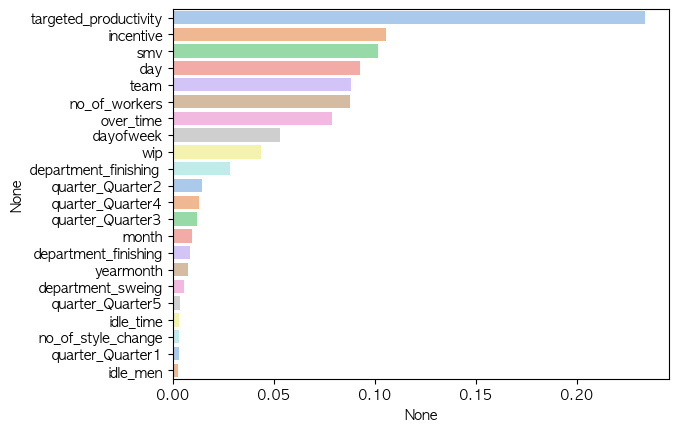

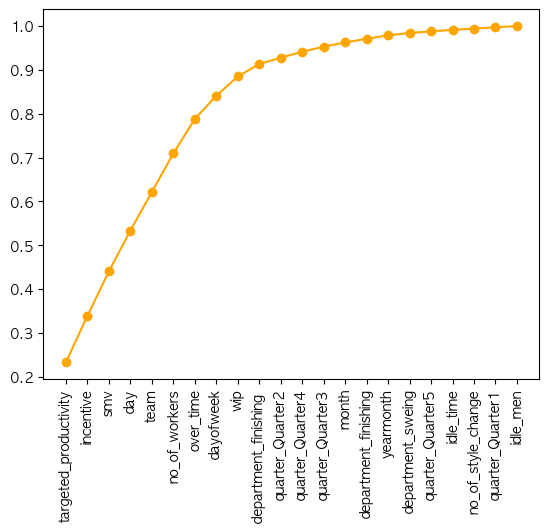

In [ ]:
model_check(rfr, x_train, y_train)

In [ ]:
X

quarter  department  day  team  targeted_productivity    smv  \
0     Quarter1      sweing    1     8                   0.80  26.16   
1     Quarter1  finishing     1     1                   0.75   3.94   
2     Quarter1      sweing    1    11                   0.80  11.41   
3     Quarter1      sweing    1    12                   0.80  11.41   
4     Quarter1      sweing    1     6                   0.80  25.90   
...        ...         ...  ...   ...                    ...    ...   
1192  Quarter2   finishing   11    10                   0.75   2.90   
1193  Quarter2   finishing   11     8                   0.70   3.90   
1194  Quarter2   finishing   11     7                   0.65   3.90   
1195  Quarter2   finishing   11     9                   0.75   2.90   
1196  Quarter2   finishing   11     6                   0.70   2.90   

              wip  over_time  incentive  idle_time  idle_men  \
0     1108.000000       7080         98        0.0         0   
1     1190.465991        960          0        0.0         0   
2      968.000000       3660         50        0.0         0   
3      968.000000       3660         50        0.0         0   
4     1170.000000       1920         50        0.0         0   
...           ...        ...        ...        ...       ...   
1192  1190.465991        960          0        0.0         0   
1193  1190.465991        960          0        0.0         0   
1194  1190.465991        960          0        0.0         0   
1195  1190.465991       1800          0        0.0         0   
1196  1190.465991        720          0        0.0         0   

      no_of_style_change  no_of_workers  month  dayofweek  yearmonth  
0                      0           59.0      1          3    20151.0  
1                      0            8.0      1          3    20151.0  
2                      0           30.5      1          3    20151.0  
3                      0           30.5      1          3    20151.0  
4                      0           56.0      1          3    20151.0  
...                  ...            ...    ...        ...        ...  
1192                   0            8.0      3          2    20153.0  
1193                   0            8.0      3          2    20153.0  
1194                   0            8.0      3          2    20153.0  
1195                   0           15.0      3          2    20153.0  
1196                   0            6.0      3          2    20153.0  

[1197 rows x 16 columns]

In [ ]:
categorical_list

['quarter', 'department']

In [ ]:
le = LabelEncoder()

In [ ]:
X_le = X.copy()


for i in categorical_list:
    X_le[i] = le.fit_transform(X[i])

In [ ]:
x_train_le, x_test_le, y_train_le, y_test_le = train_test_split(X_le, Y, test_size=0.4)

In [ ]:
y_train_le

1129    0.902963
130     0.850502
1181    0.786632
959     0.410833
549     0.886500
          ...   
429     0.700542
646     0.771583
833     0.734646
925     0.899556
625     0.847100
Name: actual_productivity, Length: 718, dtype: float64

In [ ]:
rfr.fit(x_train_le, y_train_le)



RandomForestRegressor()

r2_score
0.9376225044929972
0.3646627479444188
mae
0.02708032438103945
0.08303168014822218
mse
0.0019189386922544552
0.018821060479929243
rmse
0.043805692464044615
0.13718987017972298
mape
0.0483531074376822
0.1561151377403567
mpe
-1.5320518632370252
-5.8853586690729705


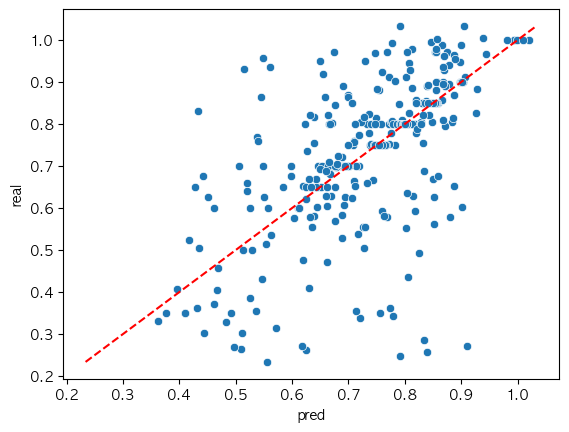

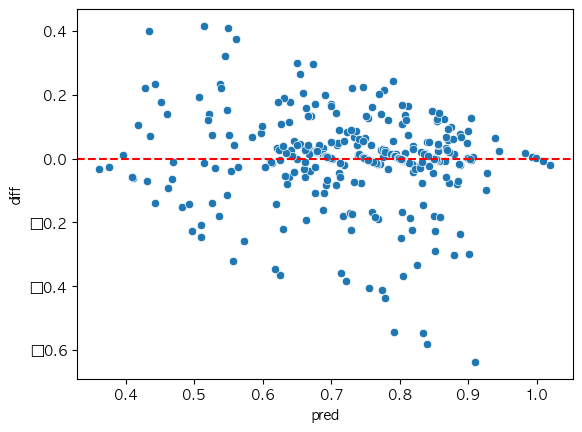

targeted_productivity    0.216172
smv                      0.127900
incentive                0.121254
no_of_workers            0.091632
team                     0.085253
day                      0.081673
over_time                0.070345
dayofweek                0.046520
wip                      0.035827
department_finishing     0.029151
quarter_Quarter4         0.016836
idle_men                 0.014266
department_finishing     0.011300
quarter_Quarter3         0.011049
yearmonth                0.008123
quarter_Quarter2         0.007909
month                    0.007380
quarter_Quarter1         0.006045
idle_time                0.004528
department_sweing        0.003129
no_of_style_change       0.002363
quarter_Quarter5         0.001344
dtype: float64


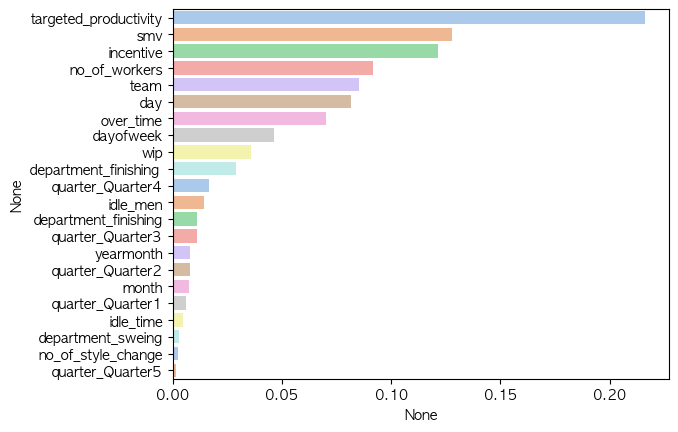

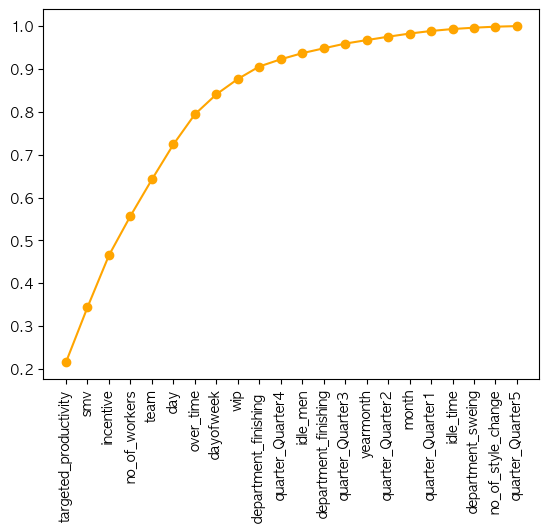

In [ ]:
model_check(rfr, X_onehot, Y)

In [13]:
model_check(rfr, X_le, Y)

NameError: name 'model_check' is not defined

In [14]:
import xgboost as xgb
import lightgbm as lgb

In [15]:
xgb_r = xgb.XGBRegressor()

In [16]:
lgb_r = lgb.LGBMRegressor()

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid = {
    'n_estimators' : [100, 200,400,600,800],
    'max_depth' : [2,4,6,8]
}



grid = GridSearchCV(rfr, param_grid = param_grid, cv=5, scoring='neg_mean_absolute_error')


# grid.fit(x_train, y_train)

NameError: name 'rfr' is not defined

In [ ]:
# print(grid.best_params_)
# print(grid.best_score_)
# print(grid.best_estimator_)

In [ ]:
model_check(xgb_r, X_onehot, Y)

NameError: name 'xgb_r' is not defined

In [ ]:
# model_check(lgb_r, X_onehot, Y)

: 

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
lr = LinearRegression()

r2_score
0.2840257920501742
0.33206386226833706
mae
0.1114083044350936
0.09659294058773328
mse
0.0228507115069139
0.01790948602561625
rmse
0.15116451801568348
0.13382632784925488
mape
0.1966496870646539
0.15951670794904999
mpe
-6.85807113008544
-3.497728401914238


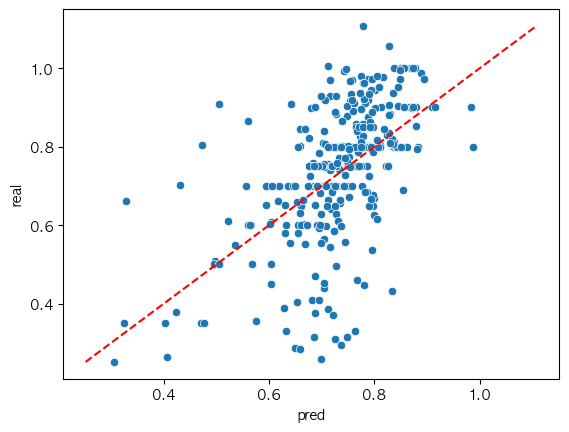

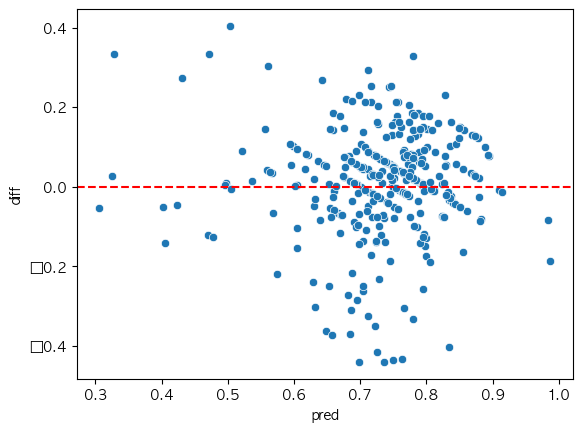

'LinearRegression' object has no attribute 'feature_importances_'


In [ ]:
model_check(lr, X_onehot, Y)

In [ ]:
svm_r = SVR()

r2_score
0.025587746182827664
0.012772462915713101
mae
0.13010509315031654
0.1392696350776606
mse
0.028425614179501388
0.03289644454102658
rmse
0.1685989744319383
0.1813737702674413
mape
0.22897236332688625
0.2619263957840995
mpe
-9.05120744856837
-11.422762471861848


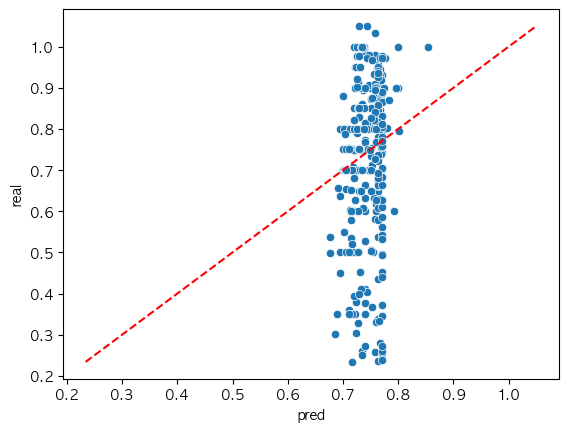

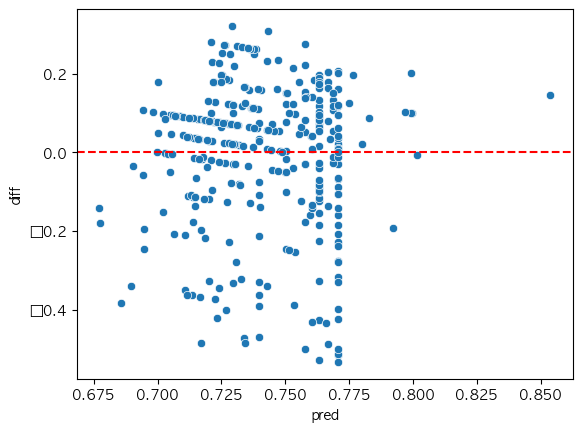

'SVR' object has no attribute 'feature_importances_'


In [ ]:
model_check(svm_r, X_onehot, Y)

r2_score
0.39193615047112573
0.17304343777226372
mae
0.09992560992568698
0.11601214970888887
mse
0.018871113681054184
0.023967548992961853
rmse
0.13737217214943565
0.15481456324571619
mape
0.1795935213689318
0.1979638551901746
mpe
-7.1042649926606884
-6.598901258856434


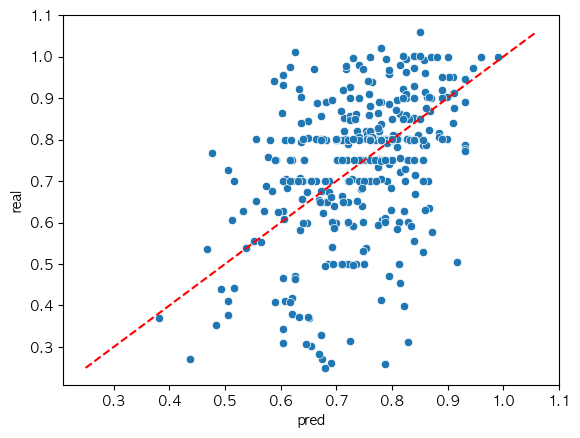

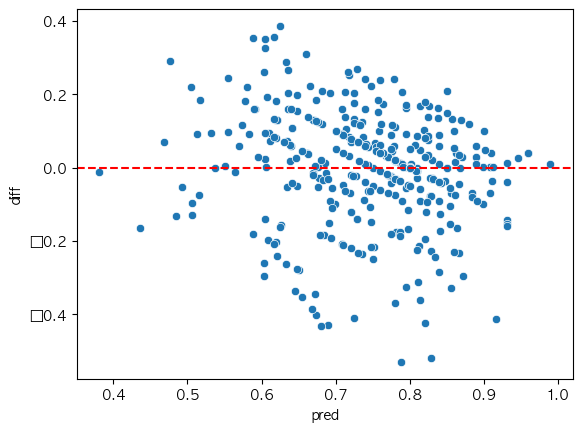

'KNeighborsRegressor' object has no attribute 'feature_importances_'


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model_check(model, X_onehot, Y)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_r = GradientBoostingRegressor()


model_check(gb_r, X_onehot, Y)

NameError: name 'model_check' is not defined

r2_score
0.287155978977917
0.30445854819004925
mae
0.10384967350150463
0.11218917816553148
mse
0.02068761013778083
0.023072054657358274
rmse
0.1438318815067815
0.15189488028685585
mape
0.18087560670092026
0.2057400102730371
mpe
-6.243241585401046
-9.198234150304673


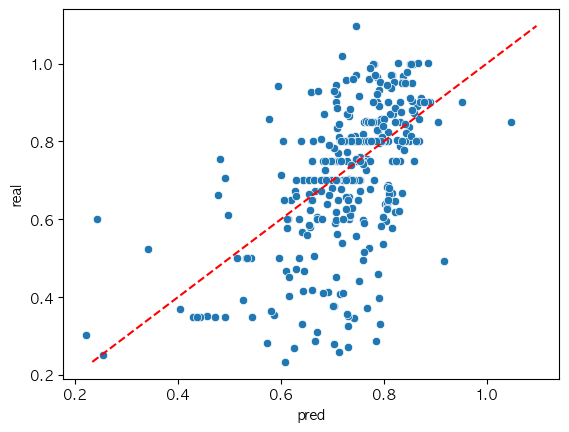

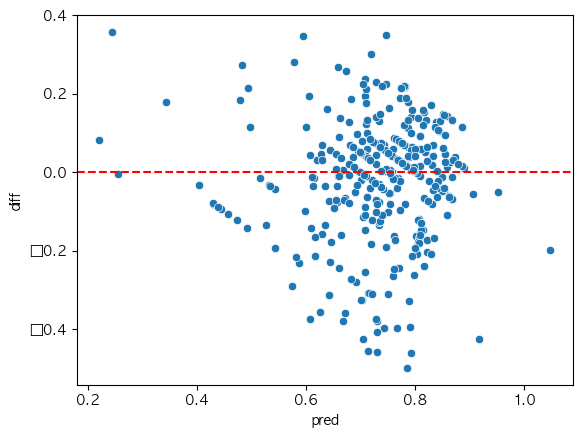

'BayesianRidge' object has no attribute 'feature_importances_'


In [ ]:
from sklearn.linear_model import BayesianRidge
bayes_r = BayesianRidge()

model_check(bayes_r, X_onehot, Y)

In [ ]:
tf_r = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_dim=x_train.shape[1]),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])


tf_r.compile(loss='mean_absolute_error', optimizer='adam')

tf_r.fit(x_train, y_train, batch_size=16, epochs=500, validation_data=[x_train,y_train], verbose=0)


y_pred_train  = tf_r.predict(x_train).flatten()
y_pred_test  = tf_r.predict(x_test).flatten()


print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step
-0.07436409392837429
-22.08441505792572


In [ ]:
tf_r.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=[x_test,y_test], verbose=0)
y_pred_test = tf_r.predict(x_test).flatten()
print(r2_score(y_test, y_pred_test))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step
-8354.06301234771


In [ ]:
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

-14833.405812160785
-32925.09046738318


In [ ]:
model_check(tf_r, X_onehot, Y)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 10.4827
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
r2_score
-3302.6366825072455
-3585.3257635246123
mae
6.684693987988535
6.782138305765451
mse
99.49051823971158
111.46072272318771
rmse
9.974493382609042
10.557496044194746
mape
9.967067761540202
10.151978093658702
mpe
Data must be 1-dimensional, got ndarray of shape (837, 837) instead


In [ ]:
model_comparing = pd.DataFrame(columns=['model', 'r2_score', 'mae'])
model_comparing

Empty DataFrame
Columns: [model, r2_score, mae]
Index: []

In [ ]:
tf_r.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=[x_test,y_test], verbose=0)
y_pred_test = model.predict(x_test).flatten()
print(r2_score(y_test, y_pred_test))

0.6465199497330041


In [ ]:
models = [lr, rfr, xgb_r, lgb_r, gb_r, svm_r, bayes_r, tf_r]

result = []
for i in models:
    if i == tf_r:
        i.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=[x_test,y_test], verbose=0)
        y_pred_test = i.predict(x_test).flatten()

    else:
        i.fit(x_train, y_train)
        y_pred_test = i.predict(x_test)

    result.append({
        'model': i.__class__.__name__,
        'r2_score' : r2_score(y_test, y_pred_test),
        'mae' : mean_absolute_error(y_test, y_pred_test),
        'mse' : mean_absolute_error(y_test, y_pred_test),
        'rmse' : np.sqrt(mean_absolute_error(y_test, y_pred_test)),
        'mape' : mean_absolute_percentage_error(y_test, y_pred_test),
        'mpe' : mean_percentage_error(y_test, y_pred_test),
    })



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 501
[LightGBM] [Info] Number of data points in the train set: 718, number of used features: 20
[LightGBM] [Info] Start training from score 0.735775
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [ ]:
models_comparing = pd.DataFrame(result)


In [ ]:
models_comparing.sort_values(by = 'r2_score', ascending=False)

model    r2_score       mae       mse      rmse  \
4  GradientBoostingRegressor    0.467940  0.085942  0.085942  0.293159   
3              LGBMRegressor    0.446540  0.086451  0.086451  0.294026   
1      RandomForestRegressor    0.428101  0.085732  0.085732  0.292800   
2               XGBRegressor    0.361225  0.087929  0.087929  0.296528   
6              BayesianRidge    0.272163  0.109170  0.109170  0.330408   
0           LinearRegression    0.267627  0.108149  0.108149  0.328860   
5                        SVR    0.002787  0.131668  0.131668  0.362860   
7                 Sequential -978.050012  3.702118  3.702118  1.924089   

       mape         mpe  
4  0.147061   -3.775578  
3  0.148200   -4.001316  
1  0.146058   -3.547686  
2  0.150068   -3.915397  
6  0.184597   -5.413020  
0  0.182258   -5.230293  
5  0.233115   -9.427444  
7  5.634687 -511.145141

In [ ]:
models_comparing.sort_values(by = 'mae', ascending=True)

model    r2_score       mae       mse      rmse  \
1      RandomForestRegressor    0.428101  0.085732  0.085732  0.292800   
4  GradientBoostingRegressor    0.467940  0.085942  0.085942  0.293159   
3              LGBMRegressor    0.446540  0.086451  0.086451  0.294026   
2               XGBRegressor    0.361225  0.087929  0.087929  0.296528   
0           LinearRegression    0.267627  0.108149  0.108149  0.328860   
6              BayesianRidge    0.272163  0.109170  0.109170  0.330408   
5                        SVR    0.002787  0.131668  0.131668  0.362860   
7                 Sequential -978.050012  3.702118  3.702118  1.924089   

       mape         mpe  
1  0.146058   -3.547686  
4  0.147061   -3.775578  
3  0.148200   -4.001316  
2  0.150068   -3.915397  
0  0.182258   -5.230293  
6  0.184597   -5.413020  
5  0.233115   -9.427444  
7  5.634687 -511.145141

In [ ]:
models_comparing.sort_values(by = 'mse', ascending=True)

model    r2_score       mae       mse      rmse  \
1      RandomForestRegressor    0.428101  0.085732  0.085732  0.292800   
4  GradientBoostingRegressor    0.467940  0.085942  0.085942  0.293159   
3              LGBMRegressor    0.446540  0.086451  0.086451  0.294026   
2               XGBRegressor    0.361225  0.087929  0.087929  0.296528   
0           LinearRegression    0.267627  0.108149  0.108149  0.328860   
6              BayesianRidge    0.272163  0.109170  0.109170  0.330408   
5                        SVR    0.002787  0.131668  0.131668  0.362860   
7                 Sequential -978.050012  3.702118  3.702118  1.924089   

       mape         mpe  
1  0.146058   -3.547686  
4  0.147061   -3.775578  
3  0.148200   -4.001316  
2  0.150068   -3.915397  
0  0.182258   -5.230293  
6  0.184597   -5.413020  
5  0.233115   -9.427444  
7  5.634687 -511.145141

In [ ]:
models_comparing.sort_values(by = 'rmse', ascending=True)

model    r2_score       mae       mse      rmse  \
1      RandomForestRegressor    0.428101  0.085732  0.085732  0.292800   
4  GradientBoostingRegressor    0.467940  0.085942  0.085942  0.293159   
3              LGBMRegressor    0.446540  0.086451  0.086451  0.294026   
2               XGBRegressor    0.361225  0.087929  0.087929  0.296528   
0           LinearRegression    0.267627  0.108149  0.108149  0.328860   
6              BayesianRidge    0.272163  0.109170  0.109170  0.330408   
5                        SVR    0.002787  0.131668  0.131668  0.362860   
7                 Sequential -978.050012  3.702118  3.702118  1.924089   

       mape         mpe  
1  0.146058   -3.547686  
4  0.147061   -3.775578  
3  0.148200   -4.001316  
2  0.150068   -3.915397  
0  0.182258   -5.230293  
6  0.184597   -5.413020  
5  0.233115   -9.427444  
7  5.634687 -511.145141

In [ ]:
models_comparing.sort_values(by = 'mape', ascending=True)

model    r2_score       mae       mse      rmse  \
1      RandomForestRegressor    0.428101  0.085732  0.085732  0.292800   
4  GradientBoostingRegressor    0.467940  0.085942  0.085942  0.293159   
3              LGBMRegressor    0.446540  0.086451  0.086451  0.294026   
2               XGBRegressor    0.361225  0.087929  0.087929  0.296528   
0           LinearRegression    0.267627  0.108149  0.108149  0.328860   
6              BayesianRidge    0.272163  0.109170  0.109170  0.330408   
5                        SVR    0.002787  0.131668  0.131668  0.362860   
7                 Sequential -978.050012  3.702118  3.702118  1.924089   

       mape         mpe  
1  0.146058   -3.547686  
4  0.147061   -3.775578  
3  0.148200   -4.001316  
2  0.150068   -3.915397  
0  0.182258   -5.230293  
6  0.184597   -5.413020  
5  0.233115   -9.427444  
7  5.634687 -511.145141

In [ ]:
models_comparing.sort_values(by = 'mpe', ascending=False)

model    r2_score       mae       mse      rmse  \
1      RandomForestRegressor    0.428101  0.085732  0.085732  0.292800   
4  GradientBoostingRegressor    0.467940  0.085942  0.085942  0.293159   
2               XGBRegressor    0.361225  0.087929  0.087929  0.296528   
3              LGBMRegressor    0.446540  0.086451  0.086451  0.294026   
0           LinearRegression    0.267627  0.108149  0.108149  0.328860   
6              BayesianRidge    0.272163  0.109170  0.109170  0.330408   
5                        SVR    0.002787  0.131668  0.131668  0.362860   
7                 Sequential -978.050012  3.702118  3.702118  1.924089   

       mape         mpe  
1  0.146058   -3.547686  
4  0.147061   -3.775578  
2  0.150068   -3.915397  
3  0.148200   -4.001316  
0  0.182258   -5.230293  
6  0.184597   -5.413020  
5  0.233115   -9.427444  
7  5.634687 -511.145141

# Shap Values

In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(gb_r, x_train)
shap_values = explainer.shap_values(x_train)

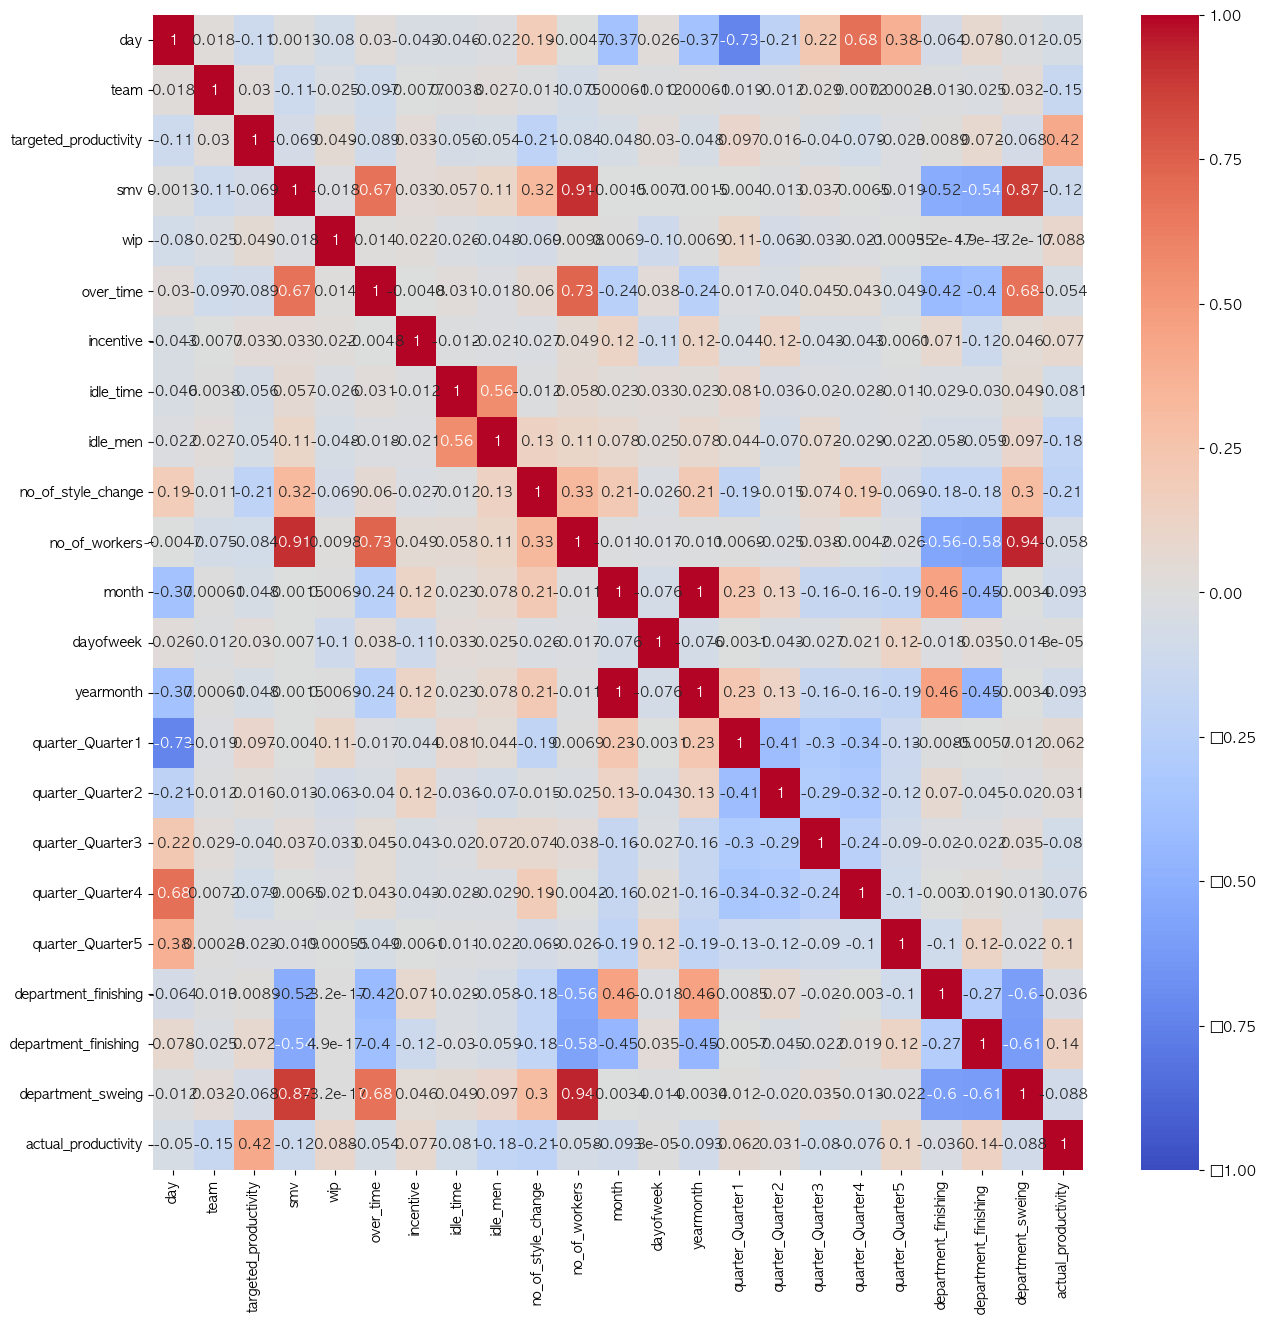

In [ ]:
sns.heatmap(pd.concat([X_onehot,Y], axis=1).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.gcf().set_size_inches(15,15)
plt.show()

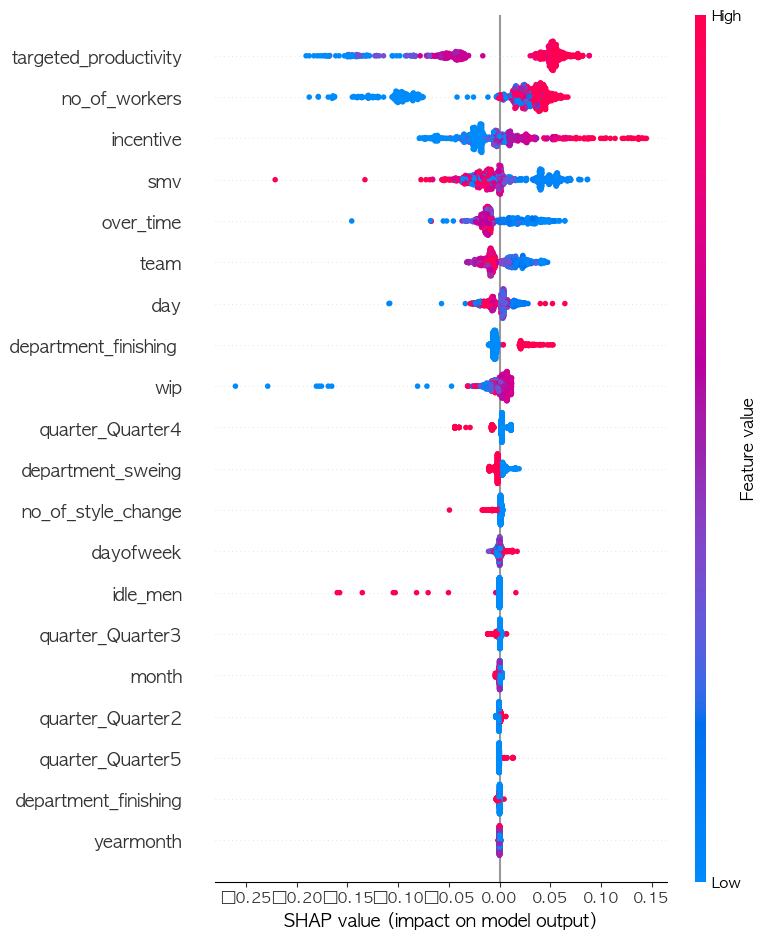

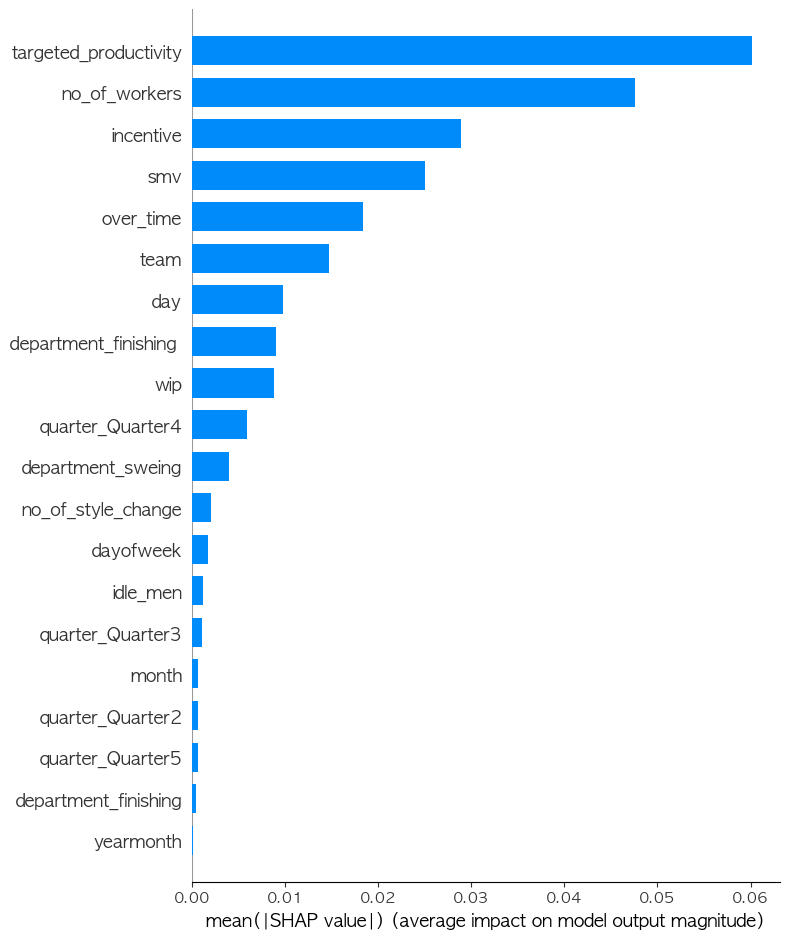

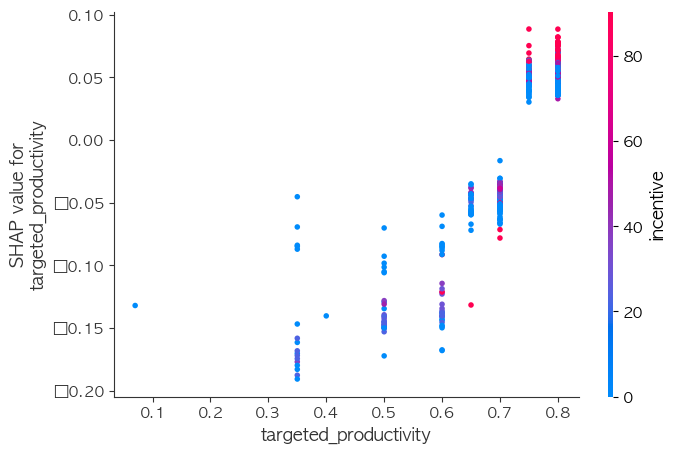

In [ ]:
shap.summary_plot(shap_values, x_train)
plt.show()

shap.summary_plot(shap_values, x_train, plot_type='bar')
plt.show()

shap.dependence_plot('targeted_productivity', shap_values, x_train)
plt.show()

In [ ]:
df

date   quarter  department  day  team  targeted_productivity  \
0    2015-01-01  Quarter1      sweing    1     8                   0.80   
1    2015-01-01  Quarter1  finishing     1     1                   0.75   
2    2015-01-01  Quarter1      sweing    1    11                   0.80   
3    2015-01-01  Quarter1      sweing    1    12                   0.80   
4    2015-01-01  Quarter1      sweing    1     6                   0.80   
...         ...       ...         ...  ...   ...                    ...   
1192 2015-03-11  Quarter2   finishing   11    10                   0.75   
1193 2015-03-11  Quarter2   finishing   11     8                   0.70   
1194 2015-03-11  Quarter2   finishing   11     7                   0.65   
1195 2015-03-11  Quarter2   finishing   11     9                   0.75   
1196 2015-03-11  Quarter2   finishing   11     6                   0.70   

        smv     wip  over_time  incentive  idle_time  idle_men  \
0     26.16  1108.0       7080         98        0.0         0   
1      3.94     NaN        960          0        0.0         0   
2     11.41   968.0       3660         50        0.0         0   
3     11.41   968.0       3660         50        0.0         0   
4     25.90  1170.0       1920         50        0.0         0   
...     ...     ...        ...        ...        ...       ...   
1192   2.90     NaN        960          0        0.0         0   
1193   3.90     NaN        960          0        0.0         0   
1194   3.90     NaN        960          0        0.0         0   
1195   2.90     NaN       1800          0        0.0         0   
1196   2.90     NaN        720          0        0.0         0   

      no_of_style_change  no_of_workers  actual_productivity  month  year  \
0                      0           59.0             0.940725      1  2015   
1                      0            8.0             0.886500      1  2015   
2                      0           30.5             0.800570      1  2015   
3                      0           30.5             0.800570      1  2015   
4                      0           56.0             0.800382      1  2015   
...                  ...            ...                  ...    ...   ...   
1192                   0            8.0             0.628333      3  2015   
1193                   0            8.0             0.625625      3  2015   
1194                   0            8.0             0.625625      3  2015   
1195                   0           15.0             0.505889      3  2015   
1196                   0            6.0             0.394722      3  2015   

      dayofweek yearmonth  success  
0             3    2015-1        0  
1             3    2015-1        0  
2             3    2015-1        0  
3             3    2015-1        0  
4             3    2015-1        0  
...         ...       ...      ...  
1192          2    2015-3        1  
1193          2    2015-3        1  
1194          2    2015-3        1  
1195          2    2015-3        1  
1196          2    2015-3        1  

[1197 rows x 20 columns]

In [ ]:
df['success'].value_counts()

success
0    869
1    328
Name: count, dtype: int64

In [ ]:
df['wip'] = df['wip'].fillna(df['wip'].mean())


In [ ]:
df

date   quarter  department  day  team  targeted_productivity  \
0    2015-01-01  Quarter1      sweing    1     8                   0.80   
1    2015-01-01  Quarter1  finishing     1     1                   0.75   
2    2015-01-01  Quarter1      sweing    1    11                   0.80   
3    2015-01-01  Quarter1      sweing    1    12                   0.80   
4    2015-01-01  Quarter1      sweing    1     6                   0.80   
...         ...       ...         ...  ...   ...                    ...   
1192 2015-03-11  Quarter2   finishing   11    10                   0.75   
1193 2015-03-11  Quarter2   finishing   11     8                   0.70   
1194 2015-03-11  Quarter2   finishing   11     7                   0.65   
1195 2015-03-11  Quarter2   finishing   11     9                   0.75   
1196 2015-03-11  Quarter2   finishing   11     6                   0.70   

        smv          wip  over_time  incentive  idle_time  idle_men  \
0     26.16  1108.000000       7080         98        0.0         0   
1      3.94  1190.465991        960          0        0.0         0   
2     11.41   968.000000       3660         50        0.0         0   
3     11.41   968.000000       3660         50        0.0         0   
4     25.90  1170.000000       1920         50        0.0         0   
...     ...          ...        ...        ...        ...       ...   
1192   2.90  1190.465991        960          0        0.0         0   
1193   3.90  1190.465991        960          0        0.0         0   
1194   3.90  1190.465991        960          0        0.0         0   
1195   2.90  1190.465991       1800          0        0.0         0   
1196   2.90  1190.465991        720          0        0.0         0   

      no_of_style_change  no_of_workers  actual_productivity  month  year  \
0                      0           59.0             0.940725      1  2015   
1                      0            8.0             0.886500      1  2015   
2                      0           30.5             0.800570      1  2015   
3                      0           30.5             0.800570      1  2015   
4                      0           56.0             0.800382      1  2015   
...                  ...            ...                  ...    ...   ...   
1192                   0            8.0             0.628333      3  2015   
1193                   0            8.0             0.625625      3  2015   
1194                   0            8.0             0.625625      3  2015   
1195                   0           15.0             0.505889      3  2015   
1196                   0            6.0             0.394722      3  2015   

      dayofweek yearmonth  success  
0             3    2015-1        0  
1             3    2015-1        0  
2             3    2015-1        0  
3             3    2015-1        0  
4             3    2015-1        0  
...         ...       ...      ...  
1192          2    2015-3        1  
1193          2    2015-3        1  
1194          2    2015-3        1  
1195          2    2015-3        1  
1196          2    2015-3        1  

[1197 rows x 20 columns]

In [ ]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity', 'month',
       'year', 'dayofweek', 'yearmonth', 'success'],
      dtype='object')

In [ ]:
X  = df[[ 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'dayofweek', 'yearmonth']]

In [ ]:
X

quarter  department  day  team  targeted_productivity    smv     wip  \
0     Quarter1      sweing    1     8                   0.80  26.16  1108.0   
1     Quarter1  finishing     1     1                   0.75   3.94     NaN   
2     Quarter1      sweing    1    11                   0.80  11.41   968.0   
3     Quarter1      sweing    1    12                   0.80  11.41   968.0   
4     Quarter1      sweing    1     6                   0.80  25.90  1170.0   
...        ...         ...  ...   ...                    ...    ...     ...   
1192  Quarter2   finishing   11    10                   0.75   2.90     NaN   
1193  Quarter2   finishing   11     8                   0.70   3.90     NaN   
1194  Quarter2   finishing   11     7                   0.65   3.90     NaN   
1195  Quarter2   finishing   11     9                   0.75   2.90     NaN   
1196  Quarter2   finishing   11     6                   0.70   2.90     NaN   

      over_time  incentive  idle_time  idle_men  no_of_style_change  \
0          7080         98        0.0         0                   0   
1           960          0        0.0         0                   0   
2          3660         50        0.0         0                   0   
3          3660         50        0.0         0                   0   
4          1920         50        0.0         0                   0   
...         ...        ...        ...       ...                 ...   
1192        960          0        0.0         0                   0   
1193        960          0        0.0         0                   0   
1194        960          0        0.0         0                   0   
1195       1800          0        0.0         0                   0   
1196        720          0        0.0         0                   0   

      no_of_workers  dayofweek yearmonth  
0              59.0          3    2015-1  
1               8.0          3    2015-1  
2              30.5          3    2015-1  
3              30.5          3    2015-1  
4              56.0          3    2015-1  
...             ...        ...       ...  
1192            8.0          2    2015-3  
1193            8.0          2    2015-3  
1194            8.0          2    2015-3  
1195           15.0          2    2015-3  
1196            6.0          2    2015-3  

[1197 rows x 15 columns]

In [ ]:
X['quarter'].value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   int32  
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    691 non-null    float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  dayofweek              1197 non-null   int32  
 14  yearmonth              1197 non-null   object 
dtypes: f

In [ ]:
df['department']

0           sweing
1       finishing 
2           sweing
3           sweing
4           sweing
           ...    
1192     finishing
1193     finishing
1194     finishing
1195     finishing
1196     finishing
Name: department, Length: 1197, dtype: object

In [ ]:
X[['department']]

department
0         sweing
1     finishing 
2         sweing
3         sweing
4         sweing
...          ...
1192   finishing
1193   finishing
1194   finishing
1195   finishing
1196   finishing

[1197 rows x 1 columns]

In [ ]:
oh = OneHotEncoder()

In [ ]:
pd.DataFrame(oh.fit_transform(X[['department']]).toarray(), columns=oh.get_feature_names_out(['department']))

department_finishing  department_finishing   department_sweing
0                      0.0                    0.0                1.0
1                      0.0                    1.0                0.0
2                      0.0                    0.0                1.0
3                      0.0                    0.0                1.0
4                      0.0                    0.0                1.0
...                    ...                    ...                ...
1192                   1.0                    0.0                0.0
1193                   1.0                    0.0                0.0
1194                   1.0                    0.0                0.0
1195                   1.0                    0.0                0.0
1196                   1.0                    0.0                0.0

[1197 rows x 3 columns]

In [ ]:
categorical_list.append('yearmonth')

In [ ]:
categorical_list

['quarter', 'department', 'yearmonth', 'yearmonth']

In [ ]:
X_oh = X.copy()

In [ ]:
for i in categorical_list:
    X_oh = pd.concat([X_oh.reset_index(drop=True), pd.DataFrame(oh.fit_transform(X[[i]]).toarray(), columns=oh.get_feature_names_out([i])).reset_index(drop=True)], axis=1)
    X_oh = X_oh.drop([i], axis=1)

KeyError: "['yearmonth'] not found in axis"

In [ ]:
X_oh

day  team  targeted_productivity    smv     wip  over_time  incentive  \
0       1     8                   0.80  26.16  1108.0       7080         98   
1       1     1                   0.75   3.94     NaN        960          0   
2       1    11                   0.80  11.41   968.0       3660         50   
3       1    12                   0.80  11.41   968.0       3660         50   
4       1     6                   0.80  25.90  1170.0       1920         50   
...   ...   ...                    ...    ...     ...        ...        ...   
1192   11    10                   0.75   2.90     NaN        960          0   
1193   11     8                   0.70   3.90     NaN        960          0   
1194   11     7                   0.65   3.90     NaN        960          0   
1195   11     9                   0.75   2.90     NaN       1800          0   
1196   11     6                   0.70   2.90     NaN        720          0   

      idle_time  idle_men  no_of_style_change  no_of_workers  dayofweek  \
0           0.0         0                   0           59.0          3   
1           0.0         0                   0            8.0          3   
2           0.0         0                   0           30.5          3   
3           0.0         0                   0           30.5          3   
4           0.0         0                   0           56.0          3   
...         ...       ...                 ...            ...        ...   
1192        0.0         0                   0            8.0          2   
1193        0.0         0                   0            8.0          2   
1194        0.0         0                   0            8.0          2   
1195        0.0         0                   0           15.0          2   
1196        0.0         0                   0            6.0          2   

      quarter_Quarter1  quarter_Quarter2  quarter_Quarter3  quarter_Quarter4  \
0                  1.0               0.0               0.0               0.0   
1                  1.0               0.0               0.0               0.0   
2                  1.0               0.0               0.0               0.0   
3                  1.0               0.0               0.0               0.0   
4                  1.0               0.0               0.0               0.0   
...                ...               ...               ...               ...   
1192               0.0               1.0               0.0               0.0   
1193               0.0               1.0               0.0               0.0   
1194               0.0               1.0               0.0               0.0   
1195               0.0               1.0               0.0               0.0   
1196               0.0               1.0               0.0               0.0   

      quarter_Quarter5  department_finishing  department_finishing   \
0                  0.0                   0.0                    0.0   
1                  0.0                   0.0                    1.0   
2                  0.0                   0.0                    0.0   
3                  0.0                   0.0                    0.0   
4                  0.0                   0.0                    0.0   
...                ...                   ...                    ...   
1192               0.0                   1.0                    0.0   
1193               0.0                   1.0                    0.0   
1194               0.0                   1.0                    0.0   
1195               0.0                   1.0                    0.0   
1196               0.0                   1.0                    0.0   

      department_sweing  yearmonth_2015-1  yearmonth_2015-2  yearmonth_2015-3  \
0                   1.0               1.0               0.0               0.0   
1                   0.0               1.0               0.0               0.0   
2                   1.0               1.0               0.0               0.0   
3                 

In [ ]:
X_oh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   day                    1197 non-null   int32  
 1   team                   1197 non-null   int64  
 2   targeted_productivity  1197 non-null   float64
 3   smv                    1197 non-null   float64
 4   wip                    691 non-null    float64
 5   over_time              1197 non-null   int64  
 6   incentive              1197 non-null   int64  
 7   idle_time              1197 non-null   float64
 8   idle_men               1197 non-null   int64  
 9   no_of_style_change     1197 non-null   int64  
 10  no_of_workers          1197 non-null   float64
 11  dayofweek              1197 non-null   int32  
 12  quarter_Quarter1       1197 non-null   float64
 13  quarter_Quarter2       1197 non-null   float64
 14  quarter_Quarter3       1197 non-null   float64
 15  quar

In [ ]:
Y  = df['success']

In [ ]:
Y.value_counts()

success
0    869
1    328
Name: count, dtype: int64

In [ ]:
X.shape

(1197, 15)

In [ ]:
Y.shape

(1197,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_oh, Y, test_size=0.3)

In [ ]:
df

date   quarter  department  day  team  targeted_productivity  \
0    2015-01-01  Quarter1      sweing    1     8                   0.80   
1    2015-01-01  Quarter1  finishing     1     1                   0.75   
2    2015-01-01  Quarter1      sweing    1    11                   0.80   
3    2015-01-01  Quarter1      sweing    1    12                   0.80   
4    2015-01-01  Quarter1      sweing    1     6                   0.80   
...         ...       ...         ...  ...   ...                    ...   
1192 2015-03-11  Quarter2   finishing   11    10                   0.75   
1193 2015-03-11  Quarter2   finishing   11     8                   0.70   
1194 2015-03-11  Quarter2   finishing   11     7                   0.65   
1195 2015-03-11  Quarter2   finishing   11     9                   0.75   
1196 2015-03-11  Quarter2   finishing   11     6                   0.70   

        smv     wip  over_time  incentive  idle_time  idle_men  \
0     26.16  1108.0       7080         98        0.0         0   
1      3.94     NaN        960          0        0.0         0   
2     11.41   968.0       3660         50        0.0         0   
3     11.41   968.0       3660         50        0.0         0   
4     25.90  1170.0       1920         50        0.0         0   
...     ...     ...        ...        ...        ...       ...   
1192   2.90     NaN        960          0        0.0         0   
1193   3.90     NaN        960          0        0.0         0   
1194   3.90     NaN        960          0        0.0         0   
1195   2.90     NaN       1800          0        0.0         0   
1196   2.90     NaN        720          0        0.0         0   

      no_of_style_change  no_of_workers  actual_productivity  month  year  \
0                      0           59.0             0.940725      1  2015   
1                      0            8.0             0.886500      1  2015   
2                      0           30.5             0.800570      1  2015   
3                      0           30.5             0.800570      1  2015   
4                      0           56.0             0.800382      1  2015   
...                  ...            ...                  ...    ...   ...   
1192                   0            8.0             0.628333      3  2015   
1193                   0            8.0             0.625625      3  2015   
1194                   0            8.0             0.625625      3  2015   
1195                   0           15.0             0.505889      3  2015   
1196                   0            6.0             0.394722      3  2015   

      dayofweek yearmonth  success  
0             3    2015-1        0  
1             3    2015-1        0  
2             3    2015-1        0  
3             3    2015-1        0  
4             3    2015-1        0  
...         ...       ...      ...  
1192          2    2015-3        1  
1193          2    2015-3        1  
1194          2    2015-3        1  
1195          2    2015-3        1  
1196          2    2015-3        1  

[1197 rows x 20 columns]

In [ ]:
X.shape

(1197, 15)

In [ ]:
Y.shape

(1197,)

In [ ]:
x_train

day  team  targeted_productivity    smv     wip  over_time  incentive  \
922    25     9                   0.75  18.79  1085.0       6240         56   
1169   10     7                   0.60  30.48  1017.0       6840         25   
28      3    11                   0.80  11.61  1005.0       7080         50   
473    27     6                   0.80  30.40   338.0       3840         34   
1111    8     2                   0.70   3.90     NaN       1200          0   
...   ...   ...                    ...    ...     ...        ...        ...   
273    15     4                   0.65  22.52   872.0      10080         26   
35      3    10                   0.70   4.15     NaN        960          0   
315    18     9                   0.80   3.94     NaN       1800          0   
1040    3     2                   0.40   3.90     NaN       6300          0   
87      6     9                   0.80   3.94     NaN       1440          0   

      idle_time  idle_men  no_of_style_change  no_of_workers  dayofweek  \
922         0.0         0                   1           52.0          2   
1169        0.0         0                   1           57.0          1   
28          0.0         0                   0           29.5          5   
473         0.0         0                   0           32.0          1   
1111        0.0         0                   0           10.0          6   
...         ...       ...                 ...            ...        ...   
273         0.0         0                   0           56.0          3   
35          0.0         0                   0            8.0          5   
315         0.0         0                   0           10.0          6   
1040        0.0         0                   0           15.0          1   
87          0.0         0                   0            8.0          1   

      quarter_Quarter1  quarter_Quarter2  quarter_Quarter3  quarter_Quarter4  \
922                0.0               0.0               0.0               1.0   
1169               0.0               1.0               0.0               0.0   
28                 1.0               0.0               0.0               0.0   
473                0.0               0.0               0.0               1.0   
1111               0.0               1.0               0.0               0.0   
...                ...               ...               ...               ...   
273                0.0               0.0               1.0               0.0   
35                 1.0               0.0               0.0               0.0   
315                0.0               0.0               1.0               0.0   
1040               1.0               0.0               0.0               0.0   
87                 1.0               0.0               0.0               0.0   

      quarter_Quarter5  department_finishing  department_finishing   \
922                0.0                   0.0                    0.0   
1169               0.0                   0.0                    0.0   
28                 0.0                   0.0                    0.0   
473                0.0                   0.0                    0.0   
1111               0.0                   1.0                    0.0   
...                ...                   ...                    ...   
273                0.0                   0.0                    0.0   
35                 0.0                   0.0                    1.0   
315                0.0                   0.0                    1.0   
1040               0.0                   1.0                    0.0   
87                 0.0                   0.0                    1.0   

      department_sweing  yearmonth_2015-1  yearmonth_2015-2  yearmonth_2015-3  \
922                 1.0               0.0               1.0               0.0   
1169                1.0               0.0               0.0               1.0   
28                  1.0               1.0               0.0               0.0   
473               

In [ ]:
x_test

day  team  targeted_productivity    smv     wip  over_time  incentive  \
69     5     8                   0.80  25.90  1047.0       6780         38   
131    8     4                   0.80  28.08   942.0      10530         75   
49     4     1                   0.80  26.16  1033.0       7080         63   
782   15     2                   0.80  22.52    12.0       6900          0   
322   19     8                   0.80  25.90  1380.0       3630         50   
..   ...   ...                    ...    ...     ...        ...        ...   
920   24     2                   0.70   3.90     NaN        960          0   
794   16     4                   0.75  30.10   912.0       7020          0   
186   11     8                   0.80   2.90     NaN       1440          0   
252   14     8                   0.80   2.90     NaN       1440          0   
931   25    11                   0.75  11.61   635.0       3360         45   

     idle_time  idle_men  no_of_style_change  no_of_workers  dayofweek  \
69         0.0         0                   0           56.5          0   
131        0.0         0                   0           58.5          3   
49         0.0         0                   0           59.0          6   
782        0.0         0                   0           57.5          6   
322        0.0         0                   0           56.5          0   
..         ...       ...                 ...            ...        ...   
920        0.0         0                   0            8.0          1   
794        0.0         0                   1           58.0          0   
186        0.0         0                   0            8.0          6   
252        0.0         0                   0            8.0          2   
931        0.0         0                   0           57.0          2   

     quarter_Quarter1  quarter_Quarter2  quarter_Quarter3  quarter_Quarter4  \
69                1.0               0.0               0.0               0.0   
131               0.0               1.0               0.0               0.0   
49                1.0               0.0               0.0               0.0   
782               0.0               0.0               1.0               0.0   
322               0.0               0.0               1.0               0.0   
..                ...               ...               ...               ...   
920               0.0               0.0               0.0               1.0   
794               0.0               0.0               1.0               0.0   
186               0.0               1.0               0.0               0.0   
252               0.0               1.0               0.0               0.0   
931               0.0               0.0               0.0               1.0   

     quarter_Quarter5  department_finishing  department_finishing   \
69                0.0                   0.0                    0.0   
131               0.0                   0.0                    0.0   
49                0.0                   0.0                    0.0   
782               0.0                   0.0                    0.0   
322               0.0                   0.0                    0.0   
..                ...                   ...                    ...   
920               0.0                   1.0                    0.0   
794               0.0                   0.0                    0.0   
186               0.0                   0.0                    1.0   
252               0.0                   0.0                    1.0   
931               0.0                   0.0                    0.0   

     department_sweing  yearmonth_2015-1  yearmonth_2015-2  yearmonth_2015-3  \
69                 1.0               1.0               0.0               0.0   
131                1.0               1.0               0.0               0.0   
49                 1.0               1.0               0.0               0.0   
782                1.0               0.0               1.0           

In [ ]:
y_train

922     0
1169    0
28      0
473     1
1111    0
       ..
273     0
35      0
315     1
1040    0
87      0
Name: success, Length: 837, dtype: int64

In [ ]:
y_test

69     0
131    0
49     0
782    1
322    0
      ..
920    1
794    0
186    1
252    1
931    0
Name: success, Length: 360, dtype: int64

# Data Modeling_Classification

In [144]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, accuracy_score, precision_score, recall_score, precision_recall_curve


In [145]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [146]:
df

date   quarter  department  day  team  targeted_productivity  \
0    2015-01-01  Quarter1      sweing    1     8                   0.80   
1    2015-01-01  Quarter1  finishing     1     1                   0.75   
2    2015-01-01  Quarter1      sweing    1    11                   0.80   
3    2015-01-01  Quarter1      sweing    1    12                   0.80   
4    2015-01-01  Quarter1      sweing    1     6                   0.80   
...         ...       ...         ...  ...   ...                    ...   
1192 2015-03-11  Quarter2   finishing   11    10                   0.75   
1193 2015-03-11  Quarter2   finishing   11     8                   0.70   
1194 2015-03-11  Quarter2   finishing   11     7                   0.65   
1195 2015-03-11  Quarter2   finishing   11     9                   0.75   
1196 2015-03-11  Quarter2   finishing   11     6                   0.70   

        smv     wip  over_time  incentive  idle_time  idle_men  \
0     26.16  1108.0       7080         98        0.0         0   
1      3.94     NaN        960          0        0.0         0   
2     11.41   968.0       3660         50        0.0         0   
3     11.41   968.0       3660         50        0.0         0   
4     25.90  1170.0       1920         50        0.0         0   
...     ...     ...        ...        ...        ...       ...   
1192   2.90     NaN        960          0        0.0         0   
1193   3.90     NaN        960          0        0.0         0   
1194   3.90     NaN        960          0        0.0         0   
1195   2.90     NaN       1800          0        0.0         0   
1196   2.90     NaN        720          0        0.0         0   

      no_of_style_change  no_of_workers  actual_productivity  month  year  \
0                      0           59.0             0.940725      1  2015   
1                      0            8.0             0.886500      1  2015   
2                      0           30.5             0.800570      1  2015   
3                      0           30.5             0.800570      1  2015   
4                      0           56.0             0.800382      1  2015   
...                  ...            ...                  ...    ...   ...   
1192                   0            8.0             0.628333      3  2015   
1193                   0            8.0             0.625625      3  2015   
1194                   0            8.0             0.625625      3  2015   
1195                   0           15.0             0.505889      3  2015   
1196                   0            6.0             0.394722      3  2015   

      dayofweek yearmonth  success  
0             3    2015-1        0  
1             3    2015-1        0  
2             3    2015-1        0  
3             3    2015-1        0  
4             3    2015-1        0  
...         ...       ...      ...  
1192          2    2015-3        1  
1193          2    2015-3        1  
1194          2    2015-3        1  
1195          2    2015-3        1  
1196          2    2015-3        1  

[1197 rows x 20 columns]

In [147]:
X = df.drop(['date', 'actual_productivity', 'success', 'year'], axis=1)
Y= df['success']

In [148]:
X

quarter  department  day  team  targeted_productivity    smv     wip  \
0     Quarter1      sweing    1     8                   0.80  26.16  1108.0   
1     Quarter1  finishing     1     1                   0.75   3.94     NaN   
2     Quarter1      sweing    1    11                   0.80  11.41   968.0   
3     Quarter1      sweing    1    12                   0.80  11.41   968.0   
4     Quarter1      sweing    1     6                   0.80  25.90  1170.0   
...        ...         ...  ...   ...                    ...    ...     ...   
1192  Quarter2   finishing   11    10                   0.75   2.90     NaN   
1193  Quarter2   finishing   11     8                   0.70   3.90     NaN   
1194  Quarter2   finishing   11     7                   0.65   3.90     NaN   
1195  Quarter2   finishing   11     9                   0.75   2.90     NaN   
1196  Quarter2   finishing   11     6                   0.70   2.90     NaN   

      over_time  incentive  idle_time  idle_men  no_of_style_change  \
0          7080         98        0.0         0                   0   
1           960          0        0.0         0                   0   
2          3660         50        0.0         0                   0   
3          3660         50        0.0         0                   0   
4          1920         50        0.0         0                   0   
...         ...        ...        ...       ...                 ...   
1192        960          0        0.0         0                   0   
1193        960          0        0.0         0                   0   
1194        960          0        0.0         0                   0   
1195       1800          0        0.0         0                   0   
1196        720          0        0.0         0                   0   

      no_of_workers  month  dayofweek yearmonth  
0              59.0      1          3    2015-1  
1               8.0      1          3    2015-1  
2              30.5      1          3    2015-1  
3              30.5      1          3    2015-1  
4              56.0      1          3    2015-1  
...             ...    ...        ...       ...  
1192            8.0      3          2    2015-3  
1193            8.0      3          2    2015-3  
1194            8.0      3          2    2015-3  
1195           15.0      3          2    2015-3  
1196            6.0      3          2    2015-3  

[1197 rows x 16 columns]

In [149]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1192    1
1193    1
1194    1
1195    1
1196    1
Name: success, Length: 1197, dtype: int64

In [150]:
X_oh = X.copy()

In [153]:
from sklearn.preprocessing import OneHotEncoder

In [154]:
# OneHotEncoder 객체를 생성합니다.
oh = OneHotEncoder()

# X_oh 데이터프레임에서 'quarter' 열을 원-핫 인코딩합니다.
encoded_array = oh.fit_transform(X_oh[['quarter']]).toarray()

# 원-핫 인코딩된 특성 이름을 가져옵니다.
encoded_columns = oh.get_feature_names_out(['quarter'])

# 원-핫 인코딩된 배열을 DataFrame으로 변환하고, 원-핫 인코딩된 특성 이름을 열 이름으로 사용합니다.
encoded_df = pd.DataFrame(oh.fit_transform(X_oh[['quarter']]).toarray(), columns=oh.get_feature_names_out(['quarter']))

# 결과를 출력합니다.

In [155]:
encoded_df

quarter_Quarter1  quarter_Quarter2  quarter_Quarter3  quarter_Quarter4  \
0                  1.0               0.0               0.0               0.0   
1                  1.0               0.0               0.0               0.0   
2                  1.0               0.0               0.0               0.0   
3                  1.0               0.0               0.0               0.0   
4                  1.0               0.0               0.0               0.0   
...                ...               ...               ...               ...   
1192               0.0               1.0               0.0               0.0   
1193               0.0               1.0               0.0               0.0   
1194               0.0               1.0               0.0               0.0   
1195               0.0               1.0               0.0               0.0   
1196               0.0               1.0               0.0               0.0   

      quarter_Quarter5  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
...                ...  
1192               0.0  
1193               0.0  
1194               0.0  
1195               0.0  
1196               0.0  

[1197 rows x 5 columns]

In [156]:
X_oh = X.copy()

In [157]:
categorical_list = ['quarter', 'department', 'yearmonth']

In [158]:
for i in categorical_list:
    X_oh = pd.concat([X_oh, pd.DataFrame(oh.fit_transform(X_oh[[i]]).toarray(), columns=oh.get_feature_names_out([i]))], axis=1)
    X_oh = X_oh.drop([i], axis=1)

In [159]:
X_oh['wip'] = X_oh['wip'].fillna(X_oh['wip'].mean())

In [160]:
X_oh

day  team  targeted_productivity    smv          wip  over_time  \
0       1     8                   0.80  26.16  1108.000000       7080   
1       1     1                   0.75   3.94  1190.465991        960   
2       1    11                   0.80  11.41   968.000000       3660   
3       1    12                   0.80  11.41   968.000000       3660   
4       1     6                   0.80  25.90  1170.000000       1920   
...   ...   ...                    ...    ...          ...        ...   
1192   11    10                   0.75   2.90  1190.465991        960   
1193   11     8                   0.70   3.90  1190.465991        960   
1194   11     7                   0.65   3.90  1190.465991        960   
1195   11     9                   0.75   2.90  1190.465991       1800   
1196   11     6                   0.70   2.90  1190.465991        720   

      incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0            98        0.0         0                   0           59.0   
1             0        0.0         0                   0            8.0   
2            50        0.0         0                   0           30.5   
3            50        0.0         0                   0           30.5   
4            50        0.0         0                   0           56.0   
...         ...        ...       ...                 ...            ...   
1192          0        0.0         0                   0            8.0   
1193          0        0.0         0                   0            8.0   
1194          0        0.0         0                   0            8.0   
1195          0        0.0         0                   0           15.0   
1196          0        0.0         0                   0            6.0   

      month  dayofweek  quarter_Quarter1  quarter_Quarter2  quarter_Quarter3  \
0         1          3               1.0               0.0               0.0   
1         1          3               1.0               0.0               0.0   
2         1          3               1.0               0.0               0.0   
3         1          3               1.0               0.0               0.0   
4         1          3               1.0               0.0               0.0   
...     ...        ...               ...               ...               ...   
1192      3          2               0.0               1.0               0.0   
1193      3          2               0.0               1.0               0.0   
1194      3          2               0.0               1.0               0.0   
1195      3          2               0.0               1.0               0.0   
1196      3          2               0.0               1.0               0.0   

      quarter_Quarter4  quarter_Quarter5  department_finishing  \
0                  0.0               0.0                   0.0   
1                  0.0               0.0                   0.0   
2                  0.0               0.0                   0.0   
3                  0.0               0.0                   0.0   
4                  0.0               0.0                   0.0   
...                ...               ...                   ...   
1192               0.0               0.0                   1.0   
1193               0.0               0.0                   1.0   
1194               0.0               0.0                   1.0   
1195               0.0               0.0                   1.0   
1196               0.0               0.0                   1.0   

      department_finishing   department_sweing  yearmonth_2015-1  \
0                       0.0                1.0               1.0   
1                       1.0                0.0               1.0   
2                       0.0                1.0               1.0   
3                       0.0                1.0               1.0   
4                       0.0                1.0               1.0   
...                     ...                ...               ...  

In [161]:
x_train, x_test, y_train, y_test = train_test_split(X_oh, Y, test_size=0.3)

In [162]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1192    1
1193    1
1194    1
1195    1
1196    1
Name: success, Length: 1197, dtype: int64

In [163]:
x_train

day  team  targeted_productivity    smv          wip  over_time  \
947    26    12                   0.80  15.26  1065.000000       4080   
427    25    10                   0.75  22.52  1413.000000      10080   
86      6    11                   0.80   4.15  1190.465991       2700   
1061    4    10                   0.70  21.82  1334.000000       5760   
1174   11    11                   0.80   2.90  1190.465991       2400   
...   ...   ...                    ...    ...          ...        ...   
1073    5     4                   0.70   3.94  1190.465991        960   
270    15     5                   0.70  20.79   391.000000      10440   
279    17     2                   0.80   3.94  1190.465991       1800   
596     3     4                   0.80   4.30  1190.465991       1440   
456    27     2                   0.75  22.52  1635.000000       6840   

      incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
947          63        0.0         0                   0           34.0   
427          69        0.0         0                   0           56.0   
86            0        0.0         0                   0           15.0   
1061         30        0.0         0                   0           53.0   
1174          0        0.0         0                   0           10.0   
...         ...        ...       ...                 ...            ...   
1073          0        0.0         0                   0            8.0   
270           0        0.0         0                   0           58.0   
279           0        0.0         0                   0           10.0   
596           0        0.0         0                   0           12.0   
456         119        0.0         0                   0           57.0   

      month  dayofweek  quarter_Quarter1  quarter_Quarter2  quarter_Quarter3  \
947       2          3               0.0               0.0               0.0   
427       1          6               0.0               0.0               0.0   
86        1          1               1.0               0.0               0.0   
1061      3          2               1.0               0.0               0.0   
1174      3          2               0.0               1.0               0.0   
...     ...        ...               ...               ...               ...   
1073      3          3               1.0               0.0               0.0   
270       1          3               0.0               0.0               1.0   
279       1          5               0.0               0.0               1.0   
596       2          1               1.0               0.0               0.0   
456       1          1               0.0               0.0               0.0   

      quarter_Quarter4  quarter_Quarter5  department_finishing  \
947                1.0               0.0                   0.0   
427                1.0               0.0                   0.0   
86                 0.0               0.0                   0.0   
1061               0.0               0.0                   0.0   
1174               0.0               0.0                   1.0   
...                ...               ...                   ...   
1073               0.0               0.0                   1.0   
270                0.0               0.0                   0.0   
279                0.0               0.0                   0.0   
596                0.0               0.0                   0.0   
456                1.0               0.0                   0.0   

      department_finishing   department_sweing  yearmonth_2015-1  \
947                     0.0                1.0               0.0   
427                     0.0                1.0               1.0   
86                      1.0                0.0               1.0   
1061                    0.0                1.0               0.0   
1174                    0.0                0.0               0.0   
...                     ...                ...               ...  

In [164]:
scaler = StandardScaler()

In [165]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [166]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)


In [167]:
x_train_scaled

day      team  targeted_productivity       smv       wip  over_time  \
0    1.451867  1.628405               0.718317 -0.000518 -0.095232  -0.147036   
1    1.335690  1.049770               0.188131  0.663651  0.141262   1.624738   
2   -0.871675  1.339088               0.718317 -1.016897 -0.009968  -0.554544   
3   -1.104029  1.049770              -0.342056  0.599612  0.087575   0.349061   
4   -0.290790  1.339088               0.718317 -1.131252 -0.009968  -0.643132   
..        ...       ...                    ...       ...       ...        ...   
832 -0.987852 -0.686135              -0.342056 -1.036109 -0.009968  -1.068358   
833  0.173919 -0.396818              -0.342056  0.505385 -0.553269   1.731045   
834  0.406273 -1.264771               0.718317 -1.036109 -0.009968  -0.820310   
835 -1.220206 -0.686135               0.718317 -1.003175 -0.009968  -0.926616   
836  1.568044 -1.264771               0.188131  0.663651  0.292128   0.667980   

     incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0     0.115749  -0.067956 -0.124521           -0.361629      -0.050249   
1     0.148215  -0.067956 -0.124521           -0.361629       0.942009   
2    -0.225138  -0.067956 -0.124521           -0.361629      -0.907198   
3    -0.062811  -0.067956 -0.124521           -0.361629       0.806701   
4    -0.225138  -0.067956 -0.124521           -0.361629      -1.132711   
..         ...        ...       ...                 ...            ...   
832  -0.225138  -0.067956 -0.124521           -0.361629      -1.222916   
833  -0.225138  -0.067956 -0.124521           -0.361629       1.032214   
834  -0.225138  -0.067956 -0.124521           -0.361629      -1.132711   
835  -0.225138  -0.067956 -0.124521           -0.361629      -1.042506   
836   0.418760  -0.067956 -0.124521           -0.361629       0.987111   

        month  dayofweek  quarter_Quarter1  quarter_Quarter2  \
0    0.393715   0.083451         -0.652606         -0.634043   
1   -0.956857   1.499295         -0.652606         -0.634043   
2   -0.956857  -0.860445          1.532319         -0.634043   
3    1.744288  -0.388497          1.532319         -0.634043   
4    1.744288  -0.388497         -0.652606          1.577181   
..        ...        ...               ...               ...   
832  1.744288   0.083451          1.532319         -0.634043   
833 -0.956857   0.083451         -0.652606         -0.634043   
834 -0.956857   1.027347         -0.652606         -0.634043   
835  0.393715  -0.860445          1.532319         -0.634043   
836 -0.956857  -0.860445         -0.652606         -0.634043   

     quarter_Quarter3  quarter_Quarter4  quarter_Quarter5  \
0           -0.448175          1.917284         -0.186039   
1           -0.448175          1.917284         -0.186039   
2           -0.448175         -0.521571         -0.186039   
3           -0.448175         -0.521571         -0.186039   
4           -0.448175         -0.521571         -0.186039   
..                ...               ...               ...   
832         -0.448175         -0.521571         -0.186039   
833          2.231271         -0.521571         -0.186039   
834          2.231271         -0.521571         -0.186039   
835         -0.448175         -0.521571         -0.186039   
836         -0.448175          1.917284         -0.186039   

     department_finishing  department_finishing   department_sweing  \
0               -0.502985              -0.517863           0.839455   
1               -0.502985              -0.517863           0.839455   
2               -0.502985               1.931014          -1.191249   
3               -0.502985              -0.517863           0.839455   
4                1.988130              -0.517863          -1.191249   
..                    ...                    ...                ...   
832              1.988130              -0.517863          -1.191249   
833             -0.502985              -0.517863           0.839455   
834    

In [168]:
rfc = RandomForestClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       612
           1       1.00      1.00      1.00       225

    accuracy                           1.00       837
   macro avg       1.00      1.00      1.00       837
weighted avg       1.00      1.00      1.00       837

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       257
           1       0.78      0.24      0.37       103

    accuracy                           0.76       360
   macro avg       0.77      0.61      0.61       360
weighted avg       0.77      0.76      0.72       360

[[612   0]
 [  0 225]]
[[250   7]
 [ 78  25]]
accuracy_score
0.7638888888888888
[[69.44  1.94]
 [21.67  6.94]]


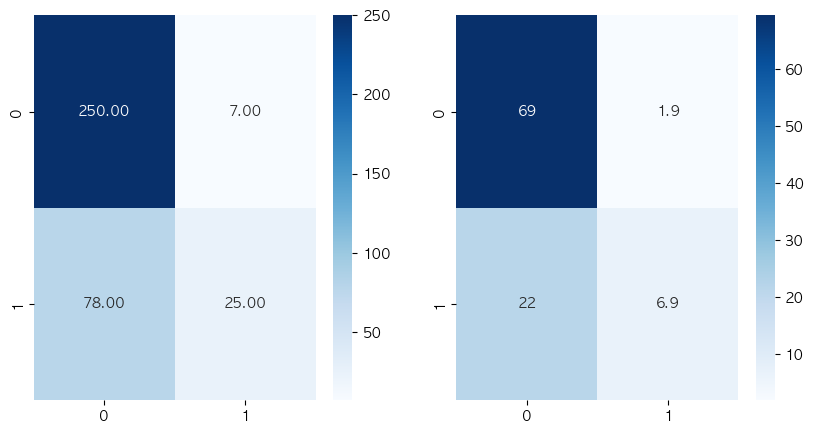

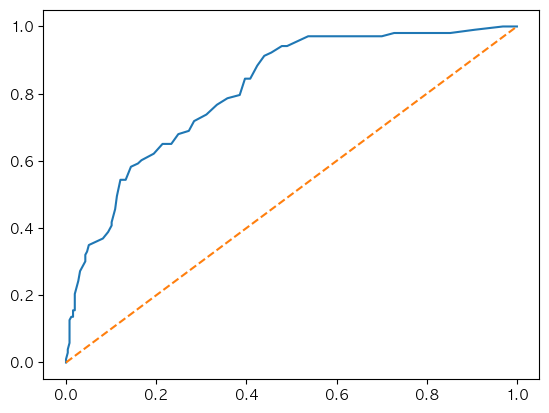

0.8112462695024745
              precision    recall  f1-score   support

           0       0.88      0.64      0.74       257
           1       0.47      0.79      0.59       103

    accuracy                           0.68       360
   macro avg       0.68      0.71      0.67       360
weighted avg       0.76      0.68      0.70       360

0.6833333333333333


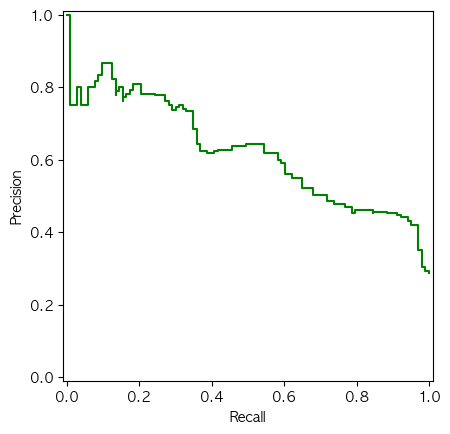

    precision    recall  thresholds
0    0.286111  1.000000        0.00
1    0.292614  1.000000        0.01
2    0.304478  0.990291        0.02
3    0.315625  0.980583        0.03
4    0.323718  0.980583        0.04
..        ...       ...         ...
64   0.750000  0.058252        0.68
65   0.800000  0.038835        0.69
66   0.750000  0.029126        0.70
67   1.000000  0.009709        0.73
68   1.000000  0.000000         NaN

[69 rows x 3 columns]
    precision    recall  thresholds
0    0.286111  1.000000        0.00
1    0.292614  1.000000        0.01
2    0.304478  0.990291        0.02
3    0.315625  0.980583        0.03
4    0.323718  0.980583        0.04
5    0.337793  0.980583        0.05
6    0.350694  0.980583        0.06
7    0.357143  0.970874        0.07
8    0.367647  0.970874        0.08
9    0.381679  0.970874        0.09
10   0.398406  0.970874        0.10
11   0.420168  0.970874        0.11
12   0.429825  0.951456        0.12
13   0.434978  0.941748        0.13
14   

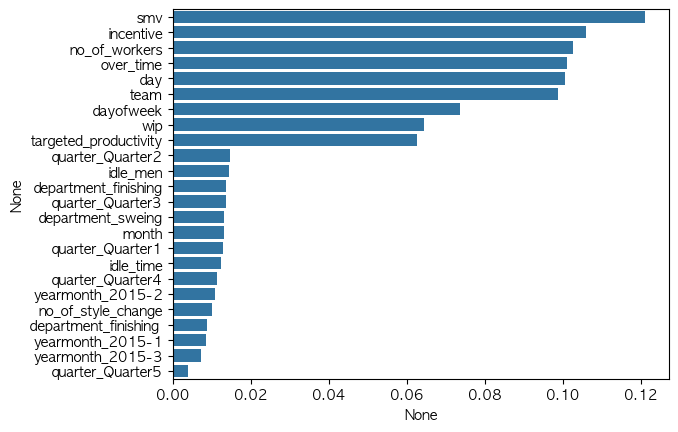

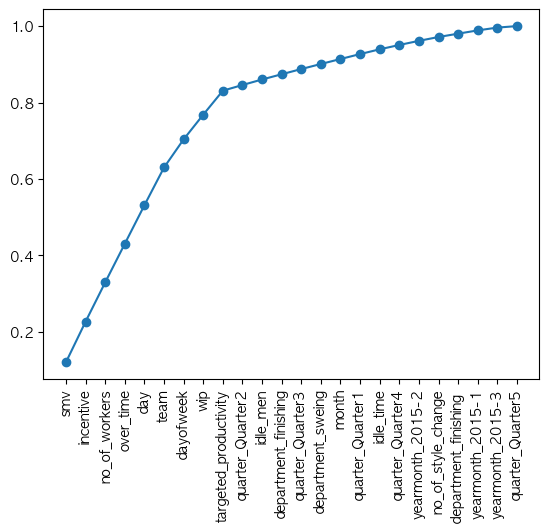

In [169]:
rfc.fit(x_train_scaled, y_train)

y_pred_train = rfc.predict(x_train_scaled)
y_pred_test = rfc.predict(x_test_scaled)


print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

print(confusion_matrix(y_train, y_pred_train))
print(confusion_matrix(y_test, y_pred_test))

print('accuracy_score')
print(accuracy_score(y_test, y_pred_test))



# c_matrix_ratio = ((confusion_matrix(y_train, y_pred_train)) / (confusion_matrix(y_train, y_pred_train).sum()))*100
c_matrix_ratio = np.round(((confusion_matrix(y_test, y_pred_test)) / (confusion_matrix(y_test, y_pred_test).sum()))*100,2)

print(c_matrix_ratio)

figs, axes = plt.subplots(1,2,figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='Blues', ax=axes[0], fmt = '.2f')
sns.heatmap(c_matrix_ratio, annot=True, cmap='Blues',  ax=axes[1])
plt.show()


y_pred_test_proba = rfc.predict_proba(x_test_scaled)[:,1]
fps, tps, thresholds = roc_curve(y_test, y_pred_test_proba)


plt.plot(fps, tps)
plt.plot([0,1], [0,1], linestyle='--')
plt.show()

print(roc_auc_score(y_test, y_pred_test_proba))


a = 0.2
y_pred_test = np.where(y_pred_test_proba > a,1,0)
print(classification_report(y_test,y_pred_test))

print(accuracy_score(y_test, y_pred_test))




precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_proba)
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

PrecisionRecallDisplay(precision, recall).plot(color='green')
plt.show()

df_precisionrecall = pd.DataFrame({'precision': precision, 'recall': recall, 'thresholds': np.append(thresholds, np.nan)})
print(df_precisionrecall)
print(df_precisionrecall[df_precisionrecall['recall'] > 0.8])




top20  =  pd.Series(rfc.feature_importances_, index = x_train_scaled.columns)
top20 = top20.sort_values(ascending=False)
print(top20)


sns.barplot(x=top20, y=top20.index)
plt.show()


plt.plot(top20.cumsum(), marker='o')
plt.xticks(rotation=90)
plt.show()


In [170]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay


In [171]:
x_train_scaled

day      team  targeted_productivity       smv       wip  over_time  \
0    1.451867  1.628405               0.718317 -0.000518 -0.095232  -0.147036   
1    1.335690  1.049770               0.188131  0.663651  0.141262   1.624738   
2   -0.871675  1.339088               0.718317 -1.016897 -0.009968  -0.554544   
3   -1.104029  1.049770              -0.342056  0.599612  0.087575   0.349061   
4   -0.290790  1.339088               0.718317 -1.131252 -0.009968  -0.643132   
..        ...       ...                    ...       ...       ...        ...   
832 -0.987852 -0.686135              -0.342056 -1.036109 -0.009968  -1.068358   
833  0.173919 -0.396818              -0.342056  0.505385 -0.553269   1.731045   
834  0.406273 -1.264771               0.718317 -1.036109 -0.009968  -0.820310   
835 -1.220206 -0.686135               0.718317 -1.003175 -0.009968  -0.926616   
836  1.568044 -1.264771               0.188131  0.663651  0.292128   0.667980   

     incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0     0.115749  -0.067956 -0.124521           -0.361629      -0.050249   
1     0.148215  -0.067956 -0.124521           -0.361629       0.942009   
2    -0.225138  -0.067956 -0.124521           -0.361629      -0.907198   
3    -0.062811  -0.067956 -0.124521           -0.361629       0.806701   
4    -0.225138  -0.067956 -0.124521           -0.361629      -1.132711   
..         ...        ...       ...                 ...            ...   
832  -0.225138  -0.067956 -0.124521           -0.361629      -1.222916   
833  -0.225138  -0.067956 -0.124521           -0.361629       1.032214   
834  -0.225138  -0.067956 -0.124521           -0.361629      -1.132711   
835  -0.225138  -0.067956 -0.124521           -0.361629      -1.042506   
836   0.418760  -0.067956 -0.124521           -0.361629       0.987111   

        month  dayofweek  quarter_Quarter1  quarter_Quarter2  \
0    0.393715   0.083451         -0.652606         -0.634043   
1   -0.956857   1.499295         -0.652606         -0.634043   
2   -0.956857  -0.860445          1.532319         -0.634043   
3    1.744288  -0.388497          1.532319         -0.634043   
4    1.744288  -0.388497         -0.652606          1.577181   
..        ...        ...               ...               ...   
832  1.744288   0.083451          1.532319         -0.634043   
833 -0.956857   0.083451         -0.652606         -0.634043   
834 -0.956857   1.027347         -0.652606         -0.634043   
835  0.393715  -0.860445          1.532319         -0.634043   
836 -0.956857  -0.860445         -0.652606         -0.634043   

     quarter_Quarter3  quarter_Quarter4  quarter_Quarter5  \
0           -0.448175          1.917284         -0.186039   
1           -0.448175          1.917284         -0.186039   
2           -0.448175         -0.521571         -0.186039   
3           -0.448175         -0.521571         -0.186039   
4           -0.448175         -0.521571         -0.186039   
..                ...               ...               ...   
832         -0.448175         -0.521571         -0.186039   
833          2.231271         -0.521571         -0.186039   
834          2.231271         -0.521571         -0.186039   
835         -0.448175         -0.521571         -0.186039   
836         -0.448175          1.917284         -0.186039   

     department_finishing  department_finishing   department_sweing  \
0               -0.502985              -0.517863           0.839455   
1               -0.502985              -0.517863           0.839455   
2               -0.502985               1.931014          -1.191249   
3               -0.502985              -0.517863           0.839455   
4                1.988130              -0.517863          -1.191249   
..                    ...                    ...                ...   
832              1.988130              -0.517863          -1.191249   
833             -0.502985              -0.517863           0.839455   
834    

In [172]:
def model_check(model):
    try:
        model.fit(x_train_scaled, y_train)

        y_pred_train = model.predict(x_train_scaled)
        y_pred_test = model.predict(x_test_scaled)


        print(classification_report(y_train, y_pred_train))
        print(classification_report(y_test, y_pred_test))

        print(confusion_matrix(y_train, y_pred_train))
        print(confusion_matrix(y_test, y_pred_test))

        print('accuracy_score')
        print(accuracy_score(y_test, y_pred_test))



        # c_matrix_ratio = ((confusion_matrix(y_train, y_pred_train)) / (confusion_matrix(y_train, y_pred_train).sum()))*100
        c_matrix_ratio = np.round(((confusion_matrix(y_test, y_pred_test)) / (confusion_matrix(y_test, y_pred_test).sum()))*100,2)

        print(c_matrix_ratio)

        figs, axes = plt.subplots(1,2,figsize=(10,5))
        sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='Blues', ax=axes[0], fmt = '.2f')
        sns.heatmap(c_matrix_ratio, annot=True, cmap='Blues',  ax=axes[1])
        plt.show()


        y_pred_test_proba = model.predict_proba(x_test_scaled)[:,1]
        fps, tps, thresholds = roc_curve(y_test, y_pred_test_proba)


        plt.plot(fps, tps)
        plt.plot([0,1], [0,1], linestyle='--')
        plt.show()

        print(roc_auc_score(y_test, y_pred_test_proba))


        a = 0.2
        y_pred_test = np.where(y_pred_test_proba > a,1,0)
        print(classification_report(y_test,y_pred_test))

        print(accuracy_score(y_test, y_pred_test))




        precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_proba)

        PrecisionRecallDisplay(precision, recall).plot(color='green')
        plt.show()

        df_precisionrecall = pd.DataFrame({'precision': precision, 'recall': recall, 'thresholds': np.append(thresholds, np.nan)})
        print(df_precisionrecall)
        print(df_precisionrecall[df_precisionrecall['recall'] > 0.8])




        top20  =  pd.Series(model.feature_importances_, index = x_train_scaled.columns)
        top20 = top20.sort_values(ascending=False)
        print(top20)


        sns.barplot(x=top20, y=top20.index)
        plt.show()


        plt.plot(top20.cumsum(), marker='o')
        plt.xticks(rotation=90)
        plt.show()
    except Exception as e:
        print(e)
        pass


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       612
           1       1.00      1.00      1.00       225

    accuracy                           1.00       837
   macro avg       1.00      1.00      1.00       837
weighted avg       1.00      1.00      1.00       837

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       257
           1       0.71      0.28      0.40       103

    accuracy                           0.76       360
   macro avg       0.74      0.62      0.63       360
weighted avg       0.75      0.76      0.72       360

[[612   0]
 [  0 225]]
[[245  12]
 [ 74  29]]
accuracy_score
0.7611111111111111
[[68.06  3.33]
 [20.56  8.06]]


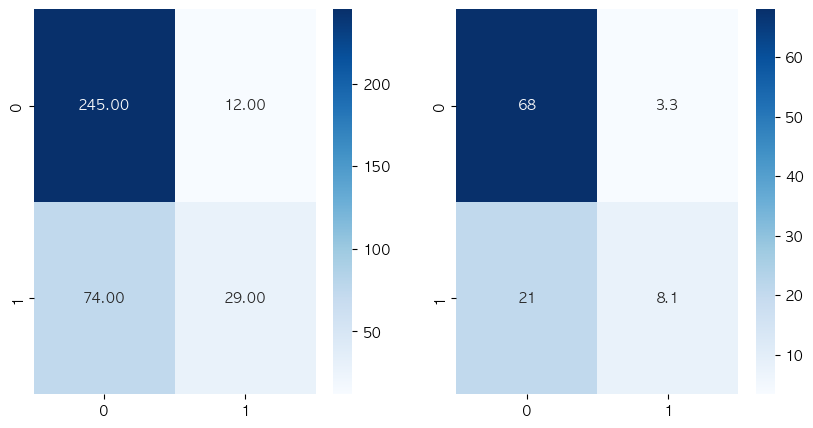

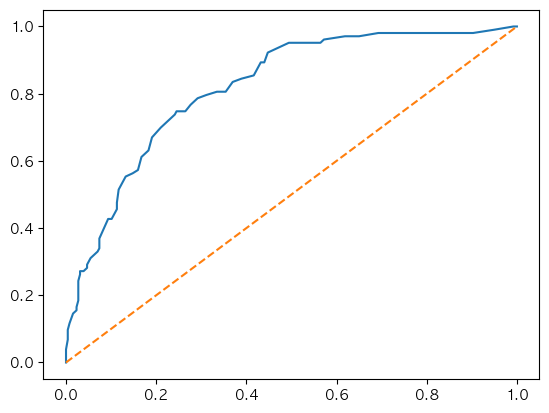

0.8195194741415133
              precision    recall  f1-score   support

           0       0.91      0.61      0.73       257
           1       0.47      0.84      0.60       103

    accuracy                           0.68       360
   macro avg       0.69      0.73      0.67       360
weighted avg       0.78      0.68      0.69       360

0.6777777777777778


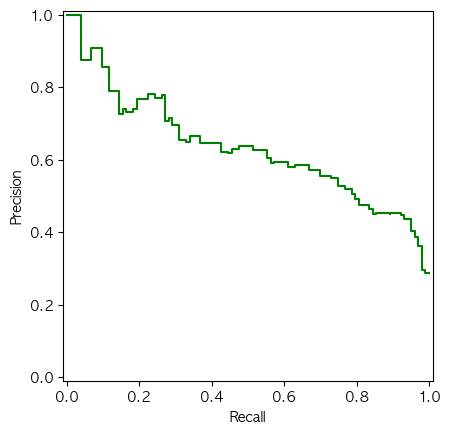

    precision    recall  thresholds
0    0.286111  1.000000        0.00
1    0.287709  1.000000        0.01
2    0.294798  0.990291        0.02
3    0.303303  0.980583        0.03
4    0.315625  0.980583        0.04
..        ...       ...         ...
65   1.000000  0.038835        0.67
66   1.000000  0.029126        0.70
67   1.000000  0.019417        0.74
68   1.000000  0.009709        0.75
69   1.000000  0.000000         NaN

[70 rows x 3 columns]
    precision    recall  thresholds
0    0.286111  1.000000        0.00
1    0.287709  1.000000        0.01
2    0.294798  0.990291        0.02
3    0.303303  0.980583        0.03
4    0.315625  0.980583        0.04
5    0.326861  0.980583        0.05
6    0.338926  0.980583        0.06
7    0.350694  0.980583        0.07
8    0.362007  0.980583        0.08
9    0.374532  0.970874        0.09
10   0.386100  0.970874        0.10
11   0.402439  0.961165        0.11
12   0.403292  0.951456        0.12
13   0.413502  0.951456        0.13
14   

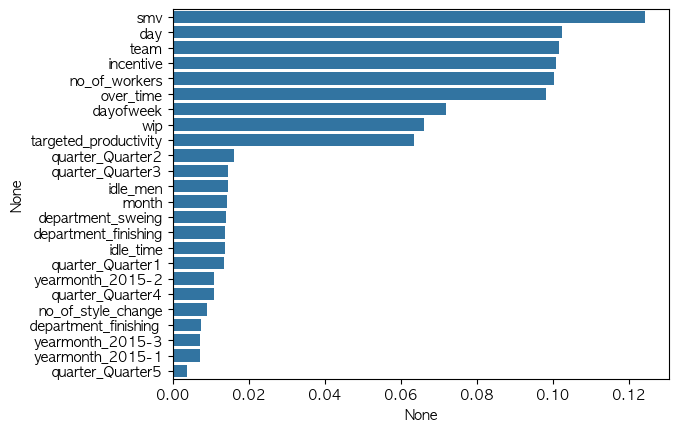

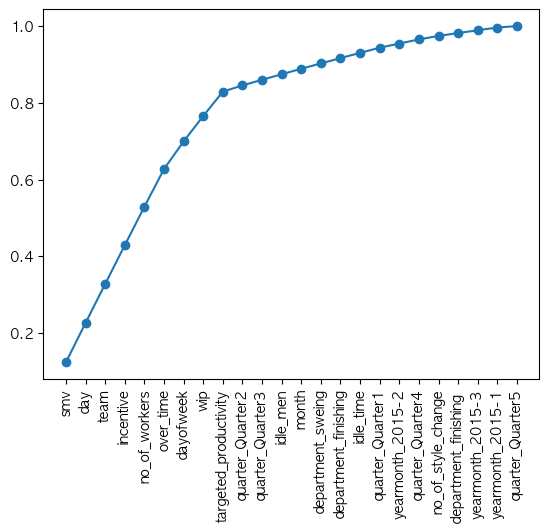

In [173]:
model_check(rfc)

In [174]:
import xgboost as xgb
import lightgbm as lgb

In [175]:
xgb_c = xgb.XGBClassifier()
lgb_c = lgb.LGBMClassifier()

In [176]:
x_train

day  team  targeted_productivity    smv          wip  over_time  \
947    26    12                   0.80  15.26  1065.000000       4080   
427    25    10                   0.75  22.52  1413.000000      10080   
86      6    11                   0.80   4.15  1190.465991       2700   
1061    4    10                   0.70  21.82  1334.000000       5760   
1174   11    11                   0.80   2.90  1190.465991       2400   
...   ...   ...                    ...    ...          ...        ...   
1073    5     4                   0.70   3.94  1190.465991        960   
270    15     5                   0.70  20.79   391.000000      10440   
279    17     2                   0.80   3.94  1190.465991       1800   
596     3     4                   0.80   4.30  1190.465991       1440   
456    27     2                   0.75  22.52  1635.000000       6840   

      incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
947          63        0.0         0                   0           34.0   
427          69        0.0         0                   0           56.0   
86            0        0.0         0                   0           15.0   
1061         30        0.0         0                   0           53.0   
1174          0        0.0         0                   0           10.0   
...         ...        ...       ...                 ...            ...   
1073          0        0.0         0                   0            8.0   
270           0        0.0         0                   0           58.0   
279           0        0.0         0                   0           10.0   
596           0        0.0         0                   0           12.0   
456         119        0.0         0                   0           57.0   

      month  dayofweek  quarter_Quarter1  quarter_Quarter2  quarter_Quarter3  \
947       2          3               0.0               0.0               0.0   
427       1          6               0.0               0.0               0.0   
86        1          1               1.0               0.0               0.0   
1061      3          2               1.0               0.0               0.0   
1174      3          2               0.0               1.0               0.0   
...     ...        ...               ...               ...               ...   
1073      3          3               1.0               0.0               0.0   
270       1          3               0.0               0.0               1.0   
279       1          5               0.0               0.0               1.0   
596       2          1               1.0               0.0               0.0   
456       1          1               0.0               0.0               0.0   

      quarter_Quarter4  quarter_Quarter5  department_finishing  \
947                1.0               0.0                   0.0   
427                1.0               0.0                   0.0   
86                 0.0               0.0                   0.0   
1061               0.0               0.0                   0.0   
1174               0.0               0.0                   1.0   
...                ...               ...                   ...   
1073               0.0               0.0                   1.0   
270                0.0               0.0                   0.0   
279                0.0               0.0                   0.0   
596                0.0               0.0                   0.0   
456                1.0               0.0                   0.0   

      department_finishing   department_sweing  yearmonth_2015-1  \
947                     0.0                1.0               0.0   
427                     0.0                1.0               1.0   
86                      1.0                0.0               1.0   
1061                    0.0                1.0               0.0   
1174                    0.0                0.0               0.0   
...                     ...                ...               ...  

In [177]:
x_train_scaled

day      team  targeted_productivity       smv       wip  over_time  \
0    1.451867  1.628405               0.718317 -0.000518 -0.095232  -0.147036   
1    1.335690  1.049770               0.188131  0.663651  0.141262   1.624738   
2   -0.871675  1.339088               0.718317 -1.016897 -0.009968  -0.554544   
3   -1.104029  1.049770              -0.342056  0.599612  0.087575   0.349061   
4   -0.290790  1.339088               0.718317 -1.131252 -0.009968  -0.643132   
..        ...       ...                    ...       ...       ...        ...   
832 -0.987852 -0.686135              -0.342056 -1.036109 -0.009968  -1.068358   
833  0.173919 -0.396818              -0.342056  0.505385 -0.553269   1.731045   
834  0.406273 -1.264771               0.718317 -1.036109 -0.009968  -0.820310   
835 -1.220206 -0.686135               0.718317 -1.003175 -0.009968  -0.926616   
836  1.568044 -1.264771               0.188131  0.663651  0.292128   0.667980   

     incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0     0.115749  -0.067956 -0.124521           -0.361629      -0.050249   
1     0.148215  -0.067956 -0.124521           -0.361629       0.942009   
2    -0.225138  -0.067956 -0.124521           -0.361629      -0.907198   
3    -0.062811  -0.067956 -0.124521           -0.361629       0.806701   
4    -0.225138  -0.067956 -0.124521           -0.361629      -1.132711   
..         ...        ...       ...                 ...            ...   
832  -0.225138  -0.067956 -0.124521           -0.361629      -1.222916   
833  -0.225138  -0.067956 -0.124521           -0.361629       1.032214   
834  -0.225138  -0.067956 -0.124521           -0.361629      -1.132711   
835  -0.225138  -0.067956 -0.124521           -0.361629      -1.042506   
836   0.418760  -0.067956 -0.124521           -0.361629       0.987111   

        month  dayofweek  quarter_Quarter1  quarter_Quarter2  \
0    0.393715   0.083451         -0.652606         -0.634043   
1   -0.956857   1.499295         -0.652606         -0.634043   
2   -0.956857  -0.860445          1.532319         -0.634043   
3    1.744288  -0.388497          1.532319         -0.634043   
4    1.744288  -0.388497         -0.652606          1.577181   
..        ...        ...               ...               ...   
832  1.744288   0.083451          1.532319         -0.634043   
833 -0.956857   0.083451         -0.652606         -0.634043   
834 -0.956857   1.027347         -0.652606         -0.634043   
835  0.393715  -0.860445          1.532319         -0.634043   
836 -0.956857  -0.860445         -0.652606         -0.634043   

     quarter_Quarter3  quarter_Quarter4  quarter_Quarter5  \
0           -0.448175          1.917284         -0.186039   
1           -0.448175          1.917284         -0.186039   
2           -0.448175         -0.521571         -0.186039   
3           -0.448175         -0.521571         -0.186039   
4           -0.448175         -0.521571         -0.186039   
..                ...               ...               ...   
832         -0.448175         -0.521571         -0.186039   
833          2.231271         -0.521571         -0.186039   
834          2.231271         -0.521571         -0.186039   
835         -0.448175         -0.521571         -0.186039   
836         -0.448175          1.917284         -0.186039   

     department_finishing  department_finishing   department_sweing  \
0               -0.502985              -0.517863           0.839455   
1               -0.502985              -0.517863           0.839455   
2               -0.502985               1.931014          -1.191249   
3               -0.502985              -0.517863           0.839455   
4                1.988130              -0.517863          -1.191249   
..                    ...                    ...                ...   
832              1.988130              -0.517863          -1.191249   
833             -0.502985              -0.517863           0.839455   
834    

In [178]:
y_train

947     0
427     0
86      0
1061    0
1174    0
       ..
1073    0
270     0
279     0
596     1
456     0
Name: success, Length: 837, dtype: int64

In [179]:
xgb_c = xgb.XGBClassifier()




              precision    recall  f1-score   support

           0       1.00      1.00      1.00       612
           1       1.00      1.00      1.00       225

    accuracy                           1.00       837
   macro avg       1.00      1.00      1.00       837
weighted avg       1.00      1.00      1.00       837

              precision    recall  f1-score   support

           0       0.77      0.94      0.84       257
           1       0.65      0.29      0.40       103

    accuracy                           0.75       360
   macro avg       0.71      0.61      0.62       360
weighted avg       0.73      0.75      0.72       360

[[612   0]
 [  0 225]]
[[241  16]
 [ 73  30]]
accuracy_score
0.7527777777777778
[[66.94  4.44]
 [20.28  8.33]]


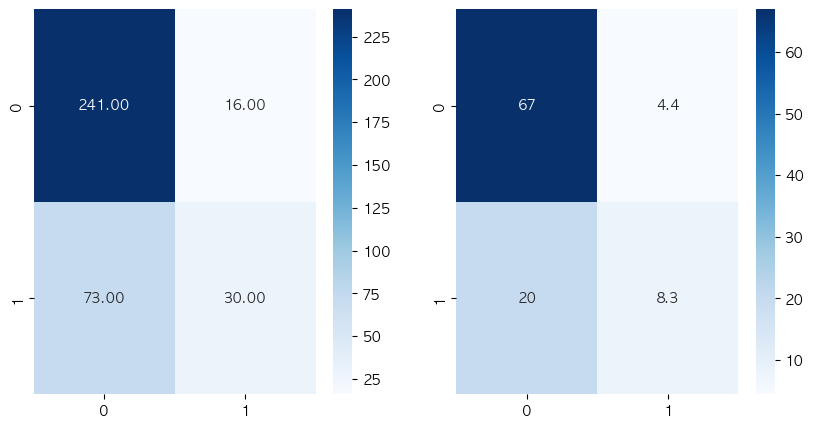

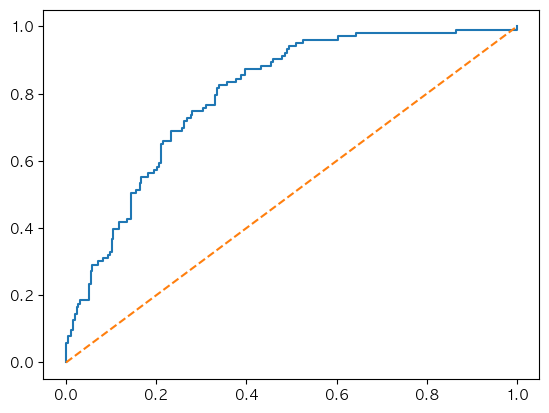

0.7985720222129878
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       257
           1       0.56      0.51      0.54       103

    accuracy                           0.75       360
   macro avg       0.69      0.68      0.68       360
weighted avg       0.74      0.75      0.74       360

0.7472222222222222


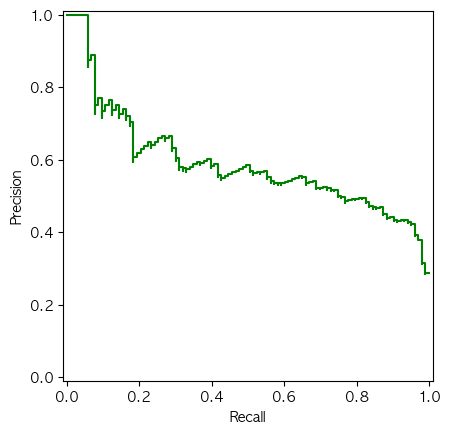

     precision    recall  thresholds
0     0.286111  1.000000    0.000039
1     0.284123  0.990291    0.000058
2     0.284916  0.990291    0.000067
3     0.285714  0.990291    0.000079
4     0.286517  0.990291    0.000081
..         ...       ...         ...
356   1.000000  0.038835    0.968841
357   1.000000  0.029126    0.975416
358   1.000000  0.019417    0.987163
359   1.000000  0.009709    0.993737
360   1.000000  0.000000         NaN

[361 rows x 3 columns]
     precision    recall  thresholds
0     0.286111  1.000000    0.000039
1     0.284123  0.990291    0.000058
2     0.284916  0.990291    0.000067
3     0.285714  0.990291    0.000079
4     0.286517  0.990291    0.000081
..         ...       ...         ...
187   0.491329  0.825243    0.044273
188   0.494186  0.825243    0.044357
189   0.491228  0.815534    0.046345
190   0.494118  0.815534    0.047879
191   0.491124  0.805825    0.047974

[192 rows x 3 columns]
incentive                0.225071
idle_time                0.200

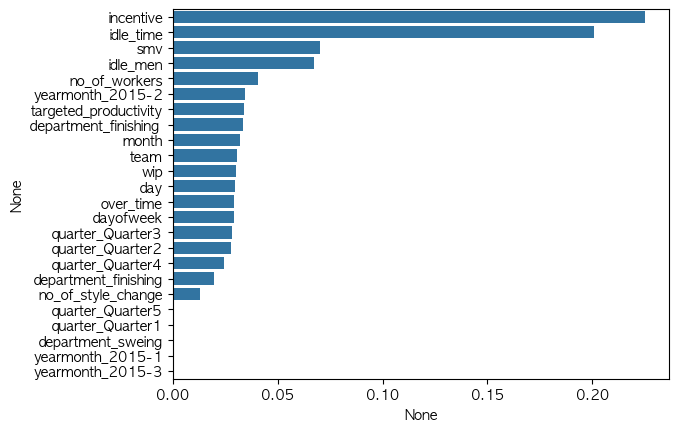

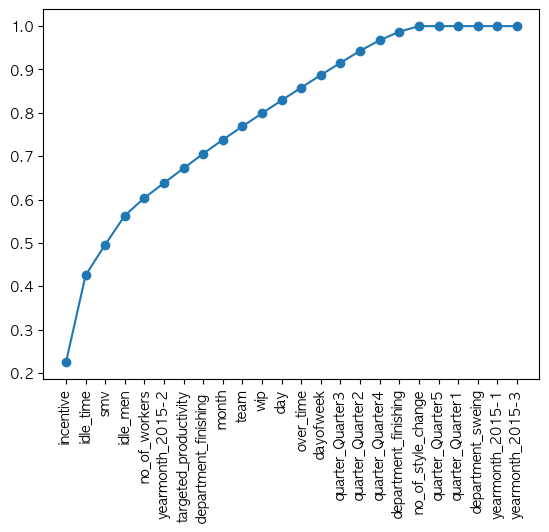

In [180]:
model_check(xgb_c)

In [181]:
# model_check(lgb_c)

In [182]:
from sklearn.linear_model import LogisticRegression

In [183]:
logis = LogisticRegression()

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       612
           1       0.66      0.31      0.42       225

    accuracy                           0.77       837
   macro avg       0.73      0.62      0.64       837
weighted avg       0.75      0.77      0.74       837

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       257
           1       0.55      0.22      0.32       103

    accuracy                           0.72       360
   macro avg       0.65      0.57      0.57       360
weighted avg       0.69      0.72      0.68       360

[[577  35]
 [156  69]]
[[238  19]
 [ 80  23]]
accuracy_score
0.725
[[66.11  5.28]
 [22.22  6.39]]


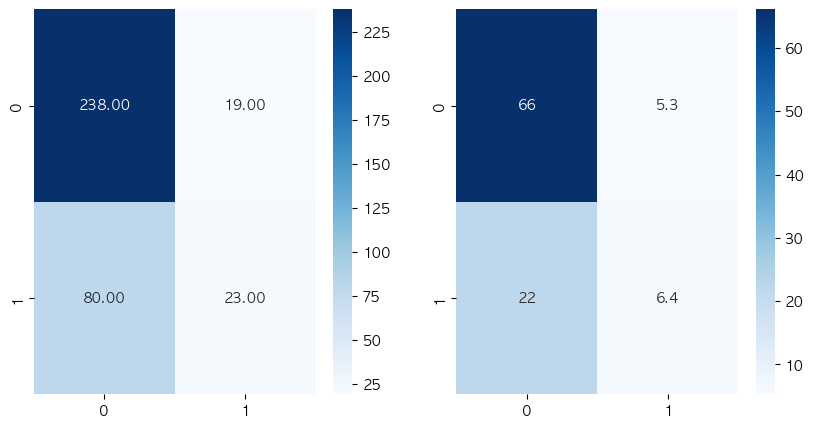

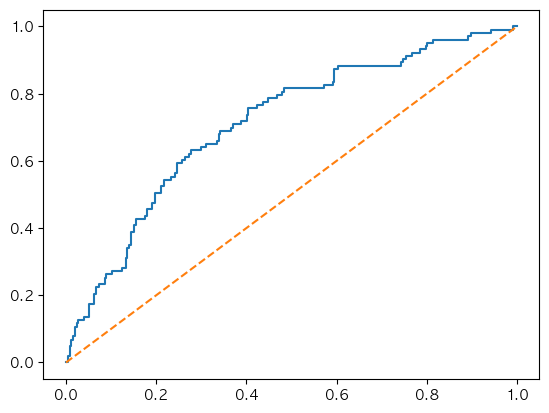

0.7126289146613275
              precision    recall  f1-score   support

           0       0.86      0.53      0.66       257
           1       0.40      0.79      0.53       103

    accuracy                           0.61       360
   macro avg       0.63      0.66      0.60       360
weighted avg       0.73      0.61      0.62       360

0.6055555555555555


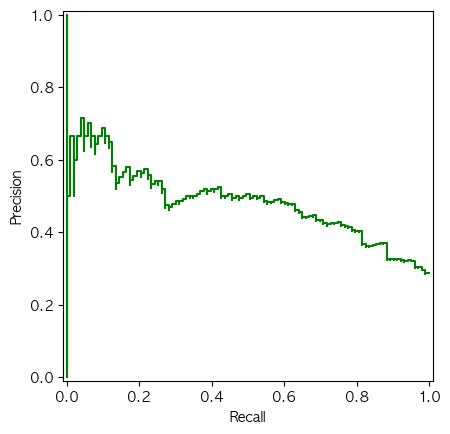

     precision    recall    thresholds
0     0.286111  1.000000  5.774094e-17
1     0.286908  1.000000  4.540759e-03
2     0.287709  1.000000  8.803073e-03
3     0.285714  0.990291  1.351164e-02
4     0.286517  0.990291  1.531475e-02
..         ...       ...           ...
356   0.500000  0.019417  8.187876e-01
357   0.666667  0.019417  9.154865e-01
358   0.500000  0.009709  9.808223e-01
359   0.000000  0.000000  9.998774e-01
360   1.000000  0.000000           NaN

[361 rows x 3 columns]
     precision    recall    thresholds
0     0.286111  1.000000  5.774094e-17
1     0.286908  1.000000  4.540759e-03
2     0.287709  1.000000  8.803073e-03
3     0.285714  0.990291  1.351164e-02
4     0.286517  0.990291  1.531475e-02
..         ...       ...           ...
150   0.400000  0.815534  1.899995e-01
151   0.401914  0.815534  1.900870e-01
152   0.403846  0.815534  1.914637e-01
153   0.400966  0.805825  1.920246e-01
154   0.402913  0.805825  1.928225e-01

[155 rows x 3 columns]
'LogisticRegress

In [184]:
model_check(logis)

In [185]:
from sklearn.neighbors import KNeighborsClassifier

In [186]:
x_train_scaled

day      team  targeted_productivity       smv       wip  over_time  \
0    1.451867  1.628405               0.718317 -0.000518 -0.095232  -0.147036   
1    1.335690  1.049770               0.188131  0.663651  0.141262   1.624738   
2   -0.871675  1.339088               0.718317 -1.016897 -0.009968  -0.554544   
3   -1.104029  1.049770              -0.342056  0.599612  0.087575   0.349061   
4   -0.290790  1.339088               0.718317 -1.131252 -0.009968  -0.643132   
..        ...       ...                    ...       ...       ...        ...   
832 -0.987852 -0.686135              -0.342056 -1.036109 -0.009968  -1.068358   
833  0.173919 -0.396818              -0.342056  0.505385 -0.553269   1.731045   
834  0.406273 -1.264771               0.718317 -1.036109 -0.009968  -0.820310   
835 -1.220206 -0.686135               0.718317 -1.003175 -0.009968  -0.926616   
836  1.568044 -1.264771               0.188131  0.663651  0.292128   0.667980   

     incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0     0.115749  -0.067956 -0.124521           -0.361629      -0.050249   
1     0.148215  -0.067956 -0.124521           -0.361629       0.942009   
2    -0.225138  -0.067956 -0.124521           -0.361629      -0.907198   
3    -0.062811  -0.067956 -0.124521           -0.361629       0.806701   
4    -0.225138  -0.067956 -0.124521           -0.361629      -1.132711   
..         ...        ...       ...                 ...            ...   
832  -0.225138  -0.067956 -0.124521           -0.361629      -1.222916   
833  -0.225138  -0.067956 -0.124521           -0.361629       1.032214   
834  -0.225138  -0.067956 -0.124521           -0.361629      -1.132711   
835  -0.225138  -0.067956 -0.124521           -0.361629      -1.042506   
836   0.418760  -0.067956 -0.124521           -0.361629       0.987111   

        month  dayofweek  quarter_Quarter1  quarter_Quarter2  \
0    0.393715   0.083451         -0.652606         -0.634043   
1   -0.956857   1.499295         -0.652606         -0.634043   
2   -0.956857  -0.860445          1.532319         -0.634043   
3    1.744288  -0.388497          1.532319         -0.634043   
4    1.744288  -0.388497         -0.652606          1.577181   
..        ...        ...               ...               ...   
832  1.744288   0.083451          1.532319         -0.634043   
833 -0.956857   0.083451         -0.652606         -0.634043   
834 -0.956857   1.027347         -0.652606         -0.634043   
835  0.393715  -0.860445          1.532319         -0.634043   
836 -0.956857  -0.860445         -0.652606         -0.634043   

     quarter_Quarter3  quarter_Quarter4  quarter_Quarter5  \
0           -0.448175          1.917284         -0.186039   
1           -0.448175          1.917284         -0.186039   
2           -0.448175         -0.521571         -0.186039   
3           -0.448175         -0.521571         -0.186039   
4           -0.448175         -0.521571         -0.186039   
..                ...               ...               ...   
832         -0.448175         -0.521571         -0.186039   
833          2.231271         -0.521571         -0.186039   
834          2.231271         -0.521571         -0.186039   
835         -0.448175         -0.521571         -0.186039   
836         -0.448175          1.917284         -0.186039   

     department_finishing  department_finishing   department_sweing  \
0               -0.502985              -0.517863           0.839455   
1               -0.502985              -0.517863           0.839455   
2               -0.502985               1.931014          -1.191249   
3               -0.502985              -0.517863           0.839455   
4                1.988130              -0.517863          -1.191249   
..                    ...                    ...                ...   
832              1.988130              -0.517863          -1.191249   
833             -0.502985              -0.517863           0.839455   
834    

In [187]:
knn = KNeighborsClassifier(n_neighbors=5)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       612
           1       0.80      0.58      0.67       225

    accuracy                           0.85       837
   macro avg       0.83      0.76      0.79       837
weighted avg       0.84      0.85      0.84       837

              precision    recall  f1-score   support

           0       0.80      0.88      0.83       257
           1       0.58      0.44      0.50       103

    accuracy                           0.75       360
   macro avg       0.69      0.66      0.67       360
weighted avg       0.73      0.75      0.74       360

[[579  33]
 [ 94 131]]
[[225  32]
 [ 58  45]]
accuracy_score
0.75
[[62.5   8.89]
 [16.11 12.5 ]]


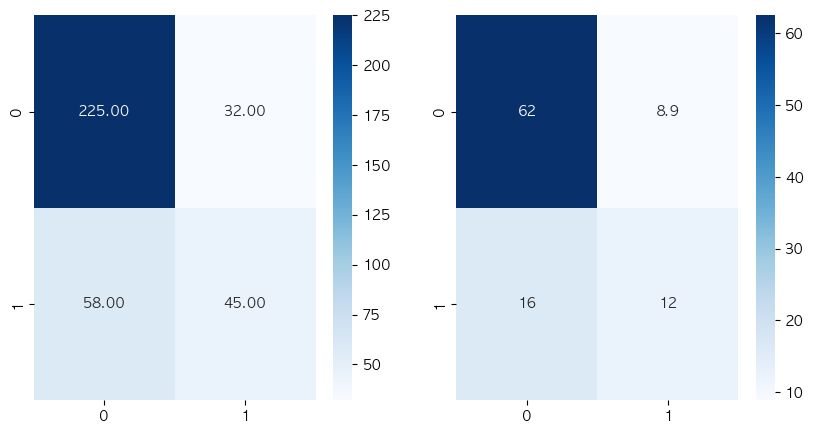

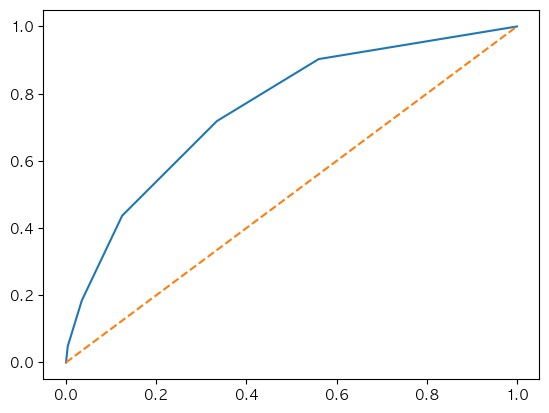

0.7542027124022515
              precision    recall  f1-score   support

           0       0.85      0.67      0.75       257
           1       0.46      0.72      0.56       103

    accuracy                           0.68       360
   macro avg       0.66      0.69      0.66       360
weighted avg       0.74      0.68      0.70       360

0.6805555555555556


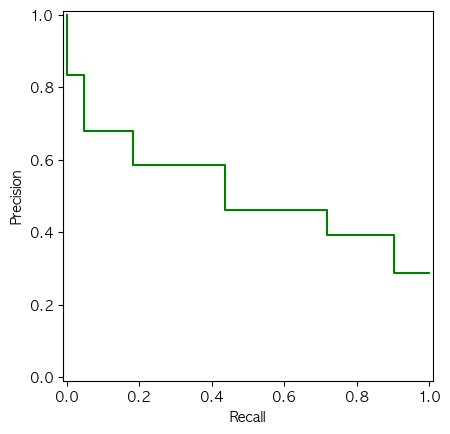

   precision    recall  thresholds
0   0.286111  1.000000         0.0
1   0.392405  0.902913         0.2
2   0.462500  0.718447         0.4
3   0.584416  0.436893         0.6
4   0.678571  0.184466         0.8
5   0.833333  0.048544         1.0
6   1.000000  0.000000         NaN
   precision    recall  thresholds
0   0.286111  1.000000         0.0
1   0.392405  0.902913         0.2
'KNeighborsClassifier' object has no attribute 'feature_importances_'


In [188]:
model_check(knn)

In [189]:
np.arange(1,31)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [190]:
knn = KNeighborsClassifier()

In [191]:
from sklearn.model_selection import GridSearchCV

In [192]:
param_grid = {
    'n_neighbors':np.arange(5,31)
}

grid = GridSearchCV(knn, param_grid = param_grid, cv=5, scoring='recall')

In [193]:
# grid.fit(x_train_scaled, y_train)

In [195]:
# print(grid.best_params_)
# print(grid.best_score_)
# print(grid.best_estimator_)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       612
           1       1.00      1.00      1.00       225

    accuracy                           1.00       837
   macro avg       1.00      1.00      1.00       837
weighted avg       1.00      1.00      1.00       837

              precision    recall  f1-score   support

           0       0.77      0.94      0.84       257
           1       0.65      0.29      0.40       103

    accuracy                           0.75       360
   macro avg       0.71      0.61      0.62       360
weighted avg       0.73      0.75      0.72       360

[[612   0]
 [  0 225]]
[[241  16]
 [ 73  30]]
accuracy_score
0.7527777777777778
[[66.94  4.44]
 [20.28  8.33]]


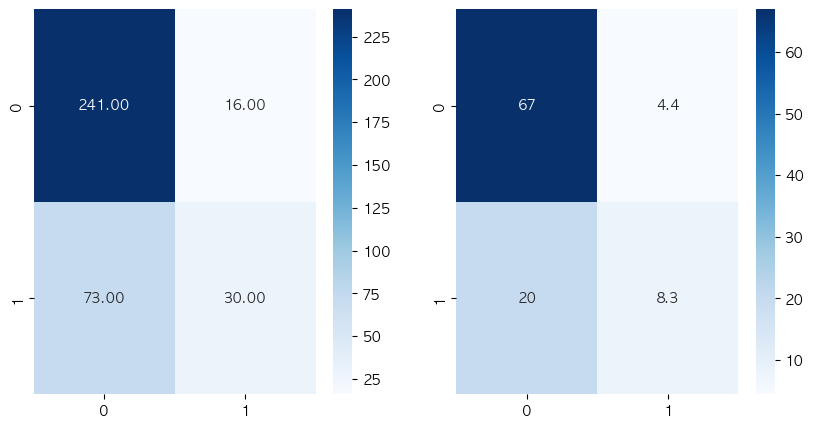

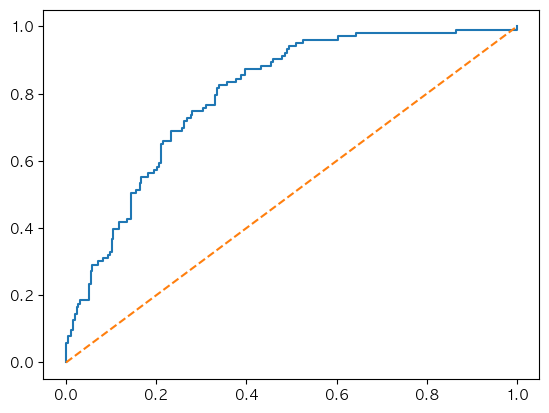

0.7985720222129878
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       257
           1       0.56      0.51      0.54       103

    accuracy                           0.75       360
   macro avg       0.69      0.68      0.68       360
weighted avg       0.74      0.75      0.74       360

0.7472222222222222


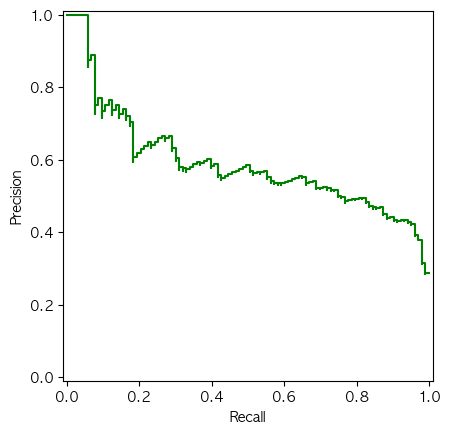

     precision    recall  thresholds
0     0.286111  1.000000    0.000039
1     0.284123  0.990291    0.000058
2     0.284916  0.990291    0.000067
3     0.285714  0.990291    0.000079
4     0.286517  0.990291    0.000081
..         ...       ...         ...
356   1.000000  0.038835    0.968841
357   1.000000  0.029126    0.975416
358   1.000000  0.019417    0.987163
359   1.000000  0.009709    0.993737
360   1.000000  0.000000         NaN

[361 rows x 3 columns]
     precision    recall  thresholds
0     0.286111  1.000000    0.000039
1     0.284123  0.990291    0.000058
2     0.284916  0.990291    0.000067
3     0.285714  0.990291    0.000079
4     0.286517  0.990291    0.000081
..         ...       ...         ...
187   0.491329  0.825243    0.044273
188   0.494186  0.825243    0.044357
189   0.491228  0.815534    0.046345
190   0.494118  0.815534    0.047879
191   0.491124  0.805825    0.047974

[192 rows x 3 columns]
incentive                0.225071
idle_time                0.200

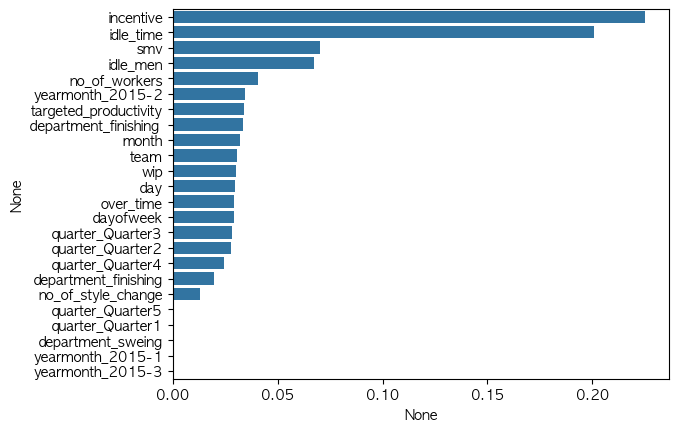

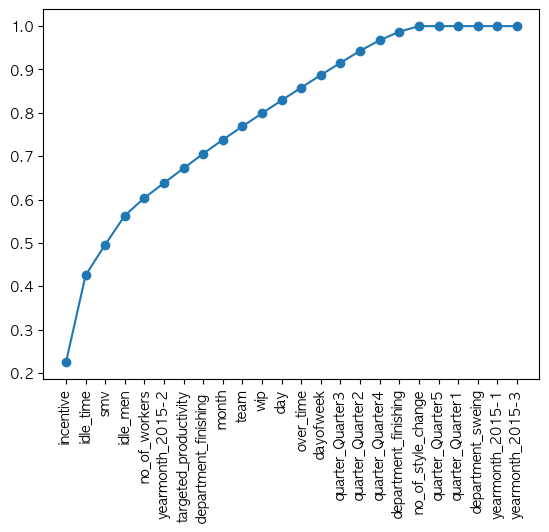

In [196]:
model_check(xgb_c)

In [197]:
import tensorflow as tf

In [198]:
tf_c = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=x_train_scaled.shape[1]),
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(1, activation='sigmoid')
])

tf_c.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

tf_c.fit(x_train_scaled, y_train, batch_size=32, epochs=500 , validation_data = [x_test_scaled, y_test], verbose=0)




In [199]:
y_pred_train_proba = tf_c.predict(x_train_scaled)
y_pred_test_proba = tf_c.predict(x_test_scaled)

a = 0.5
y_pred_train = np.where(y_pred_train_proba > a, 1, 0)
y_pred_test = np.where(y_pred_test_proba > a, 1, 0)


print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

 1/27 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       612
           1       0.88      0.96      0.92       225

    accuracy                           0.95       837
   macro avg       0.93      0.96      0.94       837
weighted avg       0.96      0.95      0.95       837

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       257
           1       0.59      0.63      0.61       103

    accuracy                           0.77       360
   macro avg       0.72      0.73      0.72       360
weighted avg       0.77      0.77      0.77       360



In [200]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# 모델 정의

# 모델 정의
tf_c = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=x_train_scaled.shape[1], kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 모델 컴파일
tf_c.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 조기 종료 콜백
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 훈련
tf_c.fit(x_train_scaled, y_train, batch_size=32, epochs=300, validation_data=(x_test_scaled, y_test), callbacks=[early_stopping], verbose=0)

# 모델 평가
loss, accuracy = tf_c.evaluate(x_test_scaled, y_test)
print(f"Test Accuracy: {accuracy}")



print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7571 - loss: 0.5268 
Test Accuracy: 0.730555534362793
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       612
           1       0.88      0.96      0.92       225

    accuracy                           0.95       837
   macro avg       0.93      0.96      0.94       837
weighted avg       0.96      0.95      0.95       837

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       257
           1       0.59      0.63      0.61       103

    accuracy                           0.77       360
   macro avg       0.72      0.73      0.72       360
weighted avg       0.77      0.77      0.77       360



In [246]:
y_pred_test = tf_c.predict(x_test_scaled)[:,0]

classification_report(y_test, np.where(y_pred_test>0.5,1,0))['precision']['1']['precision']

 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step


TypeError: string indices must be integers, not 'str'

In [231]:
models = [ knn, rfc, xgb_c, tf_c]


for model in models:
    try:
        if model == tf_c:
            model.fit(x_train_scaled, y_train)
            y_pred_proba = model.predict(x_test_scaled)[:,0]
            y_pred_test = np.where(y_pred_proba > 0.5, 1, 0)
        else:
            model.fit(x_train_scaled, y_train)
            y_pred_test = model.predict(x_test_scaled)
        print('=====================', model, '=====================')           
        print(classification_report(y_test, y_pred_test))
    except Exception as e:
        print('===================== error =====================')
        print('model names:', model)
        print(model, e)
        pass

===================== KNeighborsClassifier() =====================
              precision    recall  f1-score   support

           0       0.80      0.88      0.83       257
           1       0.58      0.44      0.50       103

    accuracy                           0.75       360
   macro avg       0.69      0.66      0.67       360
weighted avg       0.73      0.75      0.74       360

===================== RandomForestClassifier() =====================
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       257
           1       0.81      0.29      0.43       103

    accuracy                           0.78       360
   macro avg       0.79      0.63      0.65       360
weighted avg       0.78      0.78      0.74       360

===================== XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_r

In [252]:
y_train

947     0
427     0
86      0
1061    0
1174    0
       ..
1073    0
270     0
279     0
596     1
456     0
Name: success, Length: 837, dtype: int64

In [257]:
y_train

947     0
427     0
86      0
1061    0
1174    0
       ..
1073    0
270     0
279     0
596     1
456     0
Name: success, Length: 837, dtype: int64

In [262]:
y_pred_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [264]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [266]:

# 모델 정의 및 학습
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

# 예측
y_pred_train = knn.predict(x_train_scaled)

# 정확도 계산
print(recall_score(y_train, y_pred_train))


0.5822222222222222


In [275]:
from sklearn.ensemble import GradientBoostingClassifier
gb_c = GradientBoostingClassifier()

In [276]:
models = [ knn, rfc, xgb_c, tf_c, gb_c]
results = []


for model in models:
    result = []
    try:
        if model == tf_c:
            model.fit(x_train_scaled, y_train)
            y_pred_proba = model.predict(x_test_scaled)[:,0]
            y_pred_test = np.where(y_pred_proba > 0.5, 1, 0)
        else:
            model.fit(x_train_scaled, y_train)
            y_pred_test = model.predict(x_test_scaled)
        
        acc_score = accuracy_score(y_test, y_pred_test)
        prec_score = precision_score(y_test, y_pred_test)
        rec_score = recall_score(y_test, y_pred_test)


        results.append({'model_name': model.__class__.__name__,
                'accuracy' : acc_score,
                  'precision_score' : prec_score,
                  'recall_score' : rec_score })

    except Exception as e:
        print('===================== error =====================')
        print('model names:', model)
        print(model, e)
        pass

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7707 - loss: 0.5315 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step


In [278]:
pd.DataFrame(results).sort_values(by='accuracy', ascending=False)

model_name  accuracy  precision_score  recall_score
1      RandomForestClassifier  0.761111         0.729730      0.262136
2               XGBClassifier  0.752778         0.652174      0.291262
4  GradientBoostingClassifier  0.752778         0.659091      0.281553
0        KNeighborsClassifier  0.750000         0.584416      0.436893
3                  Sequential  0.719444         0.526316      0.194175

# Shap Vlaues

In [279]:
import shap

In [380]:
explainer = shap.Explainer(rfc)
shap_values = explainer.shap_values(x_train)


In [287]:
# shap_values = shap_values[1]

In [382]:
shap_values

[array([[-0.01018736,  0.00219176,  0.00736636, ..., -0.00517046,
         -0.00261956, -0.00438635],
        [-0.01020328,  0.00116812,  0.01092914, ...,  0.00233632,
          0.00173841, -0.00430506],
        [-0.00559208, -0.00630551,  0.00320444, ...,  0.00445947,
          0.00093652, -0.00547809],
        ...,
        [-0.01123031,  0.0009893 , -0.00556447, ..., -0.00091899,
          0.00131985, -0.00525693],
        [-0.00673282, -0.00504368, -0.00010939, ..., -0.00672035,
         -0.00165869, -0.00597584],
        [-0.00777818,  0.00350044,  0.01084232, ...,  0.00413837,
          0.00218076, -0.00413319]]),
 array([[ 0.01018736, -0.00219176, -0.00736636, ...,  0.00517046,
          0.00261956,  0.00438635],
        [ 0.01020328, -0.00116812, -0.01092914, ..., -0.00233632,
         -0.00173841,  0.00430506],
        [ 0.00559208,  0.00630551, -0.00320444, ..., -0.00445947,
         -0.00093652,  0.00547809],
        ...,
        [ 0.01123031, -0.0009893 ,  0.00556447, ...,  

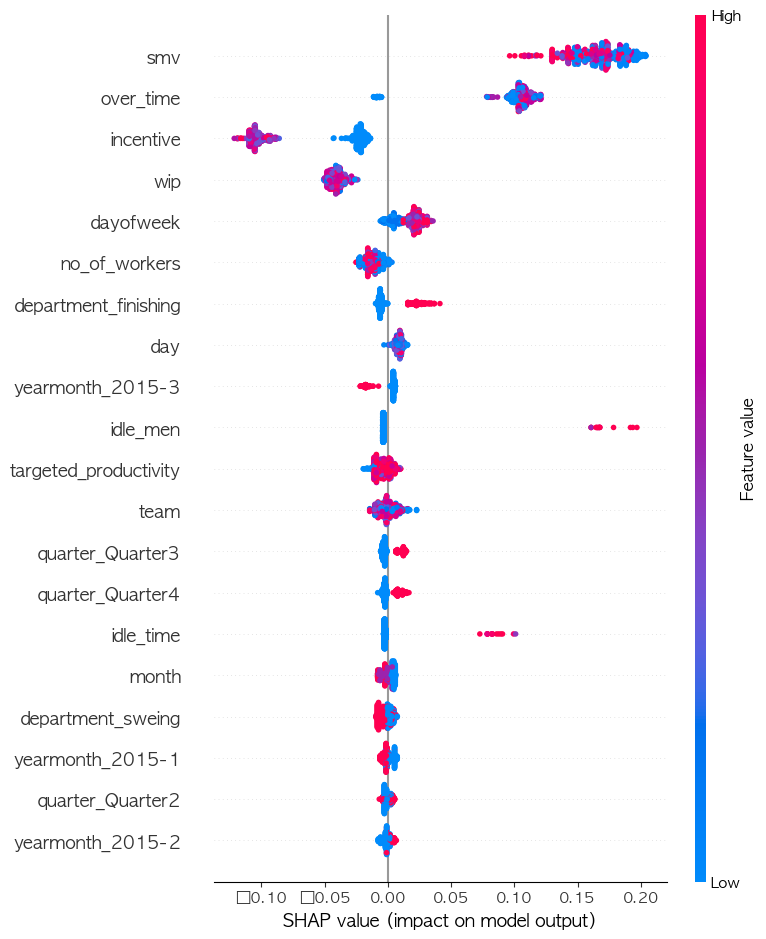

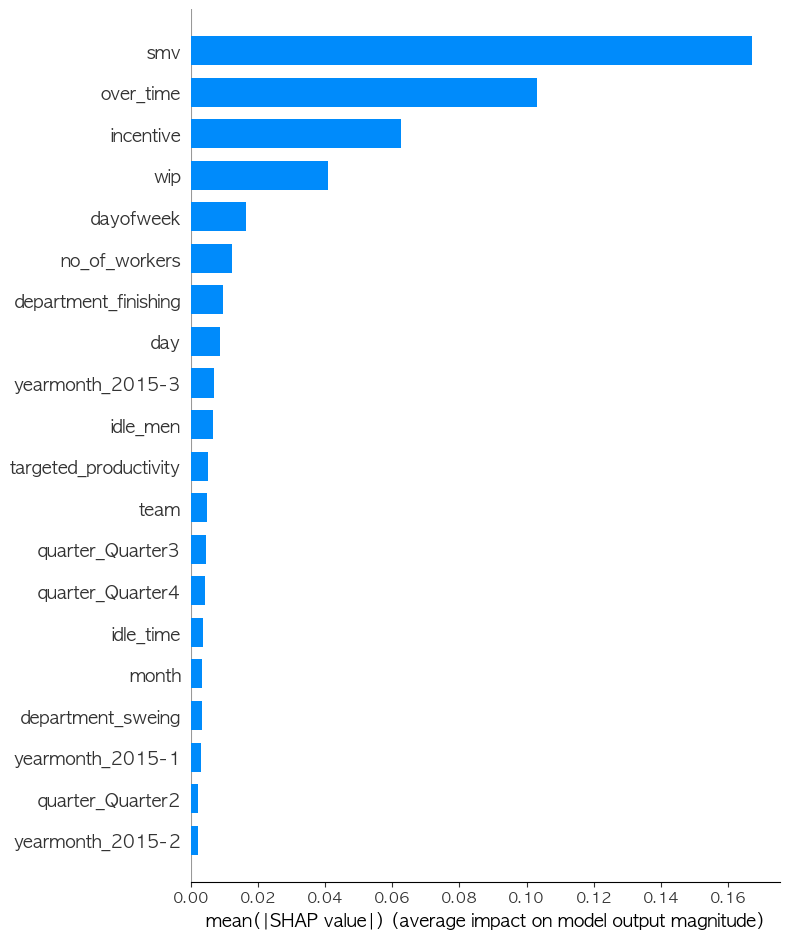

In [381]:
shap.summary_plot(shap_values[1], x_train, plot_type='dot')
plt.show()


shap.summary_plot(shap_values[1], x_train, plot_type='bar')
plt.show()

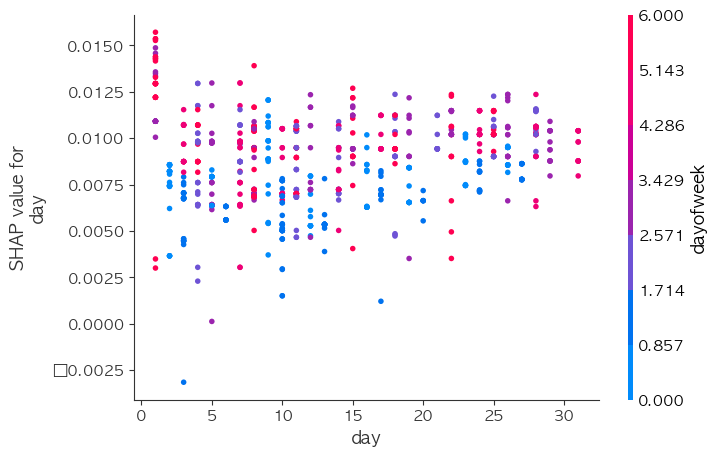

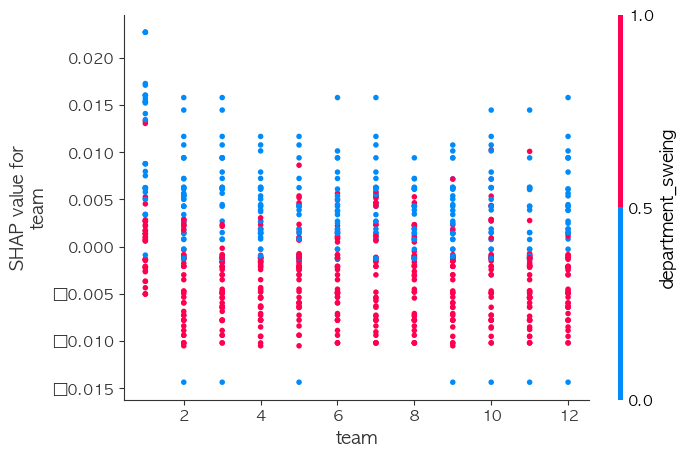

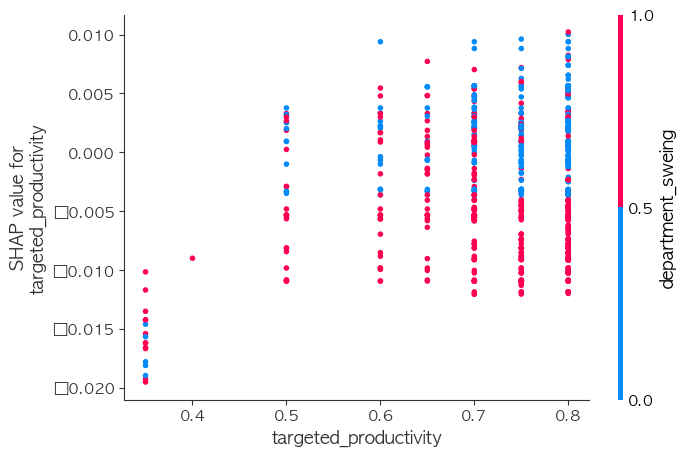

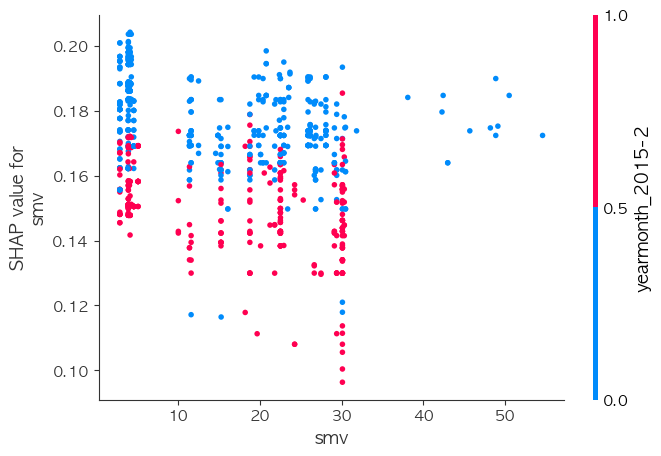

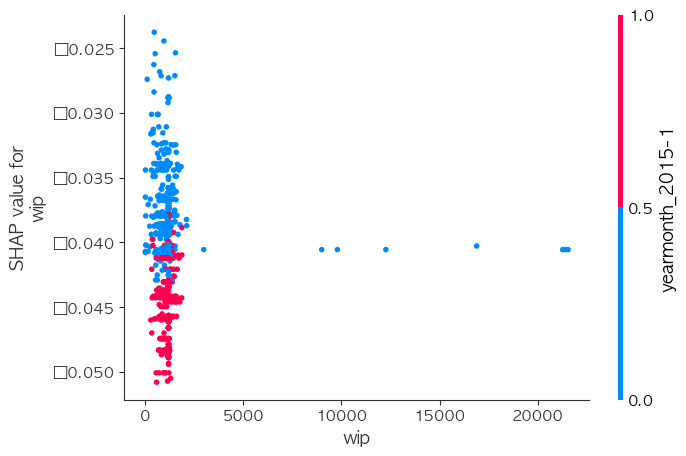

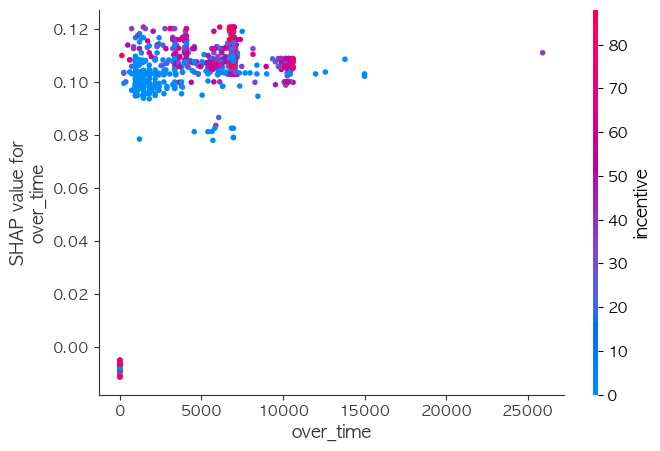

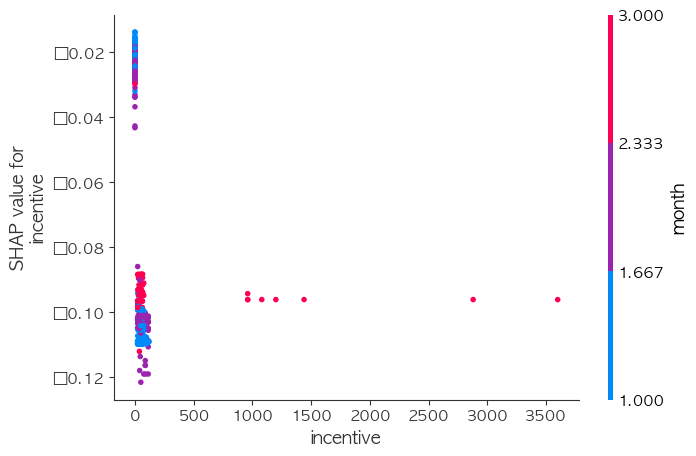

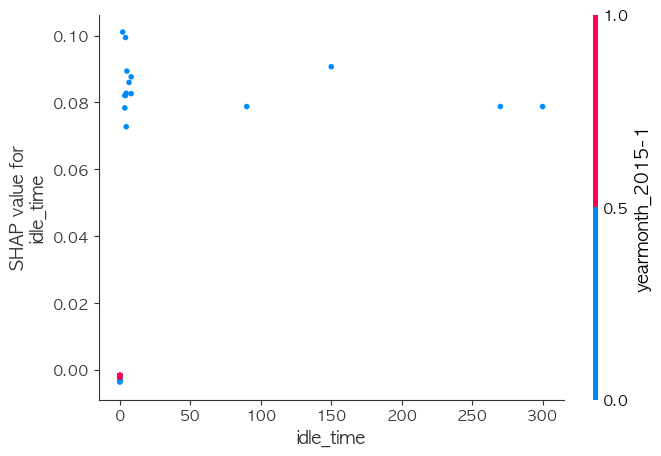

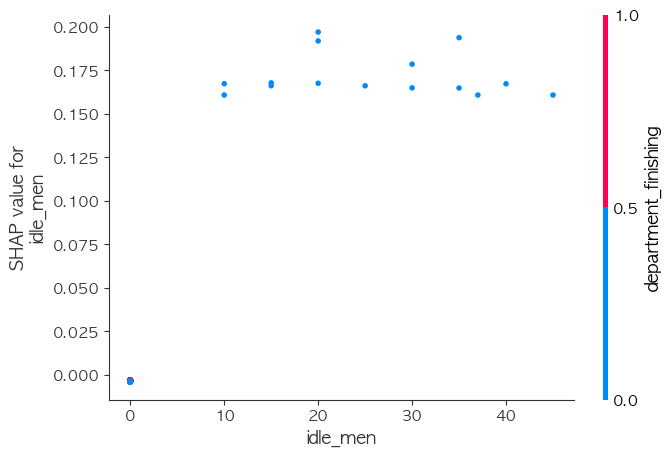

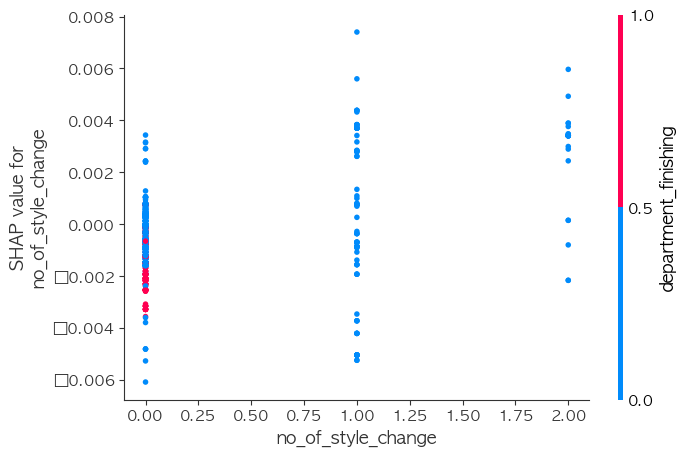

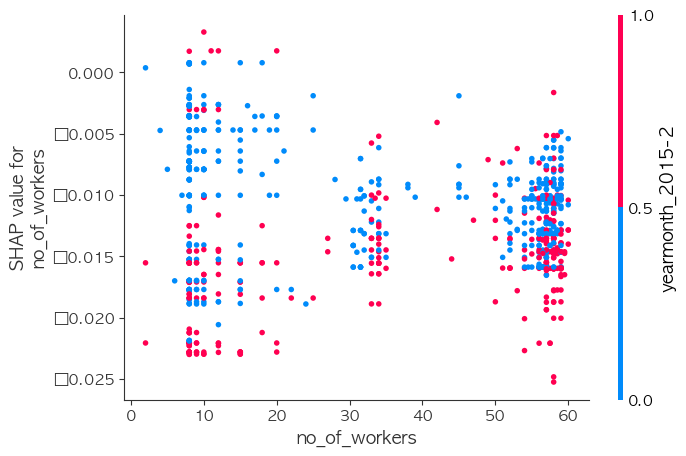

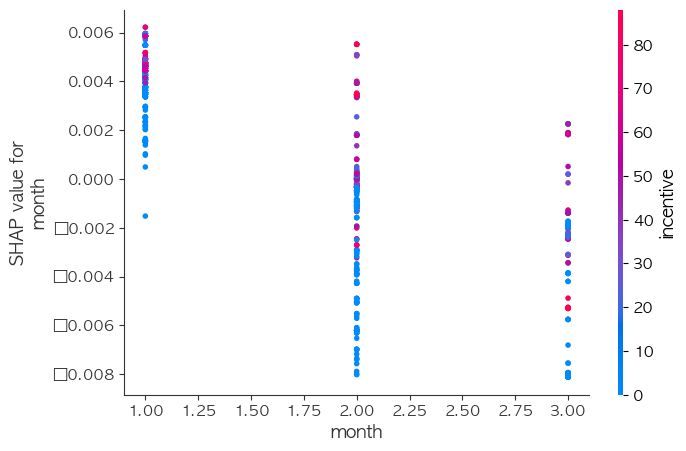

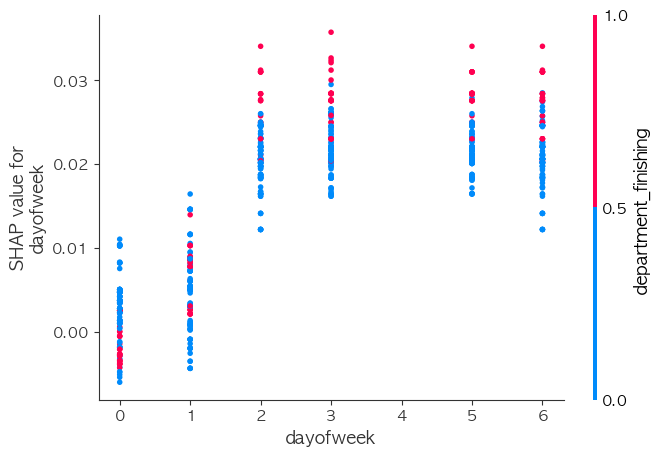

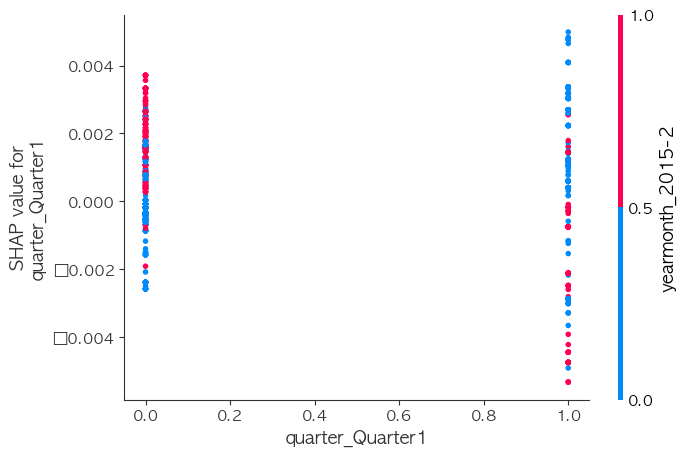

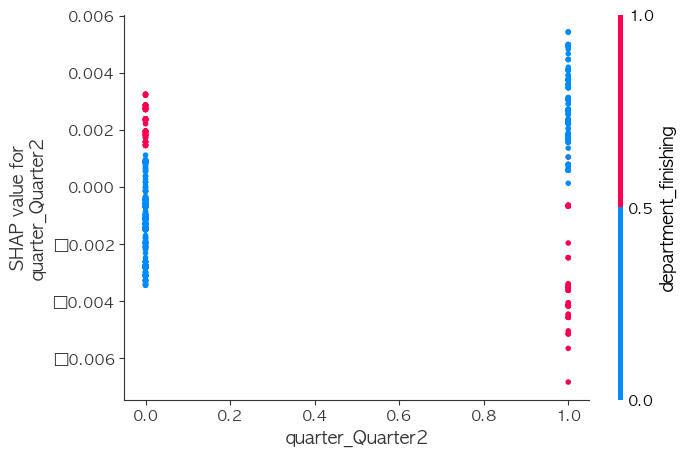

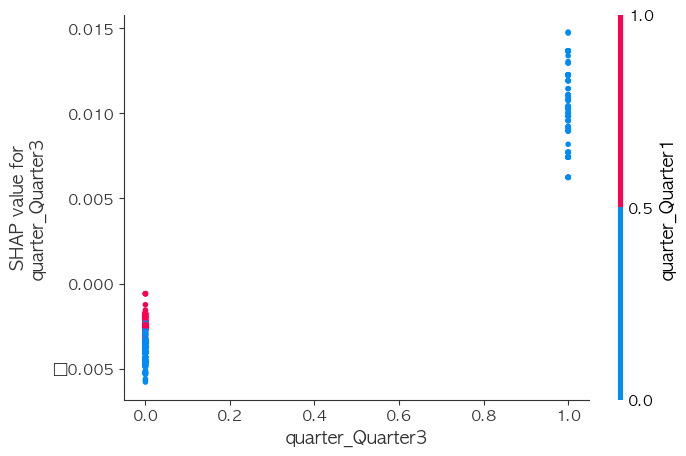

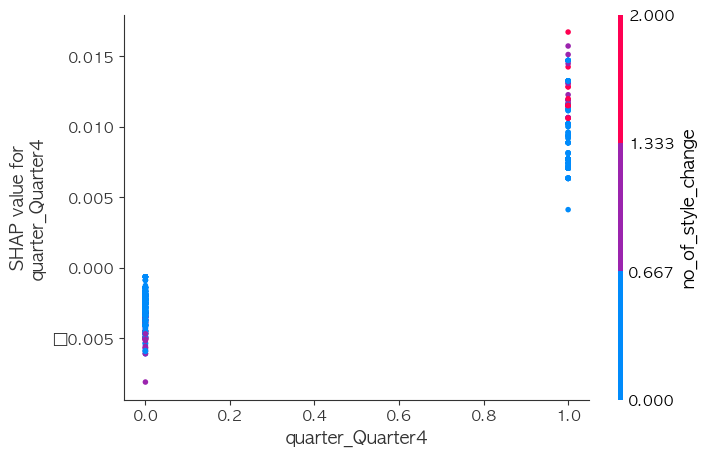

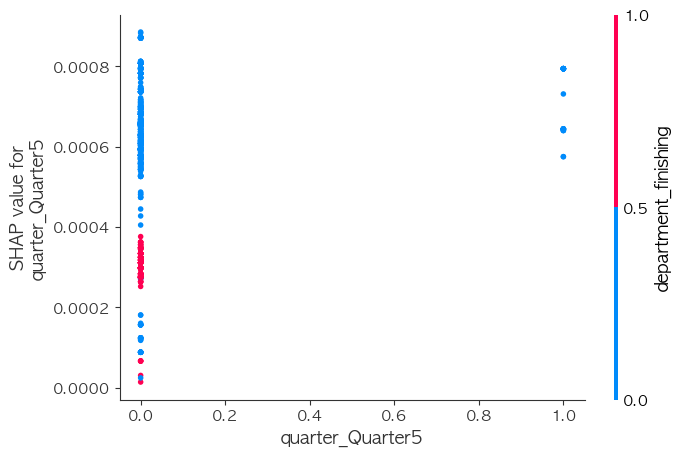

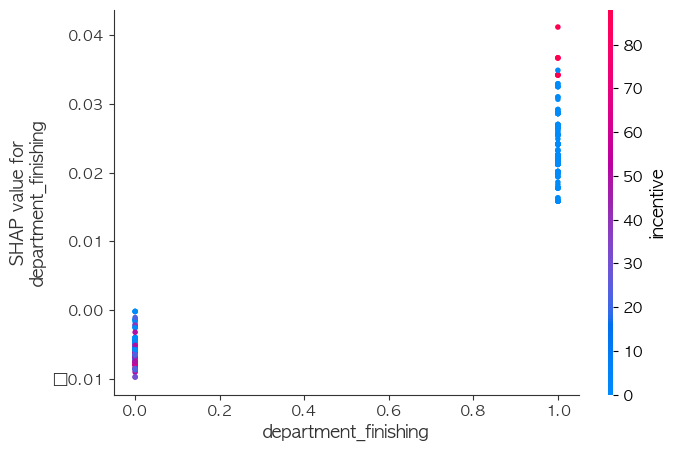

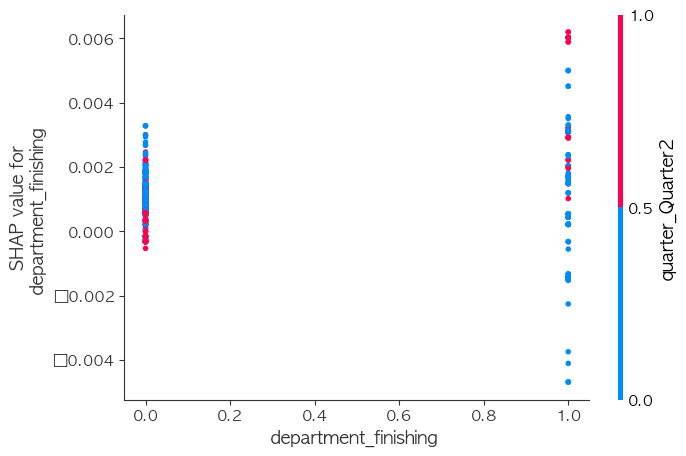

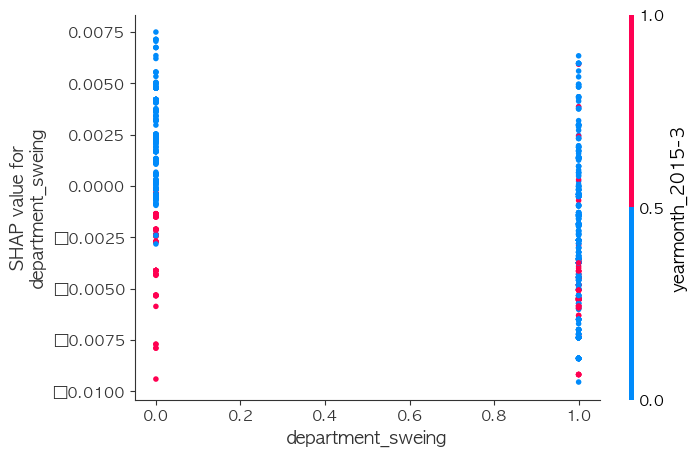

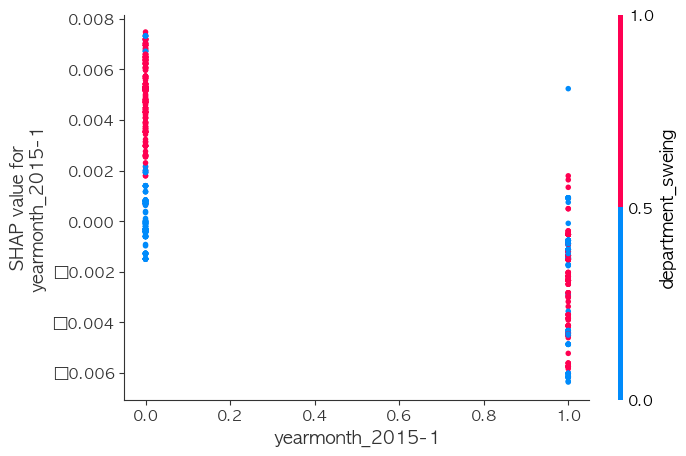

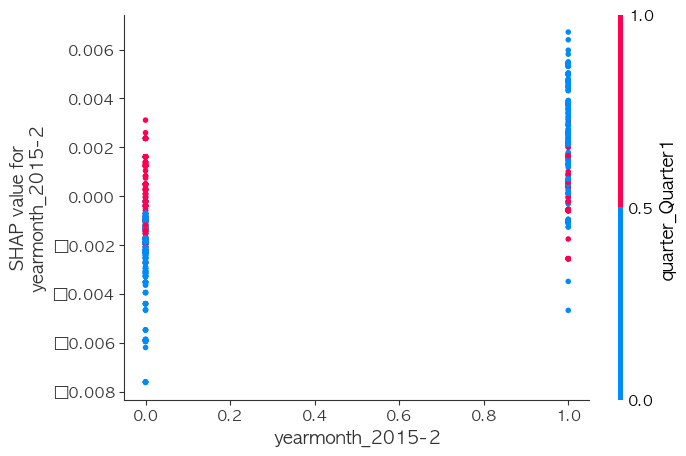

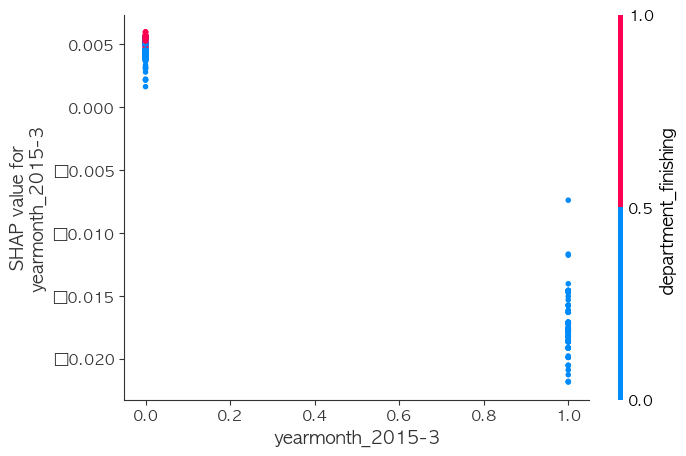

In [321]:
for i in x_train_scaled.columns:
    shap.dependence_plot(i, shap_values, x_train)
    plt.show()

In [384]:
explainer.expected_value

array([0.72892473, 0.27107527])

In [390]:
shap_values[1].values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [404]:
shap_values[1][0]

array([ 0.01018736, -0.00219176, -0.00736636,  0.13942985, -0.03642662,
        0.11566595, -0.10460161, -0.00257774, -0.00357249, -0.00118923,
       -0.01557252,  0.00179098,  0.01868881,  0.00130609, -0.0020829 ,
       -0.00320951,  0.00742941,  0.00061169, -0.00592842,  0.00094879,
       -0.00459144,  0.00517046,  0.00261956,  0.00438635])

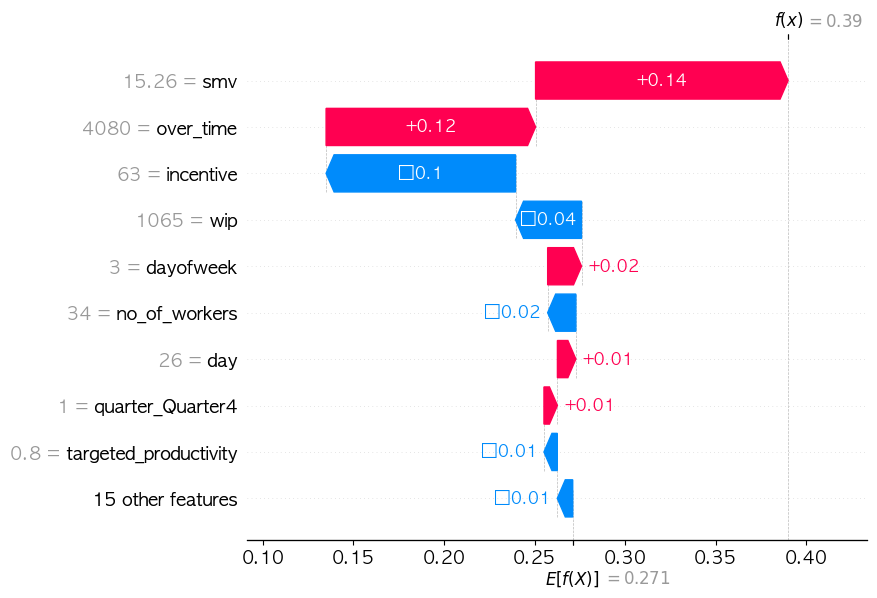

In [401]:

# Generate the SHAP waterfall plot for the first instance
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values[1][0],
        base_values=explainer.expected_value[1],
        data=x_train.iloc[0],
        feature_names=x_train.columns
    )
)

# Display the plot
plt.show()

In [405]:
x_train.iloc[0]

day                        26.00
team                       12.00
targeted_productivity       0.80
smv                        15.26
wip                      1065.00
over_time                4080.00
incentive                  63.00
idle_time                   0.00
idle_men                    0.00
no_of_style_change          0.00
no_of_workers              34.00
month                       2.00
dayofweek                   3.00
quarter_Quarter1            0.00
quarter_Quarter2            0.00
quarter_Quarter3            0.00
quarter_Quarter4            1.00
quarter_Quarter5            0.00
department_finishing        0.00
department_finishing        0.00
department_sweing           1.00
yearmonth_2015-1            0.00
yearmonth_2015-2            1.00
yearmonth_2015-3            0.00
Name: 947, dtype: float64